# Import Cells

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Representative scraped data only

Since the search site itself has JavaScript elements, it's harder to scrape, so Ill create a database of representatives by querrying for all of them and acessing it page by page (100 per page 10000 in total) with the use of Selenium and a Browser. The script for scraping will be available in the github for this project. The data is imported bellow.

In [3]:
df_representatives_scraped = pd.read_csv('./Data/representatives_scraped_and_cleaned',sep='\t')
df_representatives_scraped = df_representatives_scraped.drop(columns = ['Unnamed: 0'])

In [4]:
df_representatives_scraped

attorney_name             company_identifier  \
0         't Jong, Bastiaan Jacob                         Inaday   
1            Aagaard, Louise Yung           -9125280588505388359   
2           Aalbers, Arnt Reinier              De Vries & Metman   
3               Aalto, Juha-Matti                    Laine IP Oy   
4     Aaltonen, Janne Lari Antero                    Moosedog Oy   
...                           ...                            ...   
5422               Putzke, Sascha       Wolfenbütteler Straße 45   
5423               Puujalka, Emmi                    Espatent Oy   
5424            Pálsson, Ingólfur          Dragsted Partners A/S   
5425               Pätzelt, Peter   Pätzelt - Seltmann - Hofmann   
5426          Pérez Pascual, Axel  Isern Patentes y Marcas, S.L.   

                       company_url region  
0                https://inaday.eu     NL  
1              https://hoiberg.com     DK  
2                  https://dvme.nl     NL  
3           https://www.laineip.fi     FI  
4              https://moosedog.fi     FI  
...                            ...    ...  
5422        https://www.sqr-law.de     DE  
5423       https://www.espatent.fi     FI  
5424  https://dragstedpartners.com     IS  
5425  http://www.dresden-patent.de     DE  
5426             https://isern.com     ES  

[5427 rows x 4 columns]

In [15]:
df_representatives_scraped.columns

Index(['attorney_name', 'company_identifier', 'company_url', 'region'], dtype='object')

The data consists of patent attorneys working in IP companies only. All patent attorneys regestered for work by bigger companies that own alot of patents are not included. 

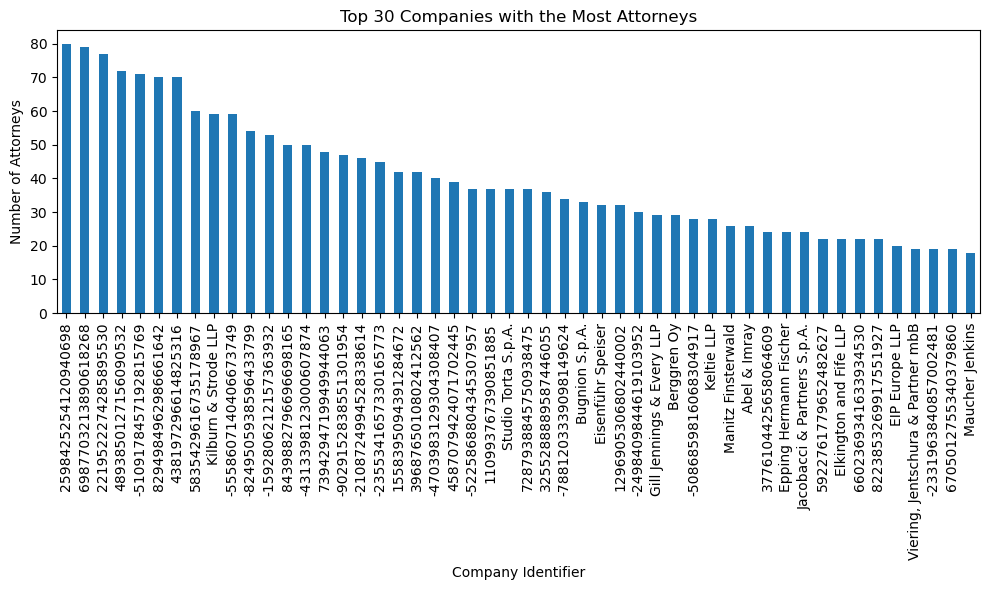

In [38]:
top_50_companies = (
    df_representatives_scraped.groupby('company_identifier')['attorney_name']
    .nunique()
    .sort_values(ascending=False)
    .head(50)
)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_50_companies.plot(kind='bar')
plt.title('Top 30 Companies with the Most Attorneys')
plt.xlabel('Company Identifier')
plt.ylabel('Number of Attorneys')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

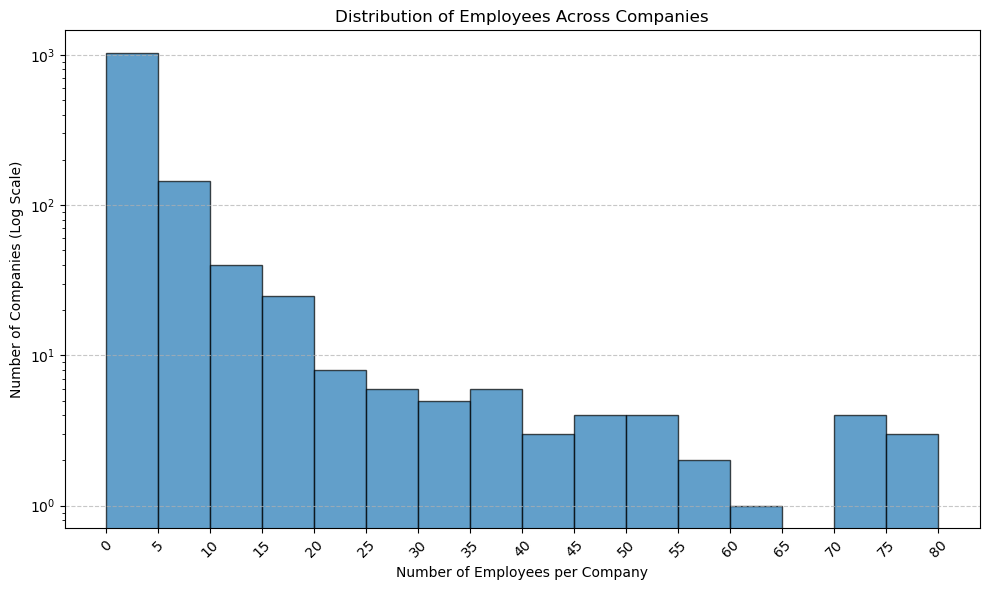

In [35]:
employees_per_company = df_representatives_scraped.groupby('company_identifier')['attorney_name'].nunique()
# Define bin edges to match the step size of 5
bin_edges = np.arange(0, employees_per_company.max() + 5, step=5)

# Create a histogram with defined bins
plt.figure(figsize=(10, 6))
plt.hist(employees_per_company, bins=bin_edges, edgecolor='black', alpha=0.7)

# Set the y-axis to logarithmic scale
plt.yscale('log')

# Set x-axis ticks to match the bin edges
plt.xticks(bin_edges, rotation=45)

# Add labels and title
plt.title('Distribution of Employees Across Companies')
plt.xlabel('Number of Employees per Company')
plt.ylabel('Number of Companies (Log Scale)')

# Add a grid and show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

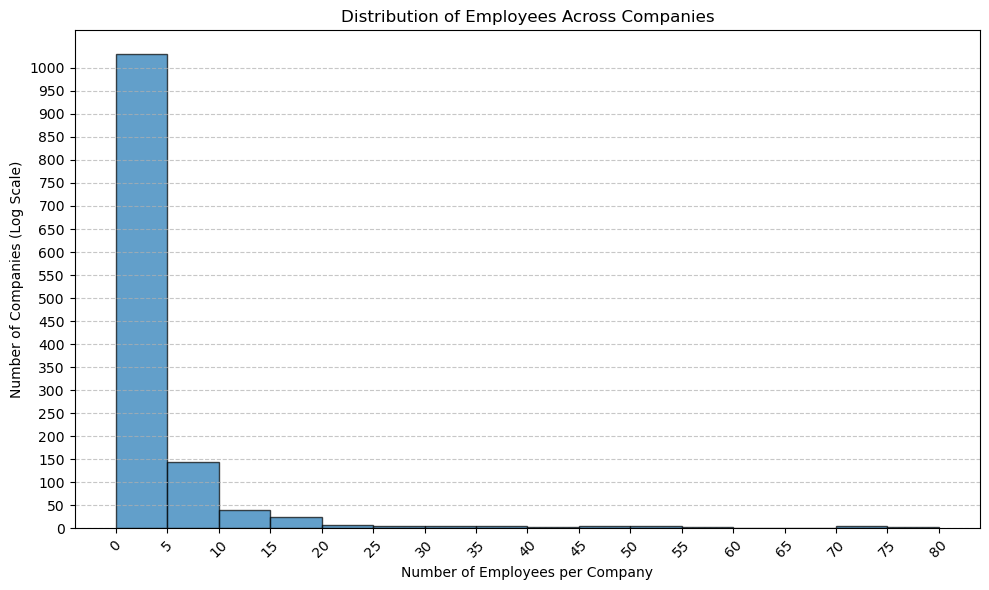

In [44]:
employees_per_company = df_representatives_scraped.groupby('company_identifier')['attorney_name'].nunique()
# Define bin edges to match the step size of 5
bin_edges = np.arange(0, employees_per_company.max() + 5, step=5)

# Create a histogram with defined bins
plt.figure(figsize=(10, 6))
plt.hist(employees_per_company, bins=bin_edges, edgecolor='black', alpha=0.7)

# Set x-axis ticks to match the bin edges
plt.xticks(bin_edges, rotation=45)
plt.yticks( np.arange(0,1050, step=50))

# Add labels and title
plt.title('Distribution of Employees Across Companies')
plt.xlabel('Number of Employees per Company')
plt.ylabel('Number of Companies (Log Scale)')

# Add a grid and show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

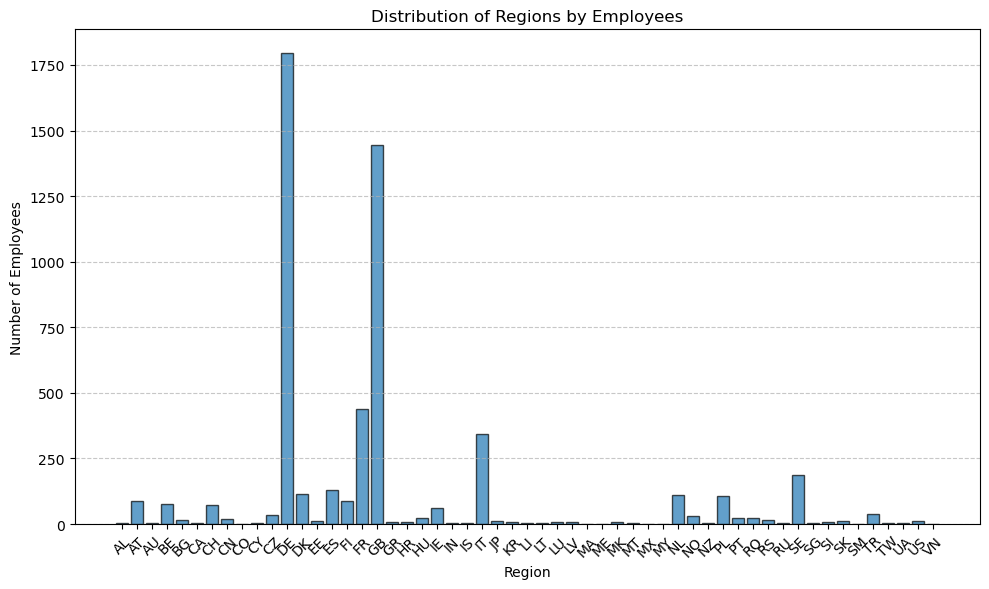

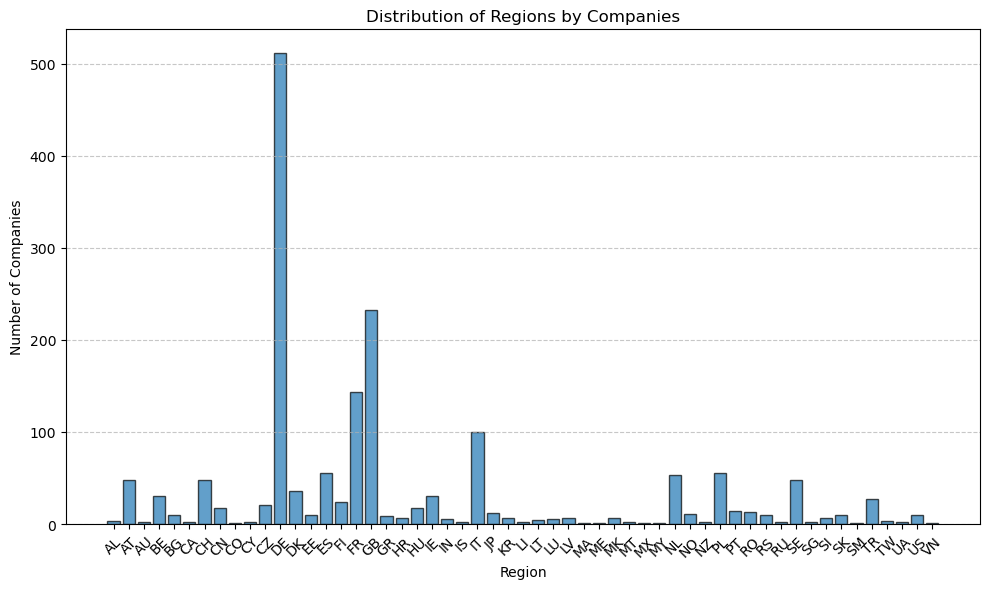

In [45]:
employees_per_region = df_representatives_scraped.groupby('region')['attorney_name'].nunique()

plt.figure(figsize=(10, 6))
plt.bar(employees_per_region.index, employees_per_region.values, alpha=0.7, edgecolor='black')
plt.title('Distribution of Regions by Employees')
plt.xlabel('Region')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



companies_per_region = df_representatives_scraped.groupby('region')['company_identifier'].nunique()

plt.figure(figsize=(10, 6))
plt.bar(companies_per_region.index, companies_per_region.values, alpha=0.7, edgecolor='black')
plt.title('Distribution of Regions by Companies')
plt.xlabel('Region')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

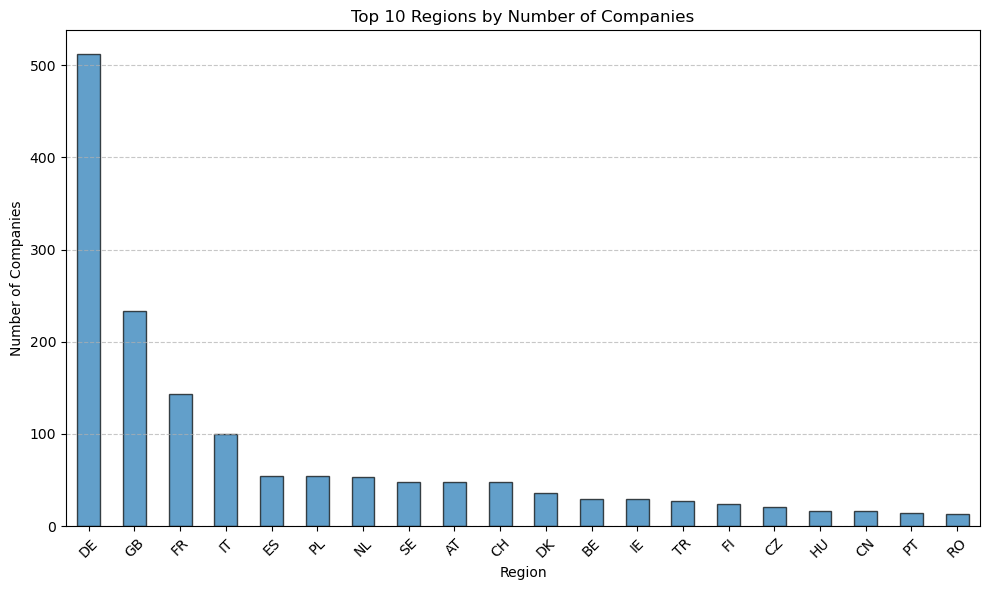

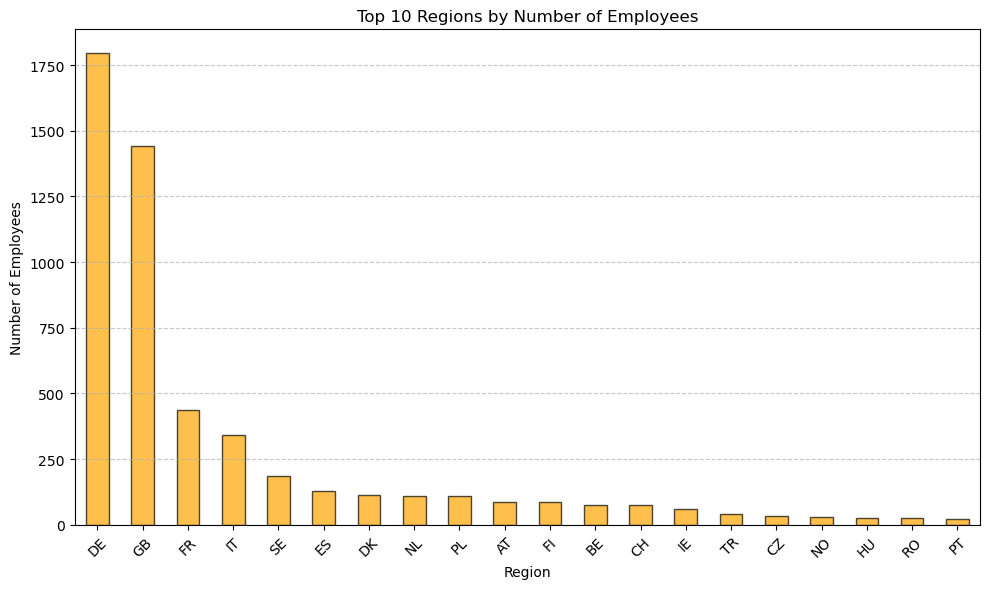

In [47]:
top_regions_by_companies = (
    df_representatives_scraped.groupby('region')['company_identifier']
    .nunique()
    .sort_values(ascending=False)
    .head(20)
)

# 2. Top 10 regions by number of employees
top_regions_by_employees = (
    df_representatives_scraped.groupby('region')['attorney_name']
    .nunique()
    .sort_values(ascending=False)
    .head(20)
)

# Plot: Top 10 regions by companies
plt.figure(figsize=(10, 6))
top_regions_by_companies.plot(kind='bar', alpha=0.7, edgecolor='black')
plt.title('Top 10 Regions by Number of Companies')
plt.xlabel('Region')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot: Top 10 regions by employees
plt.figure(figsize=(10, 6))
top_regions_by_employees.plot(kind='bar', alpha=0.7, edgecolor='black', color='orange')
plt.title('Top 10 Regions by Number of Employees')
plt.xlabel('Region')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [82]:
publications_for_each_representative_df.columns

Index(['publication.number', 'representative.name', 'representative.address',
       'representative.city', 'representative.country'],
      dtype='object')

# Patent data visuelisations

In [2]:
full_data = pd.read_csv('./Data/up_to_2024_full_patent_data_derived.csv',sep='\t')

<Axes: >

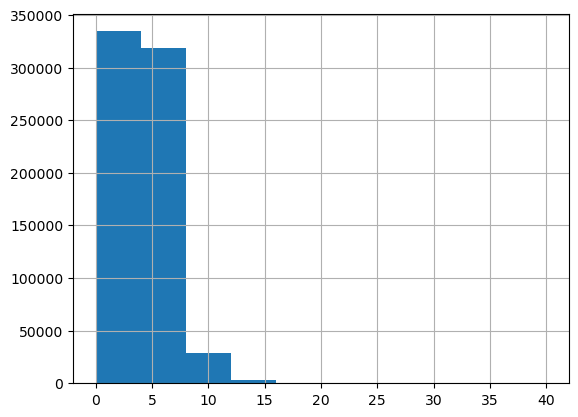

In [30]:
full_data['patent_citations'].hist()

<Axes: >

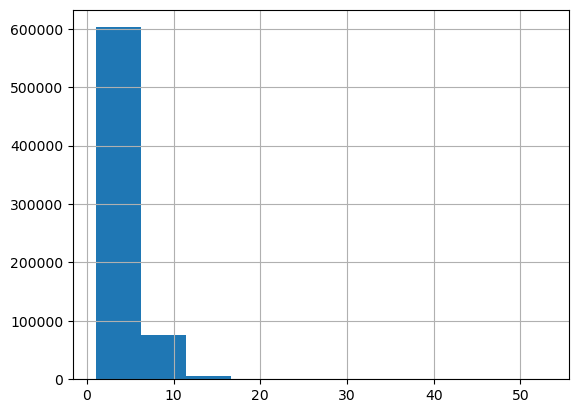

In [27]:
full_data['total_citations'].hist()

<Axes: >

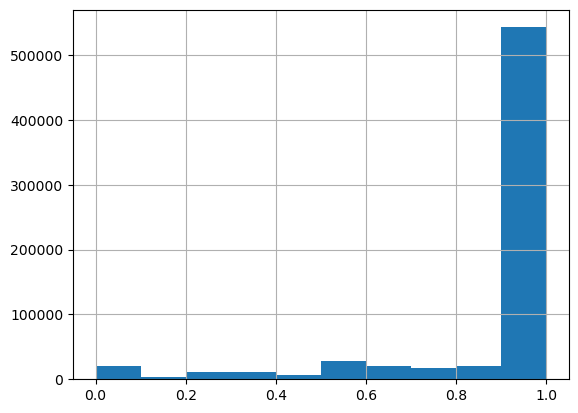

In [29]:
(full_data['patent_citations']/full_data['total_citations']).hist()

In [32]:
import pandas as pd
from scipy.stats import shapiro

# Example DataFrame
df = full_data['patent_citations']

# Perform Shapiro-Wilk test
stat, p_value = shapiro(df)

# Output results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The distribution is normal (fail to reject H0)")
else:
    print("The distribution is not normal (reject H0)")

Shapiro-Wilk Test Statistic: 0.9225033980748165
P-value: 6.793215577492359e-141
The distribution is not normal (reject H0)


/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 685176.
  res = hypotest_fun_out(*samples, **kwds)


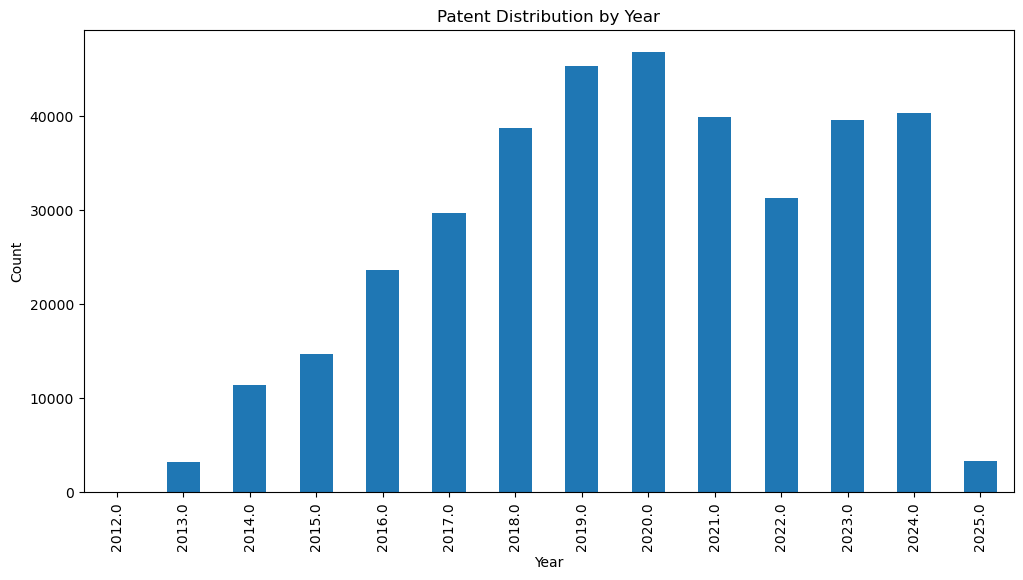

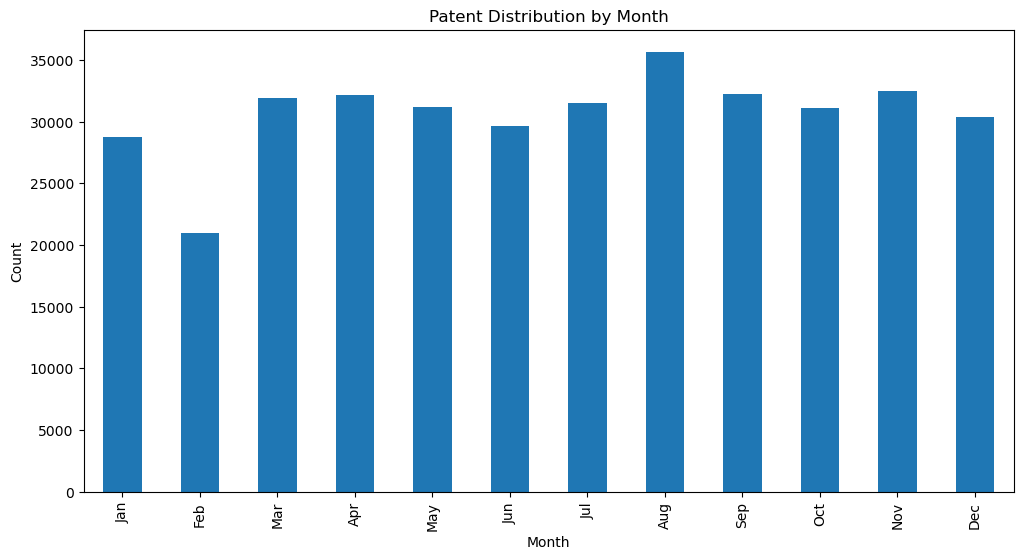

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date columns to datetime
full_data['patent_granted_date'] = pd.to_datetime(full_data['patent_granted_date'], format='%Y%m%d', errors='coerce')

# Year distribution
plt.figure(figsize=(12,6))
full_data['patent_granted_date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Patent Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Month distribution
plt.figure(figsize=(12,6))
full_data['patent_granted_date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Patent Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

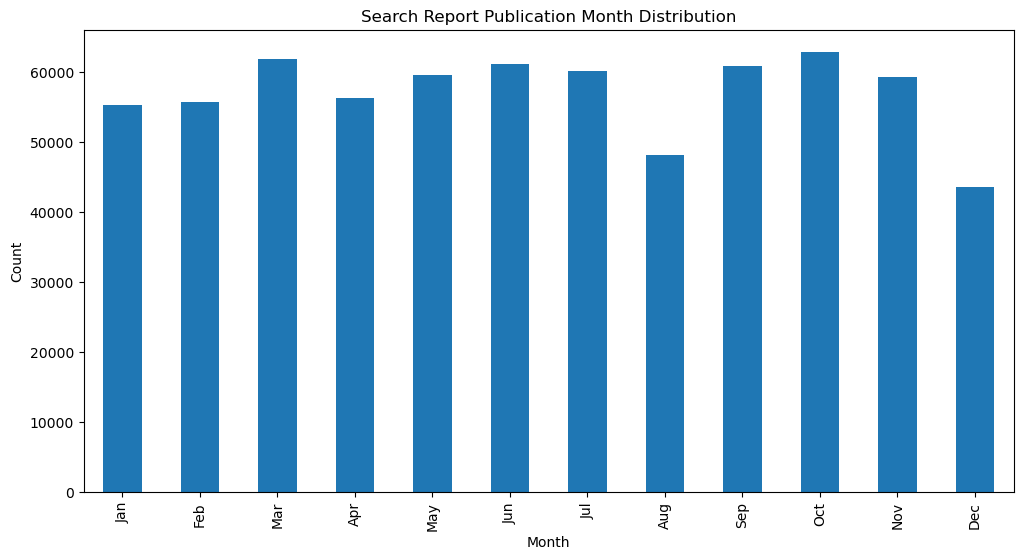

In [16]:
# Convert search report date
full_data['search_report_date'] = pd.to_datetime(full_data['search_report_date'], format='%Y%m%d', errors='coerce')

plt.figure(figsize=(12,6))
full_data['search_report_date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Search Report Publication Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

- A Human Necessities.
- B Performing Operations; Transporting.
- C Chemistry; Metallurgy.
- D Textiles; Paper.
- E Fixed Constructions.
- F Mechanical Engineering; Lighting; Heating; Weapons; Blasting Engines or Pumps.
- G Physics.
- H Electricity.

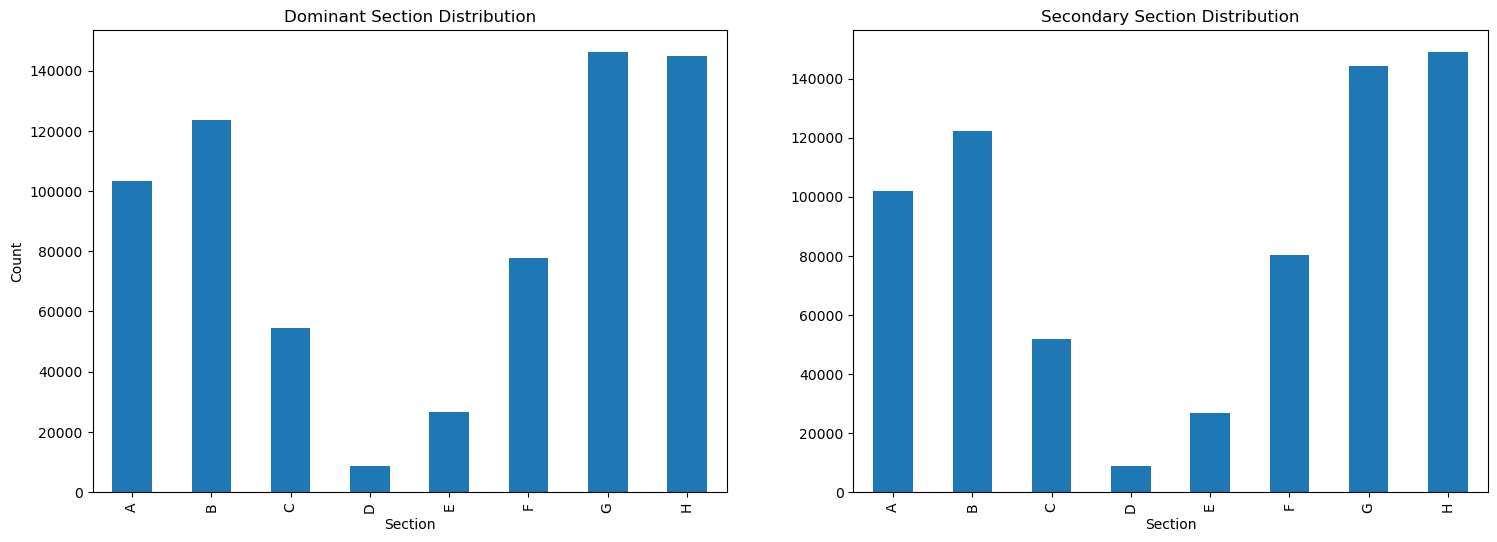

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

full_data['dominant_section'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
ax[0].set_title('Dominant Section Distribution')
ax[0].set_xlabel('Section')
ax[0].set_ylabel('Count')

full_data['secondary_section'].value_counts().sort_index().plot(kind='bar', ax=ax[1])
ax[1].set_title('Secondary Section Distribution')
ax[1].set_xlabel('Section')
plt.show()

<Axes: >

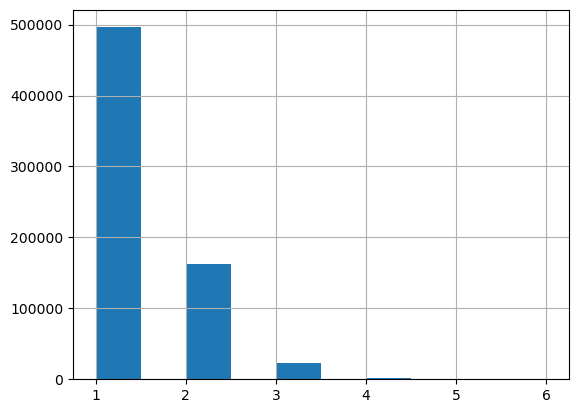

In [22]:
full_data['num_sections'].hist()

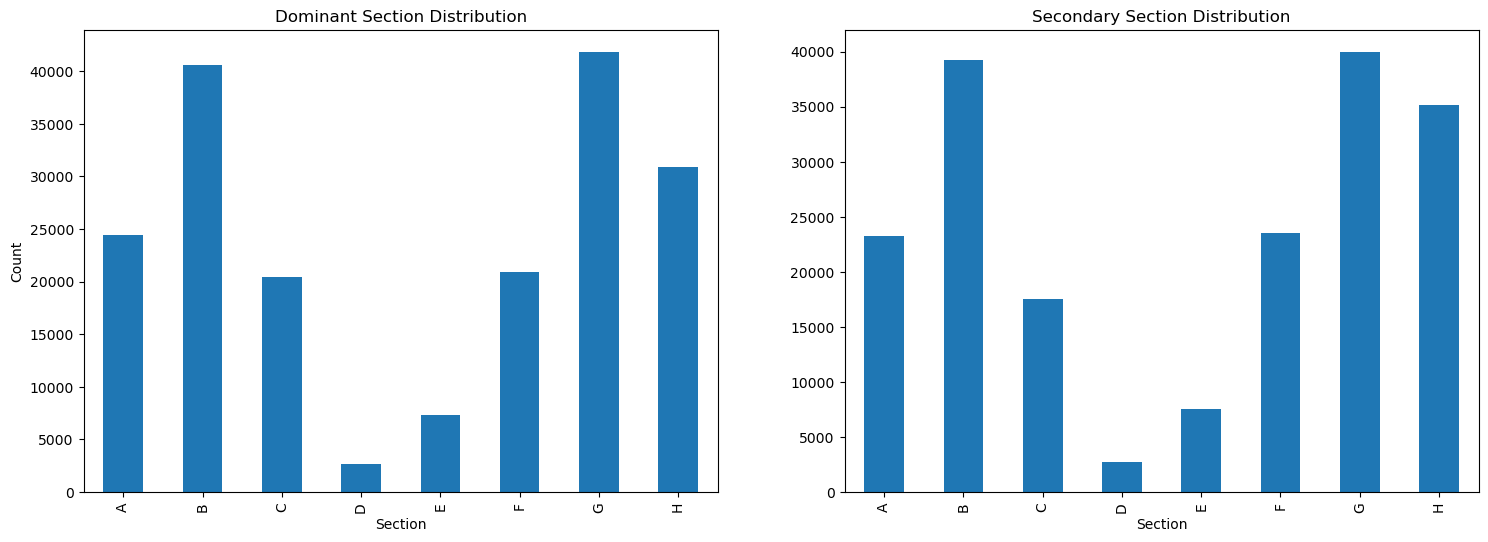

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

diff_data = full_data[full_data['dominant_section']!=full_data['secondary_section']]

diff_data['dominant_section'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
ax[0].set_title('Dominant Section Distribution')
ax[0].set_xlabel('Section')
ax[0].set_ylabel('Count')

diff_data['secondary_section'].value_counts().sort_index().plot(kind='bar', ax=ax[1])
ax[1].set_title('Secondary Section Distribution')
ax[1].set_xlabel('Section')
plt.show()

Since the average number of sections mostly one, our primary and secondary section are better examined when there is a secondary section to be looked at. The following visuelisations examine those patents in particular. 


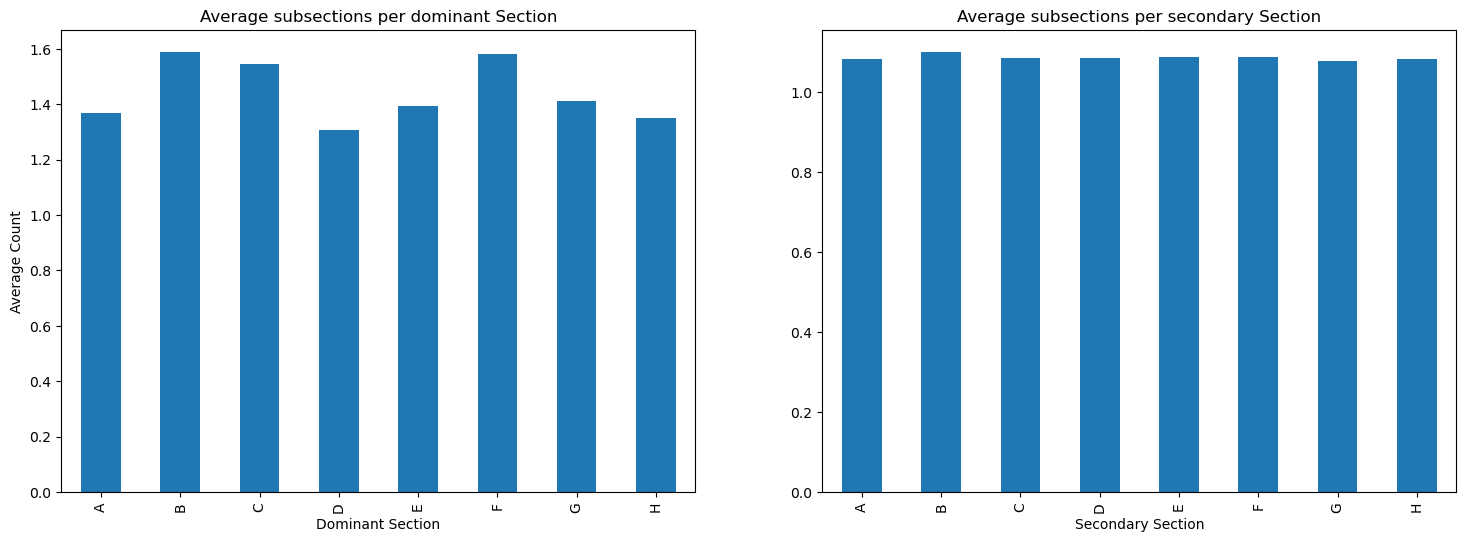

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

# Dominant section
full_data.groupby('dominant_section')['num_in_dominant'].mean().sort_index().plot(kind='bar', ax=ax[0])
ax[0].set_title('Average subsections per dominant Section')
ax[0].set_xlabel('Dominant Section')
ax[0].set_ylabel('Average Count')

# Secondary section
diff_data.groupby('secondary_section')['num_in_secondary'].mean().sort_index().plot(kind='bar', ax=ax[1])
ax[1].set_title('Average subsections per secondary Section')
ax[1].set_xlabel('Secondary Section')
plt.show()

In the previous visuelisation we can see that intersectionality generally affects only one subclass of the secondary. This however is not a good measure of the Inventiveness of the patent, and generally applications that have more fields/sections affected have a harder time getting patented. that will be demonstrated with the following series of the visuelisations.

<Figure size 1000x600 with 0 Axes>

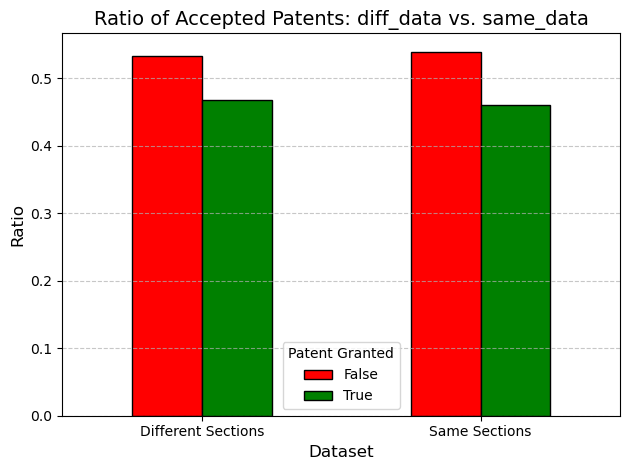

In [38]:
# Create same_data where dominant_section == secondary_section
same_data = full_data[full_data['dominant_section'] == full_data['secondary_section']]

# Calculate ratio of accepted patents in diff_data
diff_ratio = diff_data['patent_granted'].value_counts(normalize=True).rename('diff_data')

# Calculate ratio of accepted patents in same_data
same_ratio = same_data['patent_granted'].value_counts(normalize=True).rename('same_data')

# Combine the ratios into a single DataFrame
ratio_df = pd.concat([diff_ratio, same_ratio], axis=1).T

# Plot
plt.figure(figsize=(10, 6))
ratio_df.plot(kind='bar', stacked=False, color=['red', 'green'], edgecolor='black')
plt.title('Ratio of Accepted Patents: diff_data vs. same_data', fontsize=14)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.xticks([0, 1], ['Different Sections', 'Same Sections'], rotation=0)
plt.legend(title='Patent Granted', labels=['False', 'True'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

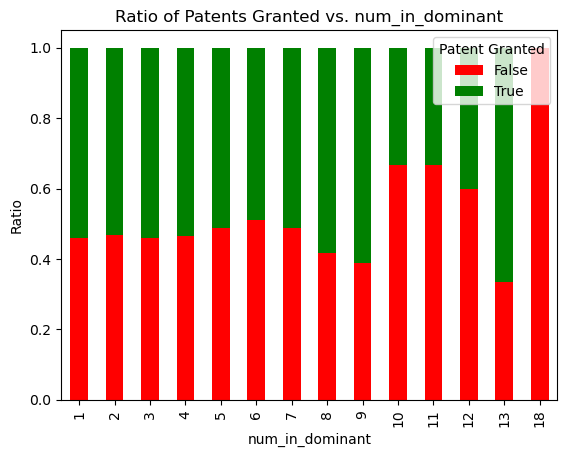

In [29]:
# Group by num_in_dominant and calculate the ratio of patents granted
granted_ratio_num_dominant = full_data.groupby('num_in_dominant')['patent_granted'].value_counts(normalize=True).unstack()

# Plot
plt.figure(figsize=(12, 6))
granted_ratio_num_dominant.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Ratio of Patents Granted vs. num_in_dominant')
plt.xlabel('num_in_dominant')
plt.ylabel('Ratio')
plt.legend(title='Patent Granted', labels=['False', 'True'])
plt.show()

/tmp/ipykernel_5281/4123579470.py:9: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=granted_probability_num_dominant, x='num_in_dominant', y='patent_granted',
/tmp/ipykernel_5281/4123579470.py:9: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.2}` instead.

  sns.pointplot(data=granted_probability_num_dominant, x='num_in_dominant', y='patent_granted',


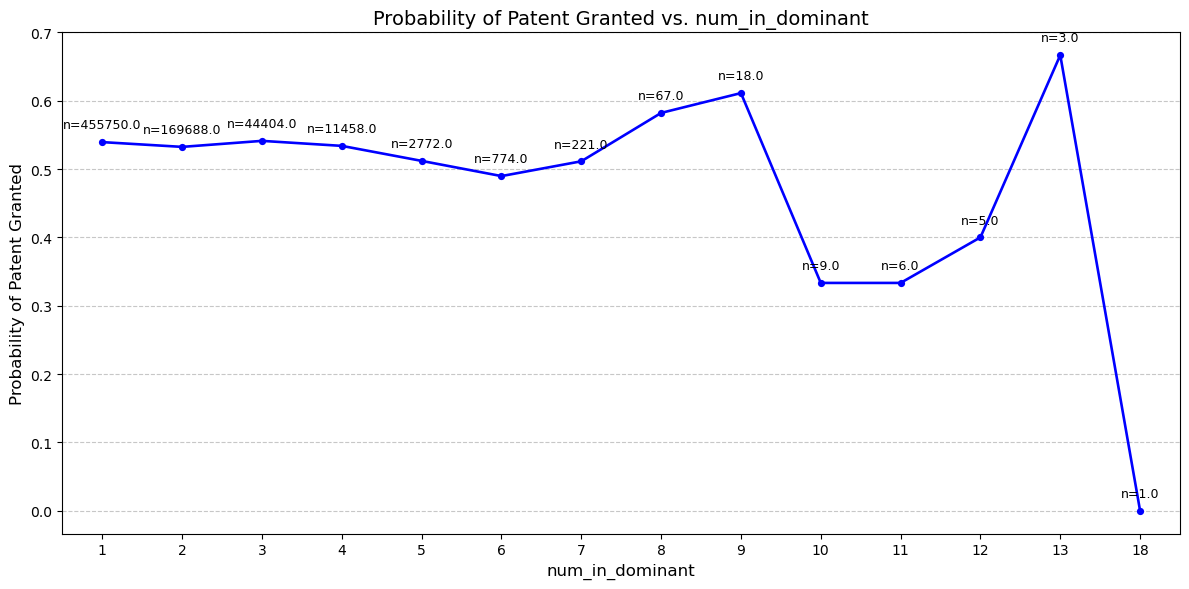

In [37]:
import seaborn as sns

# Calculate the probability of patent_granted=True for each num_in_dominant
granted_probability_num_dominant = full_data.groupby('num_in_dominant')['patent_granted'].mean().reset_index()
granted_probability_num_dominant['count'] = full_data.groupby('num_in_dominant').size().values  # Add count of patents in each group

# Plot
plt.figure(figsize=(12, 6))
sns.pointplot(data=granted_probability_num_dominant, x='num_in_dominant', y='patent_granted', 
              color='blue', scale=0.7, errwidth=1.2, capsize=0.1)
plt.title('Probability of Patent Granted vs. num_in_dominant', fontsize=14)
plt.xlabel('num_in_dominant', fontsize=12)
plt.ylabel('Probability of Patent Granted', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the number of patents in each group
for i, row in granted_probability_num_dominant.iterrows():
    plt.text(i, row['patent_granted'] + 0.02, f'n={row["count"]}', ha='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

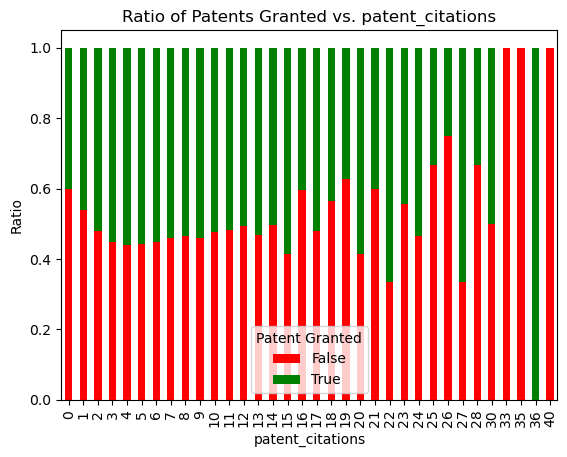

In [30]:
# Group by patent_citations and calculate the ratio of patents granted
granted_ratio_patent_citations = full_data.groupby('patent_citations')['patent_granted'].value_counts(normalize=True).unstack()

# Plot
plt.figure(figsize=(12, 6))
granted_ratio_patent_citations.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Ratio of Patents Granted vs. patent_citations')
plt.xlabel('patent_citations')
plt.ylabel('Ratio')
plt.legend(title='Patent Granted', labels=['False', 'True'])
plt.show()

/tmp/ipykernel_5281/2572523383.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  granted_ratio_total_citations = full_data.groupby('total_citations_binned')['patent_granted'].value_counts(normalize=True).unstack()


<Figure size 1400x600 with 0 Axes>

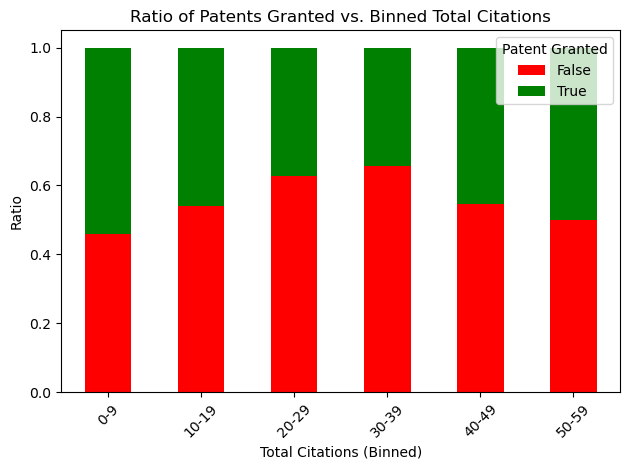

In [32]:
# Create bins for total_citations
# Adjust the bin size as needed for your data
bins = range(0, full_data['total_citations'].max() + 10, 10)  # Bins of size 10
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Labels for the bins

# Add a new column for binned total_citations
full_data['total_citations_binned'] = pd.cut(full_data['total_citations'], bins=bins, labels=labels, right=False)

# Group by the binned total_citations and calculate the ratio of patents granted
granted_ratio_total_citations = full_data.groupby('total_citations_binned')['patent_granted'].value_counts(normalize=True).unstack()

# Plot
plt.figure(figsize=(14, 6))
granted_ratio_total_citations.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Ratio of Patents Granted vs. Binned Total Citations')
plt.xlabel('Total Citations (Binned)')
plt.ylabel('Ratio')
plt.legend(title='Patent Granted', labels=['False', 'True'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

/tmp/ipykernel_5281/946807939.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  granted_probability = full_data.groupby('total_citations_binned')['patent_granted'].mean().reset_index()
/tmp/ipykernel_5281/946807939.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  granted_probability['count'] = full_data.groupby('total_citations_binned').size().values  # Add count of patents in each bin
/tmp/ipykernel_5281/946807939.py:17: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linew

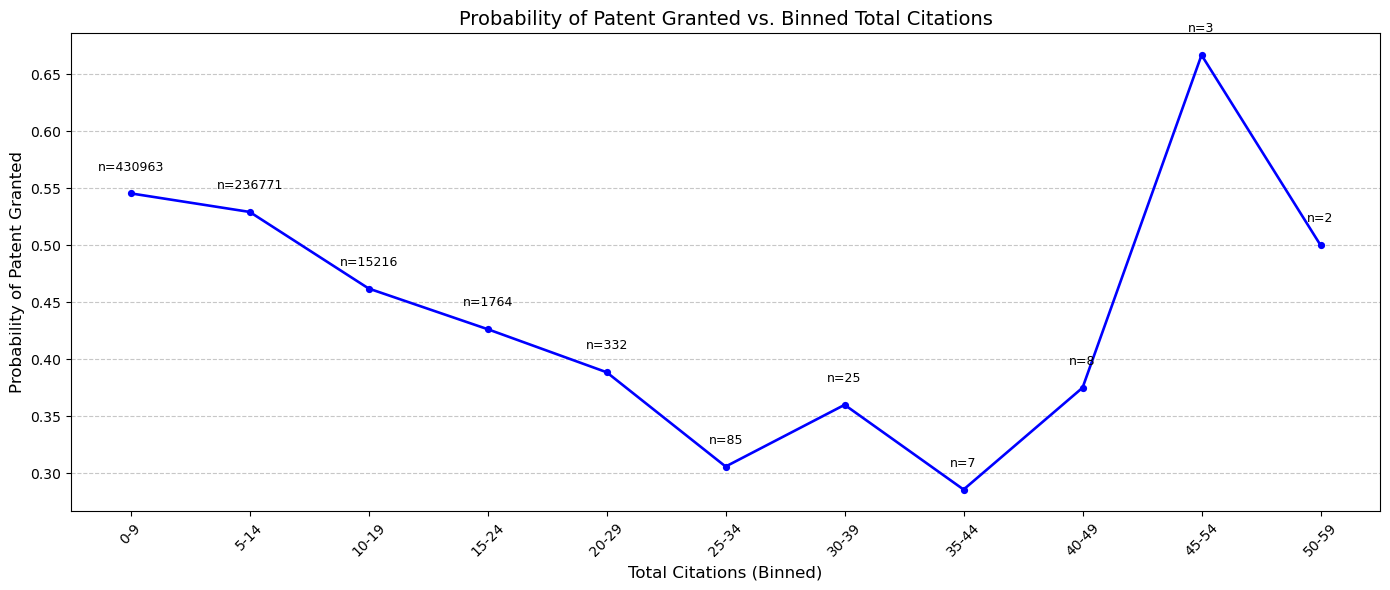

In [36]:
import numpy as np
import seaborn as sns

# Create bins for total_citations
bins = range(0, full_data['total_citations'].max() + 5, 5)  # Bins of size 10
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Labels for the bins

# Add a new column for binned total_citations
full_data['total_citations_binned'] = pd.cut(full_data['total_citations'], bins=bins, labels=labels, right=False)

# Calculate the probability of patent_granted=True for each bin
granted_probability = full_data.groupby('total_citations_binned')['patent_granted'].mean().reset_index()
granted_probability['count'] = full_data.groupby('total_citations_binned').size().values  # Add count of patents in each bin

# Plot
plt.figure(figsize=(14, 6))
sns.pointplot(data=granted_probability, x='total_citations_binned', y='patent_granted', 
              color='blue', scale=0.7, errwidth=1.2, capsize=0.1)
plt.title('Probability of Patent Granted vs. Binned Total Citations', fontsize=14)
plt.xlabel('Total Citations (Binned)', fontsize=12)
plt.ylabel('Probability of Patent Granted', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the number of patents in each bin
for i, row in granted_probability.iterrows():
    plt.text(i, row['patent_granted'] + 0.02, f'n={row["count"]}', ha='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

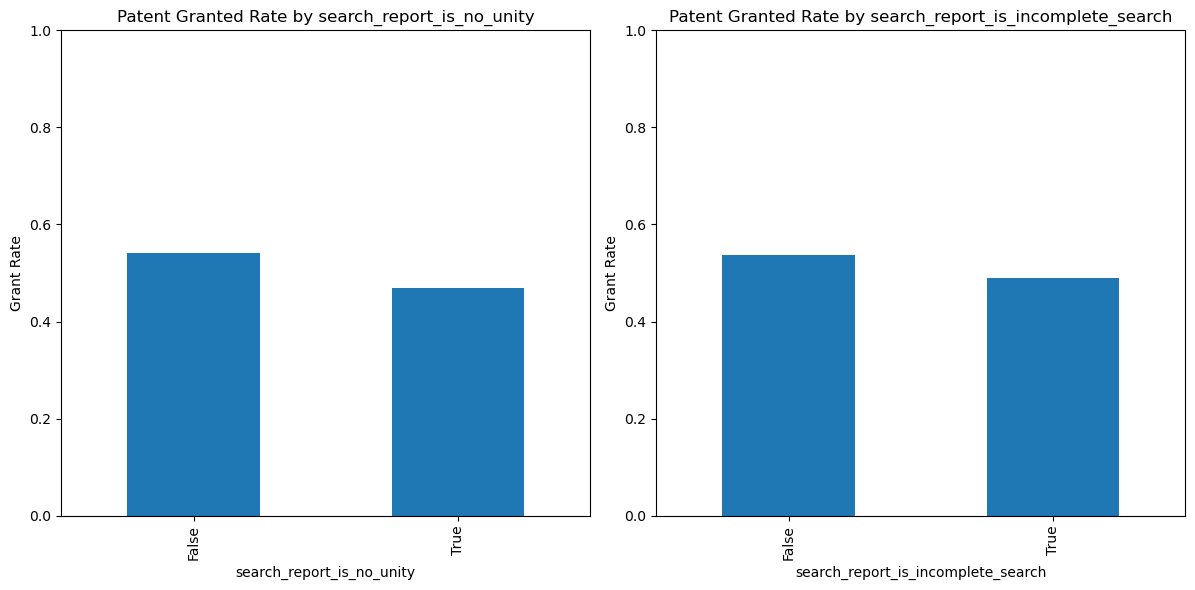

In [40]:
flags = ['search_report_is_no_unity', 'search_report_is_incomplete_search']

plt.figure(figsize=(18,6))
for i, flag in enumerate(flags, 1):
    plt.subplot(1,3,i)
    full_data.groupby(flag)['patent_granted'].mean().plot(kind='bar')
    plt.title(f'Patent Granted Rate by {flag}')
    plt.xlabel(flag)
    plt.ylabel('Grant Rate')
    plt.ylim(0,1)
plt.tight_layout()
plt.show()

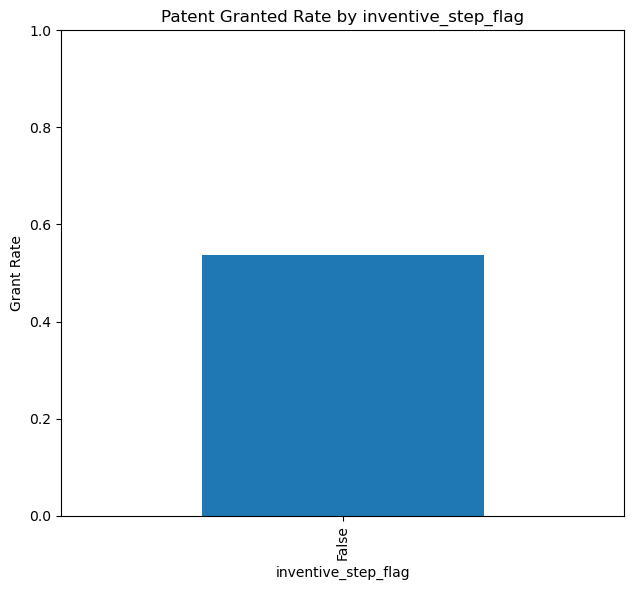

In [57]:
flags = ['inventive_step_flag']

plt.figure(figsize=(18,6))
for i, flag in enumerate(flags, 1):
    plt.subplot(1,3,i)
    full_data.groupby(flag)['patent_granted'].mean().plot(kind='bar')
    plt.title(f'Patent Granted Rate by {flag}')
    plt.xlabel(flag)
    plt.ylabel('Grant Rate')
    plt.ylim(0,1)
plt.tight_layout()
plt.show()

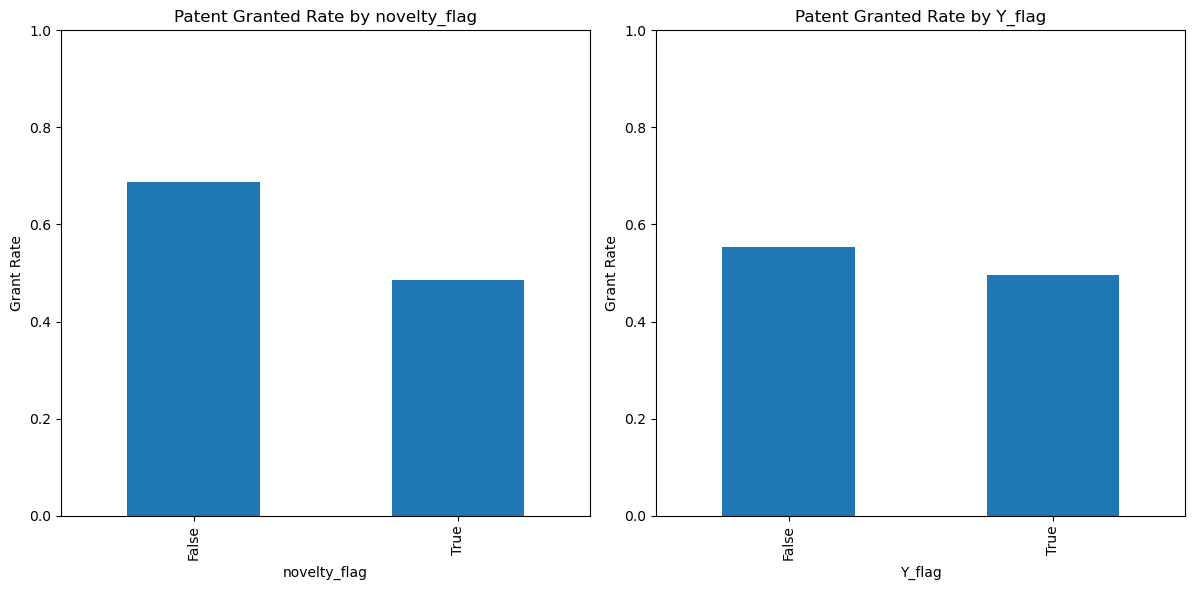

In [56]:
flags = ['novelty_flag', 'Y_flag']

plt.figure(figsize=(18,6))
for i, flag in enumerate(flags, 1):
    plt.subplot(1,3,i)
    full_data.groupby(flag)['patent_granted'].mean().plot(kind='bar')
    plt.title(f'Patent Granted Rate by {flag}')
    plt.xlabel(flag)
    plt.ylabel('Grant Rate')
    plt.ylim(0,1)
plt.tight_layout()
plt.show()

In [84]:
hh = full_data.groupby(['dominant_section'])['patent_granted'].value_counts(normalize=True).rename('diff_data')


plt.figure(figsize=(12, 6))
granted_ratio_patent_citations.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Ratio of Patents Granted vs. patent_citations')
plt.xlabel('patent_citations')
plt.ylabel('Ratio')
plt.legend(title='Patent Granted ratio for each different dominant section', labels=['False', 'True'])
plt.show()

NameError: name 'full_data' is not defined

# Representative/company data visuelisation

In [1]:
import pandas as pd
full_data = pd.read_csv('./Data/up_to_2024_full_patent_data_derived_industry.csv',sep='\t')
full_data.drop(columns = ['Unnamed: 0','publication_date',
       'publication_language'])
representative_data = pd.read_csv('./Data/summarry_attorney_company_data_based_on_train_set.csv',sep='\t')
company_data = pd.read_csv('./Data/company_summary_based_on_train_set.csv',sep='\t')

In [6]:
representative_data.columns

Index(['attorney_name', 'company_url', 'dominant_section_attorney',
       'secondary_section_attorney', 'number_of_sections',
       'number_of_applications', 'number_of_patents_granted',
       'A_application_count', 'B_application_count', 'C_application_count',
       'D_application_count', 'E_application_count', 'F_application_count',
       'G_application_count', 'H_application_count', 'A_patent_count',
       'B_patent_count', 'C_patent_count', 'D_patent_count', 'E_patent_count',
       'F_patent_count', 'G_patent_count', 'H_patent_count',
       'patent_applications_company', 'patents_granted_company',
       'dominant_company_section', 'secondary_company_section',
       'A_application_count_company', 'B_application_count_company',
       'C_application_count_company', 'D_application_count_company',
       'E_application_count_company', 'F_application_count_company',
       'G_application_count_company', 'H_application_count_company',
       'A_patent_count_company', 'B_patent_

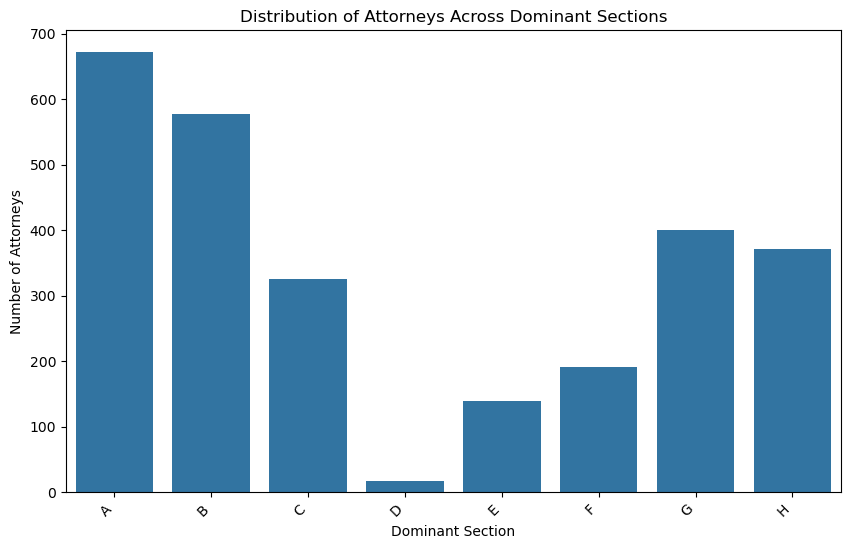

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for nicer plots

# Assuming your DataFrame is named 'representative_data'

# Count the occurrences of each dominant section
section_counts = representative_data['dominant_section_attorney'].value_counts().sort_index().drop('X')

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(x='dominant_section_attorney', data=representative_data, order=section_counts.index)  # Use seaborn for a nicer plot
plt.title('Distribution of Attorneys Across Dominant Sections')
plt.xlabel('Dominant Section')
plt.ylabel('Number of Attorneys')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

In the following visuelisation we can see how the applications from patent attorneys differ (in thir distribution over the corresponding sections) from the general dataset.

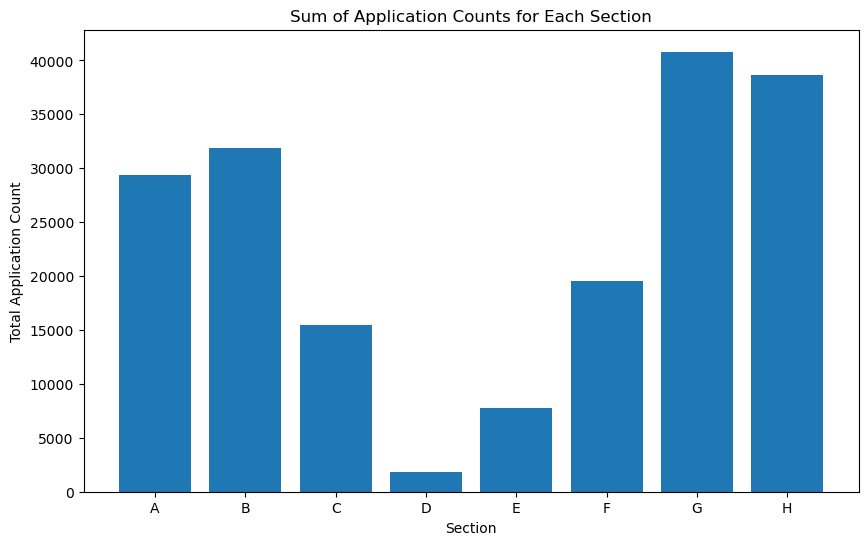

In [5]:
# List of sections
sections = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# Calculate the sum of application counts for each section
application_sums = []
for section in sections:
    application_sums.append(representative_data[f'{section}_application_count'].sum())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sections, application_sums)
plt.title('Sum of Application Counts for Each Section')
plt.xlabel('Section')
plt.ylabel('Total Application Count')
plt.show()

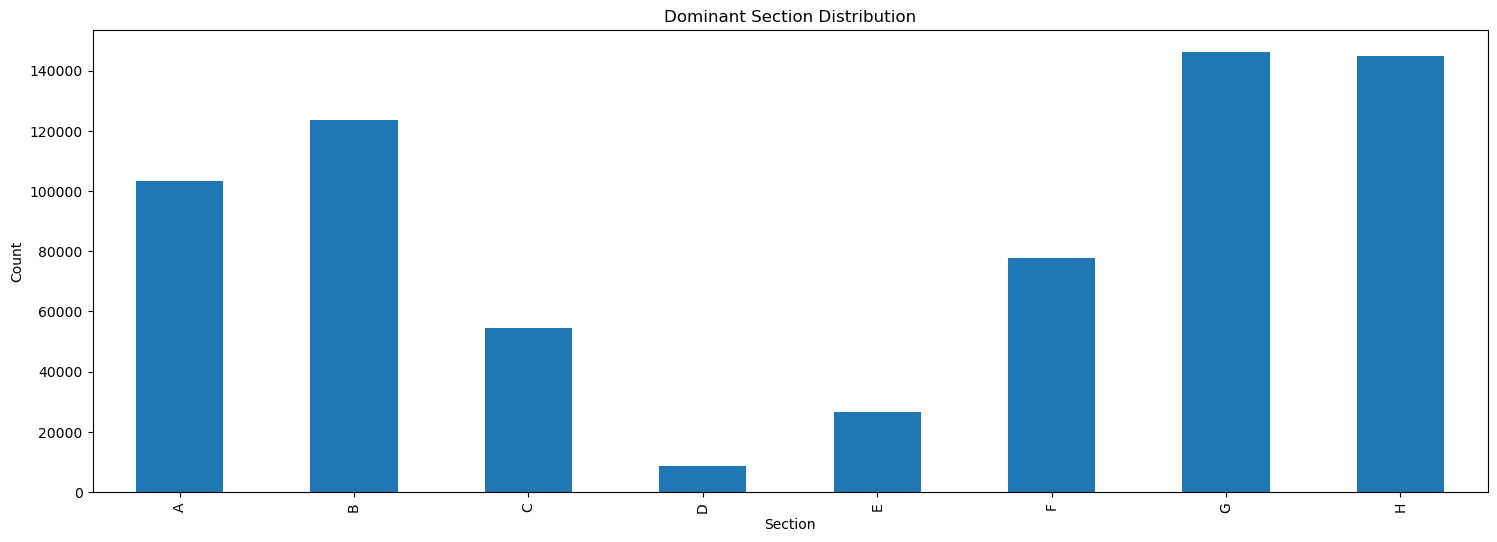

In [6]:
plt.figure( figsize=(18,6))
full_data['dominant_section'].value_counts().sort_index().plot(kind='bar')
plt.title('Dominant Section Distribution')
plt.xlabel('Section')
plt.ylabel('Count')

plt.show()

We will now conduct a statistical test to see if the distributions are the same.

In [38]:
full_data_distribution = list(full_data['dominant_section'].value_counts().sort_index())
representative_data_distribution = [int(a) for a in application_sums]

In [49]:
import numpy as np
from scipy.stats import chisquare

def compare_distributions(arr1, arr2):
    observed1 = np.array(arr1)
    observed2 = np.array(arr2)

    # Calculate the total observations for each array
    n1 = sum(observed1)
    n2 = sum(observed2)
    n_total = n1 + n2
    
    # Calculate the expected frequencies (average of the combined counts)
    expected1 = [round((observed1[i] + observed2[i]) * n1 / n_total) if i < len(arr2) else round(observed1[i] * n1 / n_total) for i in range(len(arr1))]
    expected2 = [round((observed1[i] + observed2[i]) * n2 / n_total) if i < len(arr2) else 0 for i in range(len(arr1))]

    chi2_statistic, p_value = chisquare(f_obs=observed1, f_exp=expected1)




    return chi2_statistic, p_value


chi2, p = compare_distributions(full_data_distribution, representative_data_distribution)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05  # Significance level (common choice)
if p < alpha:
    print("The arrays are likely from DIFFERENT distributions.")
else:
    print("There is not enough evidence to say the arrays are from DIFFERENT distributions.")

Chi-squared statistic: 82.49021580689327
P-value: 4.273676797387685e-15
The arrays are likely from DIFFERENT distributions.


Since the lists likely come from different distributions we can safely say that there is a difference between what the Broader industry patents are and what IP consulting firms focus on. Eventhough the initial bias was that this difference would only affect medical patents, it seems to be broader. Later on in this notebook I will do a training run on some models featuring only patent data which corresponds to some patent attorney, and this distribution difference means that we cannot generalise the conclusions of those models to patent data that is not representet by a specialised IP company.

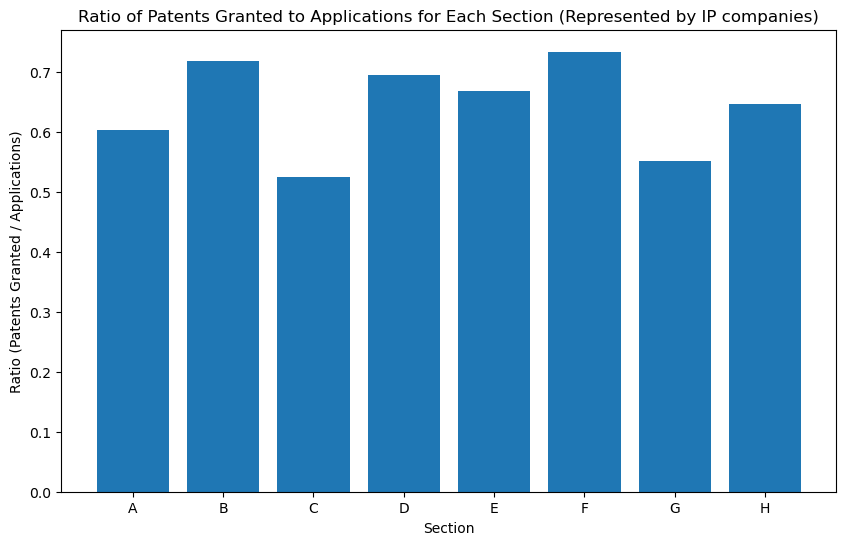

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'representative_data'

# List of sections
sections = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# Calculate the ratio for each section
ratios = []
for section in sections:
    patent_count = representative_data[f'{section}_patent_count'].sum()
    application_count = representative_data[f'{section}_application_count'].sum()
    if application_count > 0:  # Avoid division by zero
        ratios.append(patent_count / application_count)
    else:
        ratios.append(0)  # Or handle the case as you see fit

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sections, ratios)
plt.title('Ratio of Patents Granted to Applications for Each Section (Represented by IP companies)')
plt.xlabel('Section')
plt.ylabel('Ratio (Patents Granted / Applications)')
plt.show()

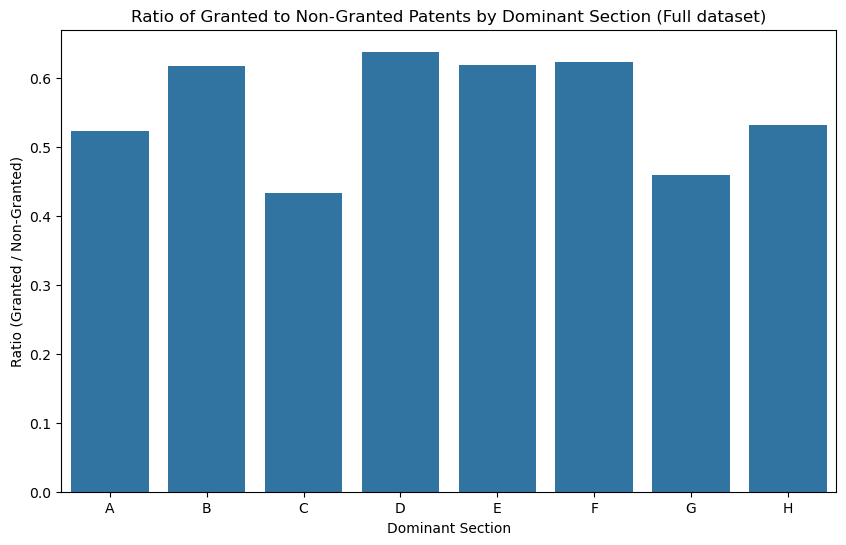

In [59]:
grouped_data = full_data.groupby(['dominant_section', 'patent_granted']).size().unstack(fill_value=0)

# Calculate the ratio of granted to non-granted patents for each section
grouped_data['ratio'] = grouped_data[True] / (grouped_data[True] + grouped_data[False])

# Create a bar plot of the ratios
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y='ratio', data=grouped_data)  # Use seaborn for a nicer plot
plt.title('Ratio of Granted to Non-Granted Patents by Dominant Section (Full dataset)')
plt.xlabel('Dominant Section')
plt.ylabel('Ratio (Granted / Non-Granted)')
plt.show()

In [7]:

def get_non_represented_patents(full_data, representative_data):
    # Perform an anti-join to find patents not represented by attorneys
    non_represented_patents = full_data[~full_data['rep_name'].isin(representative_data['attorney_name'])]
    
    return non_represented_patents
non_represented_patents = get_non_represented_patents(full_data, representative_data)

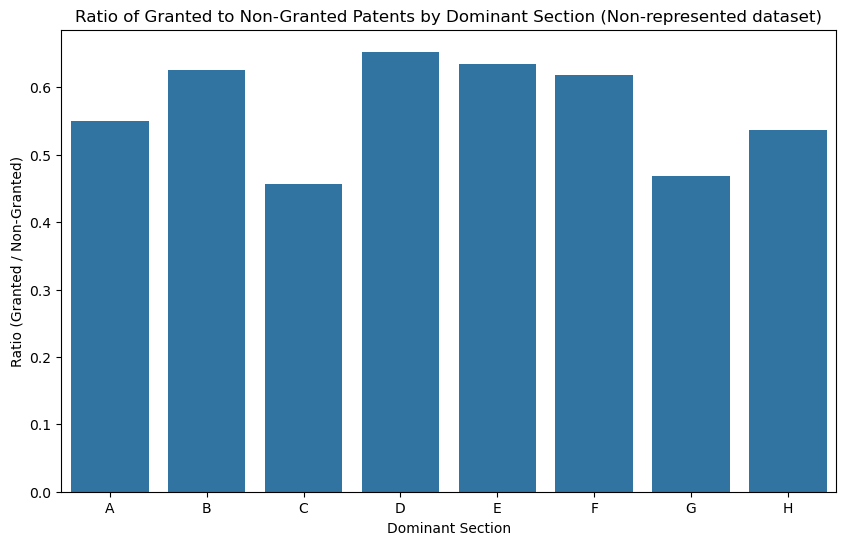

In [12]:
grouped_data = non_represented_patents.groupby(['dominant_section', 'patent_granted']).size().unstack(fill_value=0)

# Calculate the ratio of granted to non-granted patents for each section
grouped_data['ratio'] = grouped_data[True] / (grouped_data[True] + grouped_data[False])

ratios_2 = list(grouped_data[True] / (grouped_data[True] + grouped_data[False]))
# Create a bar plot of the ratios
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y='ratio', data=grouped_data)  # Use seaborn for a nicer plot
plt.title('Ratio of Granted to Non-Granted Patents by Dominant Section (Non-represented dataset)')
plt.xlabel('Dominant Section')
plt.ylabel('Ratio (Granted / Non-Granted)')
plt.show()


Although it is visible from the barcharts themselves, we will conduct a statistical test to show that the chance of a application to get patented is greater if a proffesional representative (specialised representative firm) represents it. 

In [13]:
ratios_2

[0.5497948104824377,
 0.6257881623105868,
 0.4561200219552357,
 0.6528464359751236,
 0.6344092607337539,
 0.6186594379546385,
 0.4691161844226218,
 0.5373140891053193]

In [14]:
from scipy.stats import mannwhitneyu

# Example data
array1 = ratios
array2 = ratios_2

# One-sided Mann-Whitney U test (alternative='greater' checks if array1 > array2)
stat, p_value = mannwhitneyu(array1, array2, alternative='greater')

print(f"Mann-Whitney U test statistic: {stat}, p-value: {p_value}")


Mann-Whitney U test statistic: 49.0, p-value: 0.041491841491841486


/tmp/ipykernel_4794/115712233.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([array1, array2], labels=["Ip company applications", "Non-ip company applications"])


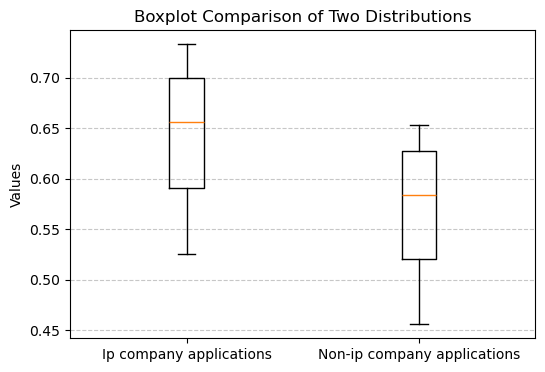

In [16]:
plt.figure(figsize=(6, 4))
plt.boxplot([array1, array2], labels=["Ip company applications", "Non-ip company applications"])
plt.title("Boxplot Comparison of Two Distributions")
plt.ylabel("Values")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [2]:
full_data

Unnamed: 0  application_number  publication_date publication_language  \
0                0          13190297.5          20140528                   EN   
1                1          19179293.6          20200318                   EN   
2                2          19195563.2          20200122                   EN   
3                3          17173990.7          20181205                   EN   
4                4          12186255.1          20150422                   EN   
...            ...                 ...               ...                  ...   
700353      700353          16196149.5          20170503                   EN   
700354      700354          15171332.8          20161214                   EN   
700355      700355          23155938.6          20231011                   EN   
700356      700356          16175676.2          20170412                   DE   
700357      700357          21161748.5          20220914                   EN   

                                                 rep_name  total_citations  \
0               van der Elsen, Jacobus Theodorus Henricus               14   
1                                                  Ipside               11   
2                                    Neilson, Martin Mark               13   
3                                       Wittmann, Günther               15   
4                                        Holmes, Rosalind               15   
...                                                   ...              ...   
700353  Vossius & Partner \nPatentanwälte Rechtsanwält...               10   
700354                        van Essen, Peter Augustinus               10   
700355  Manitz Finsterwald \nPatent- und Rechtsanwalts...               10   
700356                                 FDST Patentanwälte               10   
700357                                BASF IP Association               10   

        patent_citations  novelty_flag  inventive_step_flag  patent_granted  \
0                     14         False                False            True   
1                     11         False                False            True   
2                     12          True                False           False   
3                     12          True                False           False   
4                     14          True                False           False   
...                  ...           ...                  ...             ...   
700353                10         False                False            True   
700354                10          True                False           False   
700355                10          True                False           False   
700356                10          True                False            True   
700357                10          True                False           False   

        ...  search_report_is_incomplete_search  search_report_is_no_search  \
0       ...                               False                       False   
1       ...                               False                       False   
2       ...                               False                       False   
3       ...                               False                       False   
4       ...                               False                       False   
...     ...                                 ...                         ...   
700353  ...                               False                       False   
700354  ...                               False                       False   
700355  ...                               False                       False   
700356  ...                               False                       False   
700357  ...                               False                       False   

        num_fields  dominant_section secondary_section  num_in_dominant  \
0                1                 G                 G                1   
1                1                 B              

# Applying a technique from a study

The study can be found [here](https://drive.google.com/file/d/1QPfctKq2tbctdJLOKC3p9XLBfVOqTmp3/view). The resources explaining how to use it can be found [here](https://docs.google.com/document/d/1Sz4oNmeVDjZqLib-h29OOQ_QQNVv-O35/edit).
The weights themselves are downloaded from [here](https://sites.google.com/site/nikolaszolas/PatentCrosswalk).

To give a short summary of this study, in it there is a proposed method of mapping IPC classifications onto some industry classification (In our case we will use ISIC rev4). This is done by analyzing the keywords in the patent abstracts and matching them to specific industry keywords and using the frequencies of of each IPC classification for some industry to derive a bayes probability for each classification of the form P(A|B) where A is the patent belonging to some industry sector and B is the patent belonging to some classification. The study provides the calculated weights and makes it easy to implement our own translation from IPC classification to economic sectors. 

The studies provides probabilities P(A|B) which are retriavable from tables for each IPC classification. We just need to multiply them together (if our patent contains multiple classes) and find the maximum class (or two biggest classes) that our sample belongs to (which will conviniently be given as probabilities). 

## Mapping and joining the dataset

In [1]:
import pandas as pd
ipc_to_isic_l3 = pd.read_csv('./Data/ipc4_to_isic_rev4_2.csv')
ipc_to_isic_l2 = pd.read_csv('./Data/ipc4_to_isic_rev4_1.csv') 
full_data = pd.read_csv('./Data/up_to_2024_full_patent_data_derived.csv',sep='\t')
full_data.drop(columns = ['publication_date', 'publication_language',
       'rep_name', 'total_citations', 'patent_citations', 'novelty_flag',
       'inventive_step_flag', 'patent_granted', 'filing_date',
       'patent_granted_date', 'search_report_date',
       'search_report_is_no_unity', 'search_report_is_incomplete_search',
       'search_report_is_no_search', 'num_fields', 'dominant_section',
       'secondary_section', 'num_in_dominant', 'num_in_secondary',
       'num_sections'],inplace=True)

In [2]:
ipc_to_isic_l2

ipc4 isic_rev4_1  probability_weight
0     A01B           A            0.371131
1     A01B           B            0.085110
2     A01B           C            0.543759
3     A01C           A            0.898454
4     A01C           B            0.065102
...    ...         ...                 ...
1225  H05G       Other            0.170428
1226  H05H           C            0.744699
1227  H05H       Other            0.255301
1228  H05K           C            0.948529
1229  H05K       Other            0.051471

[1230 rows x 3 columns]

In [3]:
# Function to map patents to top 3 ISIC industries
def map_patents_to_industries(full_data, ipc_to_isic_l2,ipc_to_isic_l3):
    result = []

    for _, row in full_data.iterrows():
        app_number = row['application_number']
        ipc_list = row['search_report_ipc_field'].split(', ')
        
        industry_probs_l2 = {}
        industry_probs_l3 = {}


        for ipc in ipc_list:
            ipc_l2_probs = ipc_to_isic_l2[ipc_to_isic_l2['ipc4'] == ipc]
            ipc_l3_probs = ipc_to_isic_l3[ipc_to_isic_l3['ipc4'] == ipc]


            for _, entry in ipc_l2_probs.iterrows():
                isic = entry['isic_rev4_1']
                prob = entry['probability_weight']
                if isic in industry_probs_l2:
                    industry_probs_l2[isic] *= prob
                else:
                    industry_probs_l2[isic] = prob

            for key in industry_probs_l2:
                if key not in ipc_l2_probs['isic_rev4_1']:
                    industry_probs_l2[key]*=0.02


            for _, entry in ipc_l3_probs.iterrows():
                isic = entry['isic_rev4_2']
                prob = entry['probability_weight']
                if isic in industry_probs_l3:
                    industry_probs_l3[isic] *= prob
                else:
                    industry_probs_l3[isic] = prob

            for key in industry_probs_l3:
                if key not in ipc_l3_probs['isic_rev4_2']:
                    industry_probs_l3[key]*=0.02
            

        # Select the top 3 ISIC industries
        top_3_industries_l2 = sorted(industry_probs_l2.items(), key=lambda x: x[1], reverse=True)[:3]
        top_3_industries_l3 = sorted(industry_probs_l3.items(), key=lambda x: x[1], reverse=True)[:3]

        top_3_codes_l2 = [x[0] for x in top_3_industries_l2]
        top_3_probs_l2 = [x[1] for x in top_3_industries_l2]

        top_3_codes_l3 = [x[0] for x in top_3_industries_l3]
        top_3_probs_l3 = [x[1] for x in top_3_industries_l3]

        if len(top_3_codes_l2) >0:
            top_l2_industry = top_3_industries_l2[0][0]
        else:
            top_l2_industry = None

        if len(top_3_codes_l3) >0:
            top_l3_industry = top_3_industries_l3[0][0]
        else:
            top_l3_industry = None

        

        result.append({'application_number': app_number, 'top_3_industries_l2': top_3_codes_l2,
                       'industry_probs_l2':industry_probs_l2,'top_3_industries_l3':top_3_industries_l3,
                       'industry_probs_l3':industry_probs_l3,'top_l3_industry':top_l3_industry,
                      'top_l2_industry':top_l2_industry})

    return pd.DataFrame(result)

# Applying the function
mapped_data = map_patents_to_industries(full_data, ipc_to_isic_l2,ipc_to_isic_l3)

KeyboardInterrupt: 

In [4]:
#mapped_data.to_csv('industry_mapped_patent_data.csv',sep='\t',index=False)
mapped_data= pd.read_csv('./Data/industry_mapped_patent_data.csv',sep='\t')

In [5]:
mapped_data.columns

Index(['application_number', 'top_3_industries_l2', 'industry_probs_l2',
       'top_3_industries_l3', 'industry_probs_l3', 'top_l3_industry',
       'top_l2_industry'],
      dtype='object')

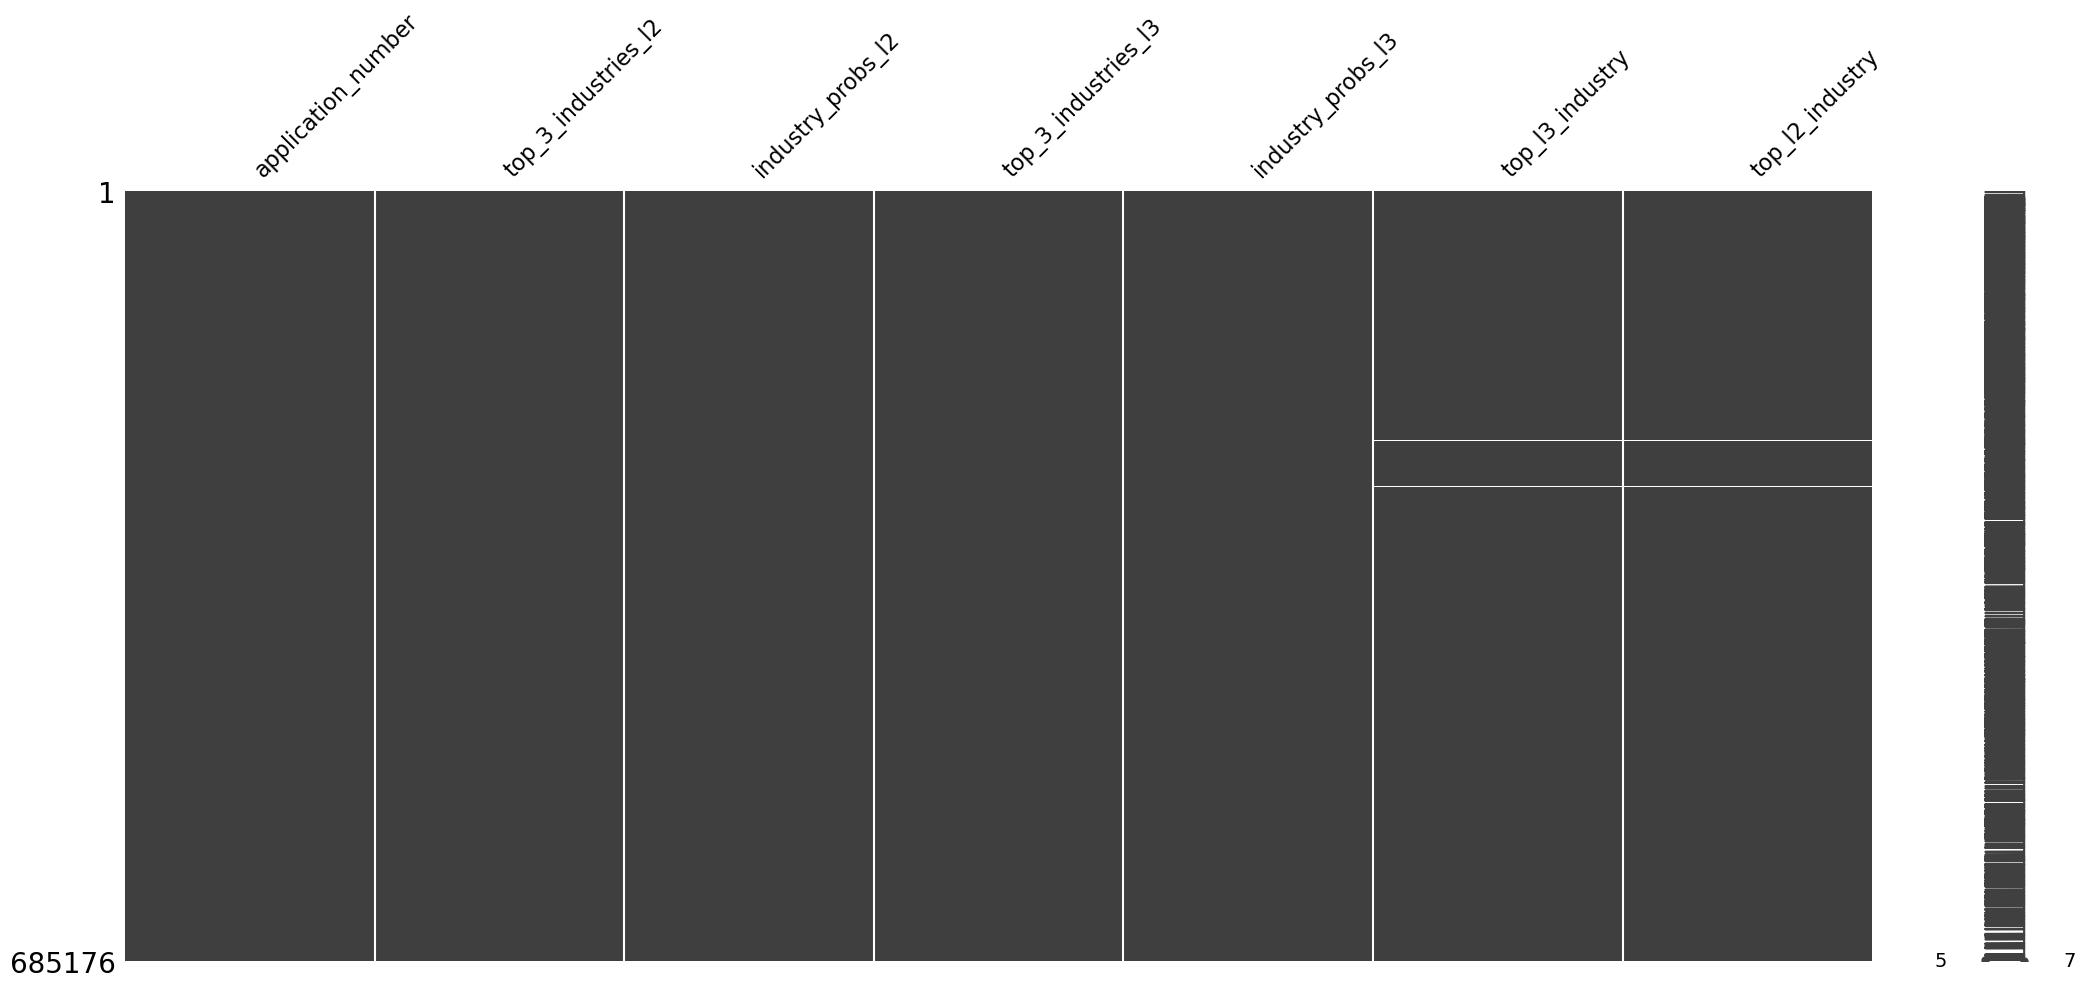

In [25]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(mapped_data)
plt.show()

In [6]:
mapped_data.drop(columns=[ 'top_3_industries_l2', 'industry_probs_l2',
       'top_3_industries_l3', 'industry_probs_l3'], inplace=True)

In [7]:
full_data = pd.read_csv('./Data/up_to_2024_full_patent_data_derived.csv',sep='\t')

In [8]:
full_data_and_industry= pd.merge(full_data, mapped_data, on='application_number', how='inner')

In [9]:
full_data_and_industry.to_csv('./Data/up_to_2024_full_patent_data_derived_industry.csv',sep='\t')

In [ ]:
full_data = pd.read_csv('./Data/up_to_2024_full_patent_data_derived_industry.csv')

# Feature selection through models

## Only patent data feature selection

We will do feature selectio through models only based on the train data, since in a real world scenario we would not have data from the future. 

In [1]:
import pandas as pd
train_data = pd.read_csv('./Data/train_data_up_to.csv',sep='\t')
test_data = pd.read_csv('./Data/test_data_up_to.csv',sep='\t')

In [3]:
left_out_features = ['publication_date','publication_language','search_report_ipc_field','filing_date','patent_granted_date',
                   'search_report_date','inventive_step_flag','rep_name','application_number','patent_granted_date','search_report_is_no_search']

train_data.drop(columns = left_out_features,inplace=True)
test_data.drop(columns = left_out_features,inplace=True)

In [5]:
train_data.columns

Index(['total_citations', 'patent_citations', 'novelty_flag', 'patent_granted',
       'Y_flag', 'search_report_is_no_unity',
       'search_report_is_incomplete_search', 'num_fields', 'dominant_section',
       'secondary_section', 'num_in_dominant', 'num_in_secondary',
       'num_sections'],
      dtype='object')

### Tree Only Feature Selection (Barebones patent data)

In [15]:
Y_feature = 'patent_granted'
X_features = [item for item  in list(train_data.columns) if item != Y_feature ]

In [16]:
X_train = train_data[X_features]
Y_train  = train_data[Y_feature]

In [17]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(df, label_columns):
   
    ohe = OneHotEncoder(sparse_output=False, dtype=int)  # Set sparse=False to get a dense array
    # Fit and transform the selected columns
    encoded_array = ohe.fit_transform(df[label_columns])
    # Create a DataFrame for the one-hot encoded variables
    encoded_df = pd.DataFrame(encoded_array, 
                              columns=ohe.get_feature_names_out(label_columns), 
                              index=df.index)
    # Drop the original categorical columns and concatenate the one-hot encoded DataFrame
    df_remaining = df.drop(columns=label_columns)
    result_df = pd.concat([df_remaining, encoded_df], axis=1)
    return result_df

In [23]:
X_train = one_hot_encode(X_train,['dominant_section','secondary_section'])

In [10]:
from sklearn.tree import DecisionTreeClassifier

tr = DecisionTreeClassifier()

tr.fit(X_train,Y_train)

DecisionTreeClassifier()

In [22]:
len(importances)

26

In [11]:
importances = tr.feature_importances_

k = 10
top_k_indices = importances.argsort()[-k:][::-1]

# Get the names of the top k most important features
top_k_feature_names = X_train.columns[top_k_indices]

# Print the top k most important features and their importances
print("Top", k, "most important features:")
for name, importance in zip(top_k_feature_names, importances[top_k_indices]):
    print(name, ":", importance)

Top 10 most important features:
novelty_flag : 0.17855208828569713
total_citations : 0.14021364781340512
patent_citations : 0.1286385371326996
Y_flag : 0.09032513961663882
num_fields : 0.06960801727826478
num_in_dominant : 0.05168945967362414
dominant_section_G : 0.05019715803776794
dominant_section_C : 0.04125122170353228
num_sections : 0.0373325475744316
search_report_is_no_unity : 0.030176363091013614


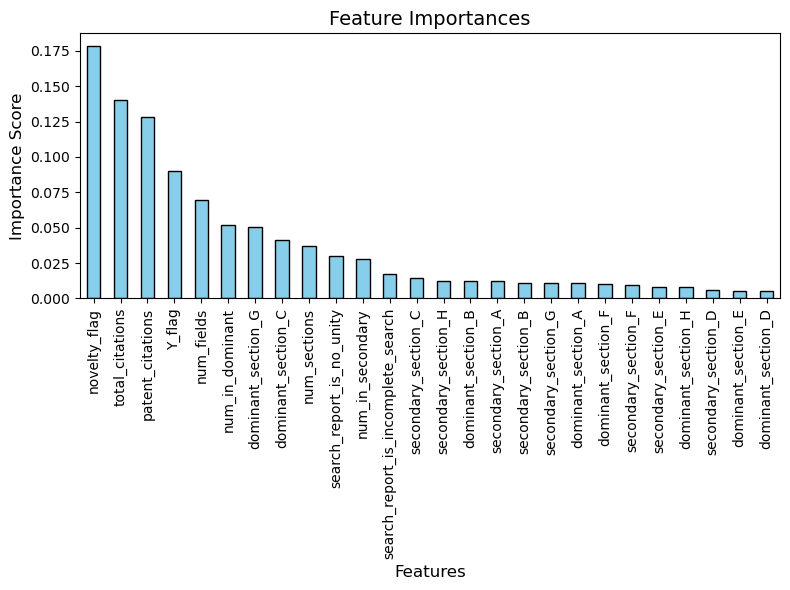

In [25]:
import matplotlib.pyplot as plt
# 1. Convert lists to a DataFrame with feature names as the index
feature_importances_df = pd.DataFrame(
    {'importance': importances},
    index=list(X_train.columns)
)

# 2. Sort by importance in descending order (optional but usually helpful)
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# 3. Create the bar chart
plt.figure(figsize=(8, 6))
ax = feature_importances_df['importance'].plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

# 4. Add labels and title
ax.set_title('Feature Importances', fontsize=14)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Importance Score', fontsize=12)

# 5. Rotate x-axis labels to be vertical
plt.xticks(rotation=90)

# 6. Tight layout to avoid cutoff
plt.tight_layout()

# 7. Show the plot
plt.show()

In [26]:
X_test = test_data[X_features]
Y_test  = test_data[Y_feature]
X_test = one_hot_encode(X_test,['dominant_section','secondary_section'])


In [27]:
Y_pred=tr.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.28      0.41     74289
        True       0.43      0.86      0.57     47159

    accuracy                           0.50    121448
   macro avg       0.59      0.57      0.49    121448
weighted avg       0.63      0.50      0.47    121448



### Logistic regression only feature selection (barebones patent data)

A logistic regression classifier benefits greatly from scaling the data. For the categorical variables we still need OneHotEncoding.

The scaling we will implement is: 
- Ratio scaling : For the values such as Number_citations, number_patents we will derive a value named patent_ratio =  number_patents /number_citations, and to preserve the magnitude of the values (to not overweight applications that have a small number of citations which are patents) we need to scale number_citation using a log trick.
- For dominant and secondary field we will have two ratios:
   1. num_dominant/num_fields
   2. num_secondary/num_fields again with number of fields as a log of itself.

In [1]:
import pandas as pd
train_data = pd.read_csv('./Data/train_data_up_to.csv',sep='\t')
test_data = pd.read_csv('./Data/test_data_up_to.csv',sep='\t')

things_to_drop =  ['publication_date','publication_language','search_report_ipc_field','filing_date','patent_granted_date',
                   'search_report_date','inventive_step_flag','rep_name','application_number','patent_granted_date','search_report_is_no_search']
train_data.drop(columns=things_to_drop,inplace=True)
test_data.drop(columns=things_to_drop,inplace=True)

import numpy as np
def build_derived_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create a new dataframe with derived ratios and log-scaled columns:

    1) patent_ratio = patent_citations / total_citations
       plus a log-scale of total_citations.
    2) dominant_ratio = num_in_dominant / num_fields
       secondary_ratio = num_in_secondary / num_fields
       plus a log-scale of num_fields.
    3) Drop the enumerator columns (original columns used in the ratios).
    4) Any NaN from the log operation is replaced with 0.
    """

    # Make a copy so we don't modify the original df in-place
    new_df = df.copy()

    # --- 1) Patent ratio and log-scaled citations ---
    # patent_ratio = patent_citations / total_citations
    new_df['patent_ratio'] = new_df['patent_citations'] / new_df['total_citations']

    # log_total_citations = log(1 + total_citations)
    new_df['log_total_citations'] = np.log1p(new_df['total_citations'])
    # Replace NaN or inf with 0
    new_df['log_total_citations'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # --- 2) Dominant and secondary field ratios, plus log-scaled num_fields ---
    # dominant_ratio = num_in_dominant / num_fields
    new_df['dominant_ratio'] = new_df['num_in_dominant'] / new_df['num_fields']

    # secondary_ratio = num_in_secondary / num_fields
    new_df['secondary_ratio'] = new_df['num_in_secondary'] / new_df['num_fields']

    # log_num_fields = log(1 + num_fields)
    new_df['log_num_fields'] = np.log1p(new_df['num_fields'])
    # Replace NaN or inf with 0
    new_df['log_num_fields'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # --- 3) Drop columns used as enumerators/denominators ---
    columns_to_drop = [
        'patent_citations',
        'total_citations',
        'num_in_dominant',
        'num_in_secondary',
        'num_fields'
    ]
    new_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    # Return the new DataFrame
    return new_df

train_data_ratiod = build_derived_dataframe(train_data)
test_data_ratiod = build_derived_dataframe(test_data)

/tmp/ipykernel_2885/147729049.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['log_total_citations'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
/tmp/ipykernel_2885/147729049.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [2]:
test_data_ratiod

novelty_flag  patent_granted  Y_flag  search_report_is_no_unity  \
0               True            True   False                      False   
1               True           False   False                      False   
2               True           False   False                      False   
3               True            True    True                      False   
4               True           False    True                      False   
...              ...             ...     ...                        ...   
121443          True           False   False                      False   
121444         False            True   False                      False   
121445         False           False    True                       True   
121446          True            True   False                      False   
121447          True           False    True                      False   

        search_report_is_incomplete_search dominant_section secondary_section  \
0                                    False                G                 G   
1                                    False                G                 H   
2                                    False                G                 G   
3                                    False                A                 D   
4                                    False                A                 A   
...                                    ...              ...               ...   
121443                               False                F                 A   
121444                               False                A                 A   
121445                               False                A                 A   
121446                               False                F                 F   
121447                               False                A                 A   

        num_sections  patent_ratio  log_total_citations  dominant_ratio  \
0                  1      1.000000             2.484907        1.000000   
1                  3      1.000000             2.484907        0.500000   
2                  1      0.928571             2.708050        1.000000   
3                  2      1.000000             2.484907        0.666667   
4                  1      0.800000             2.772589        1.000000   
...              ...           ...                  ...             ...   
121443             2      1.000000             2.397895        0.666667   
121444             1      0.714286             2.708050        1.000000   
121445             1      1.000000             2.397895        1.000000   
121446             1      1.000000             2.397895        1.000000   
121447             1      1.000000             2.397895        1.000000   

        secondary_ratio  log_num_fields  
0              1.000000        0.693147  
1              0.250000        1.609438  
2              1.000000        0.693147  
3              0.333333        1.386294  
4              1.000000        0.693147  
...                 ...             ...  
121443         0.333333        1.386294  
121444         1.000000        1.098612  
121445         1.000000        0.693147  
121446         1.000000        0.693147  
121447         1.000000        0.693147  

[121448 rows x 13 columns]

In [3]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(df, label_columns):
   
    ohe = OneHotEncoder(sparse_output=False, dtype=int)  # Set sparse=False to get a dense array
    # Fit and transform the selected columns
    encoded_array = ohe.fit_transform(df[label_columns])
    # Create a DataFrame for the one-hot encoded variables
    encoded_df = pd.DataFrame(encoded_array, 
                              columns=ohe.get_feature_names_out(label_columns), 
                              index=df.index)
    # Drop the original categorical columns and concatenate the one-hot encoded DataFrame
    df_remaining = df.drop(columns=label_columns)
    result_df = pd.concat([df_remaining, encoded_df], axis=1)
    return result_df

In [4]:
label_columns = ['dominant_section', 	'secondary_section']

test_data_ratiod = one_hot_encode(test_data_ratiod,label_columns)
train_data_ratiod = one_hot_encode(train_data_ratiod,label_columns)

In [5]:
X = [x for x in list(test_data_ratiod.columns) if x not in ['patent_granted']]
y = 'patent_granted'
X_train_ratiod = train_data_ratiod[X]
X_test_ratiod = test_data_ratiod[X]

y_train_ratiod = train_data_ratiod[y]
y_test_ratiod = test_data_ratiod[y]

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000, solver='liblinear')  # Increase max_iter if needed

In [18]:
lr.fit(X_train_ratiod,y_train_ratiod)

LogisticRegression(max_iter=1000, solver='liblinear')

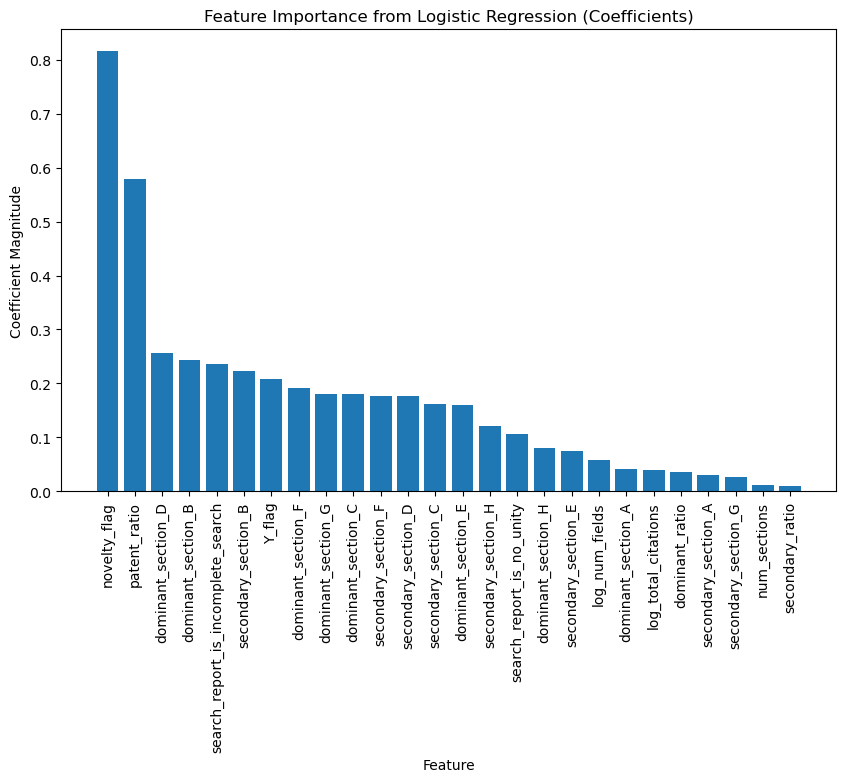

In [19]:
coef_importance = np.abs(lr.coef_[0])  # Take absolute values of coefficients
feature_names = X

# Sort and plot
sorted_idx = np.argsort(coef_importance)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(coef_importance)), coef_importance[sorted_idx], align="center")
plt.xticks(range(len(coef_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.title("Feature Importance from Logistic Regression (Coefficients)")
plt.show()

In [23]:
Y_pred = lr.predict(X_test_ratiod) 

In [25]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test_ratiod, Y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.20      0.32     74289
        True       0.42      0.92      0.58     47159

    accuracy                           0.48    121448
   macro avg       0.61      0.56      0.45    121448
weighted avg       0.65      0.48      0.42    121448



Lets now try a variation where we add some interpretability to the secondary section label when the secondary section is the same as the primary one. We want to set the secodary section to 0 (the one hot encoding has all zeroes for the secondary section) if this is the case. Additionaly we want it's ratio to be zero. 

In [6]:
def fix_same_sections(df: pd.DataFrame) -> pd.DataFrame:
    """
    For each row, if any dominant_section_X == 1 and secondary_section_X == 1,
    then set secondary_section_X = 0 and secondary_ratio = 0.
    Returns the modified DataFrame.
    """
    # We’ll do the updates in-place, so copy if you want to preserve the original DataFrame
    # df = df.copy()

    # Letters of the sections you have (A..H)
    section_letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

    for letter in section_letters:
        dom_col = f"dominant_section_{letter}"
        sec_col = f"secondary_section_{letter}"

        # Create a mask where the same letter is used for both dominant and secondary
        mask = (df[dom_col] == 1) & (df[sec_col] == 1)

        # Set the secondary section to 0 for those rows
        df.loc[mask, sec_col] = 0

        # Also set secondary_ratio to 0 for those rows
        df.loc[mask, "secondary_ratio"] = 0

    return df

In [7]:
train_data_ratiod_fixed = fix_same_sections(train_data_ratiod)
test_data_ratiod_fixed = fix_same_sections(test_data_ratiod)

In [29]:
X = [x for x in list(test_data_ratiod.columns) if x not in ['patent_granted']]
y = 'patent_granted'
X_train_ratiod_fixed = train_data_ratiod_fixed[X]
X_test_ratiod_fixed = test_data_ratiod_fixed[X]

y_train_ratiod_fixed = train_data_ratiod_fixed[y]
y_test_ratiod_fixed = test_data_ratiod_fixed[y]

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000, solver='liblinear')  # Increase max_iter if needed

In [36]:
lr.fit(X_train_ratiod_fixed,y_train_ratiod_fixed)

LogisticRegression(max_iter=1000, solver='liblinear')

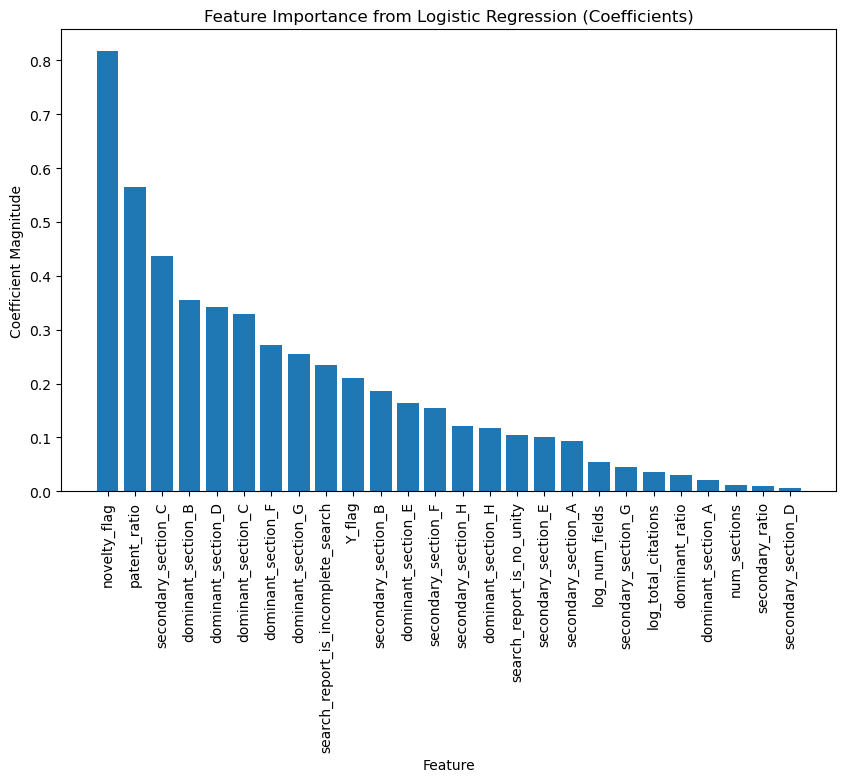

In [37]:
coef_importance = np.abs(lr.coef_[0])  # Take absolute values of coefficients
feature_names = X

# Sort and plot
sorted_idx = np.argsort(coef_importance)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(coef_importance)), coef_importance[sorted_idx], align="center")
plt.xticks(range(len(coef_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.title("Feature Importance from Logistic Regression (Coefficients)")
plt.show()

In [38]:
Y_pred = lr.predict(X_test_ratiod_fixed) 

In [39]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test_ratiod, Y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.19      0.31     74289
        True       0.42      0.92      0.58     47159

    accuracy                           0.48    121448
   macro avg       0.61      0.56      0.45    121448
weighted avg       0.65      0.48      0.42    121448



#### L1 regularisation logistic regression test

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = [x for x in list(test_data_ratiod.columns) if x not in ['patent_granted']]
y = 'patent_granted'
X_train_ratiod_fixed = train_data_ratiod_fixed[X]
X_test_ratiod_fixed = test_data_ratiod_fixed[X]

y_train_ratiod_fixed = train_data_ratiod_fixed[y]
y_test_ratiod_fixed = test_data_ratiod_fixed[y]


# --- Create an L1-regularized Logistic Regression ---
# Note:
#   - penalty='l1' to use L1 regularization
#   - solver='liblinear' or 'saga' (liblinear only supports l1 for binary classification)
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# --- SelectFromModel with L1-regularized LR ---
sfm = SelectFromModel(estimator=model, threshold='mean', prefit=False)

# Fit the selector on the training data
sfm.fit(X_train_ratiod_fixed, y_train_ratiod_fixed)

# Transform both train and test features
X_train_selected = sfm.transform(X_train_ratiod_fixed)
X_test_selected = sfm.transform(X_test_ratiod_fixed)

print("Original number of features:", X_train_ratiod_fixed.shape[1])
print("Reduced number of features:", X_train_selected.shape[1])

# --- Train a logistic regression on the selected features ---
model_selected = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_selected.fit(X_train_selected, y_train_ratiod_fixed)

# Evaluate on the test set
y_pred = model_selected.predict(X_test_selected)
print("Test Accuracy with selected features:", accuracy_score(y_test_ratiod_fixed, y_pred))

print(classification_report(y_test_ratiod_fixed, y_pred))


# Get a boolean mask of the selected features
selected_features_mask = sfm.get_support()
print("Selected Features mask:\n", selected_features_mask)



Original number of features: 26
Reduced number of features: 9
Test Accuracy with selected features: 0.46035340227916477
              precision    recall  f1-score   support

       False       0.81      0.15      0.26     74289
        True       0.41      0.94      0.58     47159

    accuracy                           0.46    121448
   macro avg       0.61      0.55      0.42    121448
weighted avg       0.66      0.46      0.38    121448

Selected Features mask:
 [ True False False False False  True False False False False  True  True
 False  True  True  True False  True False False  True False False False
 False False]


In [16]:
print('used features:')
for i in range(len(selected_features_mask)):
    if selected_features_mask[i]:
        print(X[i])

used features:
novelty_flag
patent_ratio
dominant_section_A
dominant_section_B
dominant_section_D
dominant_section_E
dominant_section_F
dominant_section_H
secondary_section_C


#### L2 reglaristion logistic regression test

In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------
# Assume you already have:
# 1) train_data_ratiod_fixed
# 2) test_data_ratiod_fixed
# 3) A target column 'patent_granted'
# -------------------------
X = [x for x in list(test_data_ratiod.columns) if x not in ['patent_granted']]
y = 'patent_granted'

X_train_ratiod_fixed = train_data_ratiod_fixed[X]
X_test_ratiod_fixed  = test_data_ratiod_fixed[X]

y_train_ratiod_fixed = train_data_ratiod_fixed[y]
y_test_ratiod_fixed  = test_data_ratiod_fixed[y]

# -------------------------
# Create an L2-regularized Logistic Regression
# -------------------------
model_l2 = LogisticRegression(
    penalty='l2',       # <-- L2 regularization
    solver='liblinear', # can also use 'lbfgs' or 'saga'
    C=1.0               # inverse of regularization strength
)

# -------------------------
# SelectFromModel with L2-regularized logistic regression
# threshold=1e-5 means any feature whose absolute coefficient is < 1e-5 is dropped
# L2 won't typically push coefficients exactly to zero, so you may
# want to try threshold="mean" or threshold="median" to actually drop something.
# -------------------------
sfm = SelectFromModel(estimator=model_l2, threshold=1e-5, prefit=False)

# Fit the selector on the training data
sfm.fit(X_train_ratiod_fixed, y_train_ratiod_fixed)

# Transform both train and test sets
X_train_selected = sfm.transform(X_train_ratiod_fixed)
X_test_selected  = sfm.transform(X_test_ratiod_fixed)

print("Original number of features:", X_train_ratiod_fixed.shape[1])
print("Reduced number of features:", X_train_selected.shape[1])

# -------------------------
# Train a logistic regression on the selected features
# -------------------------
model_selected = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model_selected.fit(X_train_selected, y_train_ratiod_fixed)

# Evaluate on the test set
y_pred = model_selected.predict(X_test_selected)
print("Test Accuracy with selected features:", accuracy_score(y_test_ratiod_fixed, y_pred))
print(classification_report(y_test_ratiod_fixed, y_pred))

# -------------------------
# Get a boolean mask of which features were retained
# -------------------------
selected_features_mask = sfm.get_support()
selected_feature_names = np.array(X)[selected_features_mask]
print("Selected Features:\n", selected_feature_names)

# -------------------------
# Get the learned weights (coefficients) for the selected model
# Note: model_selected.coef_ is an array of shape (1, n_features_selected)
# -------------------------
coef_array = model_selected.coef_[0]  # row 0 (binary classification)
intercept  = model_selected.intercept_[0]

print("\nIntercept:", intercept)
print("\nCoefficients for selected features:")
for feature_name, coef_val in zip(selected_feature_names, coef_array):
    print(f"{feature_name}: {coef_val:.6f}")


Original number of features: 26
Reduced number of features: 26
Test Accuracy with selected features: 0.4765743363414795
              precision    recall  f1-score   support

       False       0.79      0.19      0.31     74289
        True       0.42      0.92      0.58     47159

    accuracy                           0.48    121448
   macro avg       0.61      0.56      0.45    121448
weighted avg       0.65      0.48      0.42    121448

Selected Features:
 ['novelty_flag' 'Y_flag' 'search_report_is_no_unity'
 'search_report_is_incomplete_search' 'num_sections' 'patent_ratio'
 'log_total_citations' 'dominant_ratio' 'secondary_ratio' 'log_num_fields'
 'dominant_section_A' 'dominant_section_B' 'dominant_section_C'
 'dominant_section_D' 'dominant_section_E' 'dominant_section_F'
 'dominant_section_G' 'dominant_section_H' 'secondary_section_A'
 'secondary_section_B' 'secondary_section_C' 'secondary_section_D'
 'secondary_section_E' 'secondary_section_F' 'secondary_section_G'
 'secondar

## Patent and representataive Data feature selection

In [ ]:
import pandas as pd
train_data = pd.read_csv('./Data/train_data_up_to.csv',sep='\t')
test_data = pd.read_csv('./Data/test_data_up_to.csv',sep='\t')
representative_train_set_summary_df = pd.read_csv('./Data/summarry_attorney_company_data_based_on_train_set.csv',sep='\t')

left_out_features = ['publication_date','publication_language','search_report_ipc_field','filing_date',
                   'search_report_date','inventive_step_flag','patent_granted_date','search_report_is_no_search']

train_data.drop(columns = left_out_features,inplace=True)
test_data.drop(columns = left_out_features,inplace=True)

train_data = train_data.merge(representative_train_set_summary_df, left_on="rep_name", right_on="attorney_name", how="inner")
test_data = test_data.merge(representative_train_set_summary_df, left_on="rep_name", right_on="attorney_name", how="inner")

In [24]:
train_data['secondary_company_section'].value_counts()

secondary_company_section
H    39589
A    39534
B    35928
C    32100
G    19118
E    11418
F     8296
D      436
Name: count, dtype: int64

Here after we do our one hot encoding we need to also drop the column generated for X, since this means that there is no dominant/secondary section for the company/attorney.

In [25]:
label_columns = ['dominant_section_attorney','dominant_company_section','secondary_section_attorney','secondary_company_section','dominant_section','secondary_section']

from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(df, label_columns):
   
    ohe = OneHotEncoder(sparse_output=False, dtype=int)  # Set sparse=False to get a dense array
    # Fit and transform the selected columns
    encoded_array = ohe.fit_transform(df[label_columns])
    # Create a DataFrame for the one-hot encoded variables
    encoded_df = pd.DataFrame(encoded_array, 
                              columns=ohe.get_feature_names_out(label_columns), 
                              index=df.index)
    # Drop the original categorical columns and concatenate the one-hot encoded DataFrame
    df_remaining = df.drop(columns=label_columns)
    result_df = pd.concat([df_remaining, encoded_df], axis=1)
    return result_df

train_data = one_hot_encode(train_data,label_columns)
test_data = one_hot_encode(test_data,label_columns)


In [26]:
train_data.columns

Index(['application_number', 'rep_name', 'total_citations', 'patent_citations',
       'novelty_flag', 'patent_granted', 'Y_flag', 'search_report_is_no_unity',
       'search_report_is_incomplete_search', 'num_fields', 'num_in_dominant',
       'num_in_secondary', 'num_sections', 'attorney_name', 'company_url',
       'number_of_sections', 'number_of_applications',
       'number_of_patents_granted', 'A_application_count',
       'B_application_count', 'C_application_count', 'D_application_count',
       'E_application_count', 'F_application_count', 'G_application_count',
       'H_application_count', 'A_patent_count', 'B_patent_count',
       'C_patent_count', 'D_patent_count', 'E_patent_count', 'F_patent_count',
       'G_patent_count', 'H_patent_count', 'patent_applications_company',
       'patents_granted_company', 'A_application_count_company',
       'B_application_count_company', 'C_application_count_company',
       'D_application_count_company', 'E_application_count_company',

In [27]:
to_drop = ['rep_name','attorney_name','company_url','application_number']

In [28]:

train_data.drop(columns = to_drop,inplace=True)
test_data.drop(columns = to_drop,inplace=True)

In [30]:
Y_feature = 'patent_granted'
X_features = [item for item  in list(train_data.columns) if item != Y_feature ]

In [31]:
X_train = train_data[X_features]
Y_train  = train_data[Y_feature]

X_test = test_data[X_features]
Y_test  = test_data[Y_feature]


In [32]:
from sklearn.tree import DecisionTreeClassifier

tr = DecisionTreeClassifier()

tr.fit(X_train,Y_train)

DecisionTreeClassifier()

In [33]:
importances = tr.feature_importances_

k = 10
top_k_indices = importances.argsort()[-k:][::-1]

# Get the names of the top k most important features
top_k_feature_names = X_train.columns[top_k_indices]

# Print the top k most important features and their importances
print("Top", k, "most important features:")
for name, importance in zip(top_k_feature_names, importances[top_k_indices]):
    print(name, ":", importance)

Top 10 most important features:
total_citations : 0.133661906287178
patent_citations : 0.12660522461425094
num_fields : 0.04861978070254919
Y_flag : 0.04497530047832859
num_in_dominant : 0.03478863750313278
novelty_flag : 0.03206706707746015
number_of_patents_granted : 0.029443184712034026
number_of_applications : 0.029011134879079463
num_in_secondary : 0.027225539297430275
search_report_is_no_unity : 0.02446210710369815


In [36]:
Y_pred = tr.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.46      0.55     33357
        True       0.44      0.67      0.53     21463

    accuracy                           0.54     54820
   macro avg       0.56      0.56      0.54     54820
weighted avg       0.59      0.54      0.54     54820



### Attempt at dimensionality reduction 

In [43]:
## DATA LOADING CELL

import pandas as pd
train_data = pd.read_csv('./Data/train_data_up_to.csv',sep='\t')
test_data = pd.read_csv('./Data/test_data_up_to.csv',sep='\t')
representative_train_set_summary_df = pd.read_csv('summarry_attorney_company_data_based_on_train_set.csv',sep='\t')

left_out_features = ['publication_date','publication_language','search_report_ipc_field','filing_date',
                   'search_report_date','inventive_step_flag','patent_granted_date','search_report_is_no_search']

train_data.drop(columns = left_out_features,inplace=True)
test_data.drop(columns = left_out_features,inplace=True)

train_data = train_data.merge(representative_train_set_summary_df, left_on="rep_name", right_on="attorney_name", how="inner")
test_data = test_data.merge(representative_train_set_summary_df, left_on="rep_name", right_on="attorney_name", how="inner")

In [44]:


import pandas as pd

# Example of your train_data structure
# train_data = pd.DataFrame(...)

# 1. Define mappings for each section letter to the respective column names
sections = list("ABCDEFGH")

app_map_attorney   = {s: f"{s}_application_count"         for s in sections}
patent_map_attorney= {s: f"{s}_patent_count"              for s in sections}
app_map_company    = {s: f"{s}_application_count_company" for s in sections}
patent_map_company = {s: f"{s}_patent_count_company"      for s in sections}

# 2. Define a function that, for each row, picks the right columns based on 'dominant_section' & 'secondary_section'
def fill_section_counts(row):
    dom_sec = row['dominant_section']
    sec_sec = row['secondary_section']
    
    # For the dominant section
    row['app_num_in_dominant_attorney']  = row[app_map_attorney[dom_sec]]
    row['patent_num_in_dominant_attorney'] = row[patent_map_attorney[dom_sec]]
    row['app_num_in_dominant_company']   = row[app_map_company[dom_sec]]
    row['patent_num_in_dominant_company']= row[patent_map_company[dom_sec]]
    
    # For the secondary section
    row['app_num_in_secondary_attorney']  = row[app_map_attorney[sec_sec]]
    row['patent_num_in_secondary_attorney'] = row[patent_map_attorney[sec_sec]]
    row['app_num_in_secondary_company']   = row[app_map_company[sec_sec]]
    row['patent_num_in_secondary_company']= row[patent_map_company[sec_sec]]
    
    return row

# 3. Apply the function row by row
train_data = train_data.apply(fill_section_counts, axis=1)
test_data = test_data.apply(fill_section_counts,axis=1)

In [45]:
droppable_columns = ['A_application_count',
       'B_application_count', 'C_application_count', 'D_application_count',
       'E_application_count', 'F_application_count', 'G_application_count',
       'H_application_count', 'A_patent_count', 'B_patent_count',
       'C_patent_count', 'D_patent_count', 'E_patent_count', 'F_patent_count',
       'G_patent_count', 'H_patent_count', 'A_application_count_company',
       'B_application_count_company', 'C_application_count_company',
       'D_application_count_company', 'E_application_count_company',
       'F_application_count_company', 'G_application_count_company',
       'H_application_count_company', 'A_patent_count_company',
       'B_patent_count_company', 'C_patent_count_company',
       'D_patent_count_company', 'E_patent_count_company',
       'F_patent_count_company', 'G_patent_count_company',
       'H_patent_count_company']

train_data.drop(columns=droppable_columns,inplace=True)
test_data.drop(columns=droppable_columns,inplace=True)

In [46]:
train_data.columns

Index(['application_number', 'rep_name', 'total_citations', 'patent_citations',
       'novelty_flag', 'patent_granted', 'Y_flag', 'search_report_is_no_unity',
       'search_report_is_incomplete_search', 'num_fields', 'dominant_section',
       'secondary_section', 'num_in_dominant', 'num_in_secondary',
       'num_sections', 'attorney_name', 'company_url',
       'dominant_section_attorney', 'secondary_section_attorney',
       'number_of_sections', 'number_of_applications',
       'number_of_patents_granted', 'patent_applications_company',
       'patents_granted_company', 'dominant_company_section',
       'secondary_company_section', 'app_num_in_dominant_attorney',
       'patent_num_in_dominant_attorney', 'app_num_in_dominant_company',
       'patent_num_in_dominant_company', 'app_num_in_secondary_attorney',
       'patent_num_in_secondary_attorney', 'app_num_in_secondary_company',
       'patent_num_in_secondary_company'],
      dtype='object')

In [18]:
train_data.to_csv('./Data/train_dimensionality_reduced_attorney_company_patent_data.csv',sep='\t',index=False)
test_data.to_csv('./Data/test_dimensionality_reduced_attorney_company_patent_data.csv',sep='\t',index=False)

In [19]:
train_data=pd.read_csv('./Data/train_dimensionality_reduced_attorney_company_patent_data.csv',sep='\t')
test_data=pd.read_csv('./Data/test_dimensionality_reduced_attorney_company_patent_data.csv',sep='\t')

In [22]:
train_data.columns

Index(['application_number', 'rep_name', 'total_citations', 'patent_citations',
       'novelty_flag', 'patent_granted', 'Y_flag', 'search_report_is_no_unity',
       'search_report_is_incomplete_search', 'num_fields', 'dominant_section',
       'secondary_section', 'num_in_dominant', 'num_in_secondary',
       'num_sections', 'attorney_name', 'company_url',
       'dominant_section_attorney', 'secondary_section_attorney',
       'number_of_sections', 'number_of_applications',
       'number_of_patents_granted', 'patent_applications_company',
       'patents_granted_company', 'dominant_company_section',
       'secondary_company_section', 'app_num_in_dominant_attorney',
       'patent_num_in_dominant_attorney', 'app_num_in_dominant_company',
       'patent_num_in_dominant_company', 'app_num_in_secondary_attorney',
       'patent_num_in_secondary_attorney', 'app_num_in_secondary_company',
       'patent_num_in_secondary_company'],
      dtype='object')

In [23]:
from sklearn.preprocessing import OneHotEncoder
label_columns = ['dominant_section','secondary_section','dominant_section_attorney', 'secondary_section_attorney','dominant_company_section','secondary_company_section']

def one_hot_encode(df, label_columns):
   
    ohe = OneHotEncoder(sparse_output=False, dtype=int)  # Set sparse=False to get a dense array
    # Fit and transform the selected columns
    encoded_array = ohe.fit_transform(df[label_columns])
    # Create a DataFrame for the one-hot encoded variables
    encoded_df = pd.DataFrame(encoded_array, 
                              columns=ohe.get_feature_names_out(label_columns), 
                              index=df.index)
    # Drop the original categorical columns and concatenate the one-hot encoded DataFrame
    df_remaining = df.drop(columns=label_columns)
    result_df = pd.concat([df_remaining, encoded_df], axis=1)
    return result_df

train_data = one_hot_encode(train_data,label_columns)
test_data = one_hot_encode(test_data,label_columns)

In [28]:
X = [x for x in train_data.columns if x not in  ['patent_granted','application_number', 'rep_name','attorney_name','company_url']]
Y = ['patent_granted']

In [29]:
X

['total_citations',
 'patent_citations',
 'novelty_flag',
 'Y_flag',
 'search_report_is_no_unity',
 'search_report_is_incomplete_search',
 'num_fields',
 'num_in_dominant',
 'num_in_secondary',
 'num_sections',
 'number_of_sections',
 'number_of_applications',
 'number_of_patents_granted',
 'patent_applications_company',
 'patents_granted_company',
 'app_num_in_dominant_attorney',
 'patent_num_in_dominant_attorney',
 'app_num_in_dominant_company',
 'patent_num_in_dominant_company',
 'app_num_in_secondary_attorney',
 'patent_num_in_secondary_attorney',
 'app_num_in_secondary_company',
 'patent_num_in_secondary_company',
 'dominant_section_A',
 'dominant_section_B',
 'dominant_section_C',
 'dominant_section_D',
 'dominant_section_E',
 'dominant_section_F',
 'dominant_section_G',
 'dominant_section_H',
 'secondary_section_A',
 'secondary_section_B',
 'secondary_section_C',
 'secondary_section_D',
 'secondary_section_E',
 'secondary_section_F',
 'secondary_section_G',
 'secondary_section_H

In [30]:
train_X = train_data[X]
train_Y = train_data[Y]
test_X = test_data[X]
test_Y = test_data[Y]

In [31]:
from sklearn.tree import DecisionTreeClassifier

tr = DecisionTreeClassifier()

tr.fit(train_X,train_Y)

DecisionTreeClassifier()

In [32]:
importances = tr.feature_importances_

k = 10
top_k_indices = importances.argsort()[-k:][::-1]

# Get the names of the top k most important features
top_k_feature_names = train_X.columns[top_k_indices]

# Print the top k most important features and their importances
print("Top", k, "most important features:")
for name, importance in zip(top_k_feature_names, importances[top_k_indices]):
    print(name, ":", importance)

Top 10 most important features:
total_citations : 0.12608808874993985
patent_citations : 0.11996879497158679
patent_num_in_dominant_attorney : 0.09745575118992608
app_num_in_dominant_attorney : 0.06531165664967915
num_fields : 0.040733112145698296
Y_flag : 0.04039549558057173
app_num_in_secondary_attorney : 0.03419847904555794
num_in_dominant : 0.032427545565050606
novelty_flag : 0.030974893949025282
patent_num_in_secondary_attorney : 0.02875890343442123


In [33]:
pred_Y=tr.predict(test_X)

In [34]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(test_Y, pred_Y))


Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.47      0.56     33357
        True       0.44      0.65      0.53     21463

    accuracy                           0.54     54820
   macro avg       0.56      0.56      0.54     54820
weighted avg       0.59      0.54      0.55     54820



we add alot of variables when we are one hot encoding, but we can easaly reduce that by making these variables flags, for company_primary/secondary matching

#### Even further dimensionality reduction attempt (red) previous subsection has to be exected for code bellow to work

In [38]:
len(train_X.columns)

71

In [47]:
import pandas as pd

# ------------------------------------------------
# 1. Sample data setup (for illustration)
# ------------------------------------------------
# Suppose we have columns for dominant_section_A..H, secondary_section_A..H, etc.
# This is just a small example; in reality you'll already have these columns in df.



def get_section_letter(df, prefix):
    """
    Given a prefix like 'dominant_section', this looks for columns
    named e.g. prefix_A, prefix_B, ... prefix_H and returns
    a Series of the letter chosen (where the column has 1).
    Assumes exactly one '1' per row in those columns.
    """
    letters = list("ABCDEFGH")
    columns = [f"{prefix}_{l}" for l in letters]
    
    # idxmax will return the name of the column with the highest value in that row.
    # e.g., 'dominant_section_C' if that row has a 1 in the 'C' column.
    # Then we take the last character to get the letter (A..H).
    chosen_col = df[columns].idxmax(axis=1)
    chosen_letter = chosen_col.str.rsplit("_").str[-1]  # take the part after the last underscore
    
    return chosen_letter

# ------------------------------------------------
# 3. Step 1: If dominant_section == secondary_section, 
#            set the secondary_section to 0.
# ------------------------------------------------

letters = list("ABCDEFGH")
dominant_cols = [f"dominant_section_{l}" for l in letters]
secondary_cols = [f"secondary_section_{l}" for l in letters]

dominant_letter = get_section_letter(train_data, "dominant_section")
secondary_letter = get_section_letter(train_data, "secondary_section")

# Create a boolean mask for rows where they match.
mask_same = (dominant_letter == secondary_letter)

# Set all secondary_section_* columns to 0 where they match.
train_data.loc[mask_same, secondary_cols] = 0
test_data.loc[mask_same, secondary_cols] = 0

# ------------------------------------------------
# 4. Step 2: For each combination 
#            (dominant|secondary) x (dominant|secondary)_(company|attorney),
#            we add a flag {dom|sec}_equal_to_{company|attorney}_{dom|sec}
# ------------------------------------------------

def create_equality_flag(df, left_prefix, right_prefix, col_name):
    """
    Create a boolean column in df named col_name that is True if
    the letter indicated by left_prefix is the same as that indicated
    by right_prefix, else False.
    """
    left_letter = get_section_letter(df, left_prefix)
    right_letter = get_section_letter(df, right_prefix)
    df[col_name] = (left_letter == right_letter)

# We'll systematically add the 8 flags:

# A. "dominant_section" vs. "dominant_company_section"
create_equality_flag(
    train_data,
    left_prefix="dominant_section",
    right_prefix="dominant_company_section",
    col_name="dominant_equal_to_company_dominant"
)

# B. "dominant_section" vs. "dominant_section_attorney"
create_equality_flag(
    train_data,
    left_prefix="dominant_section",
    right_prefix="dominant_section_attorney",
    col_name="dominant_equal_to_attorney_dominant"
)

# C. "dominant_section" vs. "secondary_company_section"
create_equality_flag(
    train_data,
    left_prefix="dominant_section",
    right_prefix="secondary_company_section",
    col_name="dominant_equal_to_company_secondary"
)

# D. "dominant_section" vs. "secondary_section_attorney"
create_equality_flag(
    train_data,
    left_prefix="dominant_section",
    right_prefix="secondary_section_attorney",
    col_name="dominant_equal_to_attorney_secondary"
)

# E. "secondary_section" vs. "dominant_company_section"
create_equality_flag(
    train_data,
    left_prefix="secondary_section",
    right_prefix="dominant_company_section",
    col_name="secondary_equal_to_company_dominant"
)

# F. "secondary_section" vs. "dominant_section_attorney"
create_equality_flag(
    train_data,
    left_prefix="secondary_section",
    right_prefix="dominant_section_attorney",
    col_name="secondary_equal_to_attorney_dominant"
)

# G. "secondary_section" vs. "secondary_company_section"
create_equality_flag(
    train_data,
    left_prefix="secondary_section",
    right_prefix="secondary_company_section",
    col_name="secondary_equal_to_company_secondary"
)

# H. "secondary_section" vs. "secondary_section_attorney"
create_equality_flag(
    train_data,
    left_prefix="secondary_section",
    right_prefix="secondary_section_attorney",
    col_name="secondary_equal_to_attorney_secondary"
)

# ------------------------------------------------
# 5. Step 4: Drop the (dominant|secondary)_(company|attorney)_section_A..H columns
# ------------------------------------------------
dominant_letter = get_section_letter(test_data, "dominant_section")
secondary_letter = get_section_letter(test_data, "secondary_section")

create_equality_flag(
    test_data,
    left_prefix="dominant_section",
    right_prefix="dominant_company_section",
    col_name="dominant_equal_to_company_dominant"
)

# B. "dominant_section" vs. "dominant_section_attorney"
create_equality_flag(
    test_data,
    left_prefix="dominant_section",
    right_prefix="dominant_section_attorney",
    col_name="dominant_equal_to_attorney_dominant"
)

# C. "dominant_section" vs. "secondary_company_section"
create_equality_flag(
    test_data,
    left_prefix="dominant_section",
    right_prefix="secondary_company_section",
    col_name="dominant_equal_to_company_secondary"
)

# D. "dominant_section" vs. "secondary_section_attorney"
create_equality_flag(
    test_data,
    left_prefix="dominant_section",
    right_prefix="secondary_section_attorney",
    col_name="dominant_equal_to_attorney_secondary"
)

# E. "secondary_section" vs. "dominant_company_section"
create_equality_flag(
    test_data,
    left_prefix="secondary_section",
    right_prefix="dominant_company_section",
    col_name="secondary_equal_to_company_dominant"
)

# F. "secondary_section" vs. "dominant_section_attorney"
create_equality_flag(
    test_data,
    left_prefix="secondary_section",
    right_prefix="dominant_section_attorney",
    col_name="secondary_equal_to_attorney_dominant"
)

# G. "secondary_section" vs. "secondary_company_section"
create_equality_flag(
    test_data,
    left_prefix="secondary_section",
    right_prefix="secondary_company_section",
    col_name="secondary_equal_to_company_secondary"
)

# H. "secondary_section" vs. "secondary_section_attorney"
create_equality_flag(
    test_data,
    left_prefix="secondary_section",
    right_prefix="secondary_section_attorney",
    col_name="secondary_equal_to_attorney_secondary"
)

to_drop = []
for combo_prefix in [
    "dominant_company_section",
    "secondary_company_section",
    "dominant_section_attorney",
    "secondary_section_attorney"
]:
    for l in letters:
        to_drop.append(f"{combo_prefix}_{l}")

train_data.drop(columns=to_drop, inplace=True)
test_data.drop(columns=to_drop, inplace=True)

In [48]:
len(train_data.columns)

52

In [49]:
X = [x for x in train_data.columns if x not in  ['patent_granted','application_number', 'rep_name','attorney_name','company_url']]
Y = ['patent_granted']

train_X = train_data[X]
train_Y = train_data[Y]
test_X = test_data[X]
test_Y = test_data[Y]

In [58]:
from sklearn.tree import DecisionTreeClassifier

tr = DecisionTreeClassifier()

tr.fit(train_X,train_Y)

importances = tr.feature_importances_

k = 30
top_k_indices = importances.argsort()[-k:][::-1]

# Get the names of the top k most important features
top_k_feature_names = train_X.columns[top_k_indices]

# Print the top k most important features and their importances
print("Top", k, "most important features:")
for name, importance in zip(top_k_feature_names, importances[top_k_indices]):
    print(name, ":", importance)

pred_Y=tr.predict(test_X)

Top 30 most important features:
total_citations : 0.12883321280639093
patent_citations : 0.12277688670795242
patent_num_in_dominant_attorney : 0.09772305214316936
app_num_in_dominant_attorney : 0.059685339853595046
Y_flag : 0.042435931570356876
num_fields : 0.03855545580784759
app_num_in_secondary_attorney : 0.035846558673359875
number_of_patents_granted : 0.03176434673675593
num_in_dominant : 0.031412073828068335
novelty_flag : 0.030974893949025275
patent_num_in_secondary_attorney : 0.030642279134454137
number_of_applications : 0.029840738817656132
patent_num_in_secondary_company : 0.027895276982673696
app_num_in_secondary_company : 0.027056837484020418
patent_num_in_dominant_company : 0.026030371393485473
num_in_secondary : 0.024967526005238442
patents_granted_company : 0.02361824319793068
search_report_is_no_unity : 0.02277898961289435
patent_applications_company : 0.020818821800101833
app_num_in_dominant_company : 0.020596954139092308
number_of_sections : 0.011507609081063835
num_s

In [79]:
X[1]

'patent_citations'

In [82]:
summary_flag_importance = 0
for i in range(len(X)):
    if 'equal_to' in X[i]:
        summary_flag_importance+=importances[i]

In [83]:
print(summary_flag_importance)

0.03696853481683252


In [85]:
print("\nClassification Report:")
print(classification_report(test_Y, pred_Y))


Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.47      0.55     33357
        True       0.44      0.66      0.53     21463

    accuracy                           0.54     54820
   macro avg       0.56      0.56      0.54     54820
weighted avg       0.59      0.54      0.55     54820



#### Attempting the same with logistic regression:

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
# Example dataset (replace with your dataset)
# Assuming df has features and a target variable
# df = pd.read_csv("your_data.csv")

# Split dataset into training and testing

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000, solver='liblinear')  # Increase max_iter if needed
lr.fit(train_X, train_Y)

# ------------------ 1) Feature Importance via Coefficients ------------------

/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, solver='liblinear')

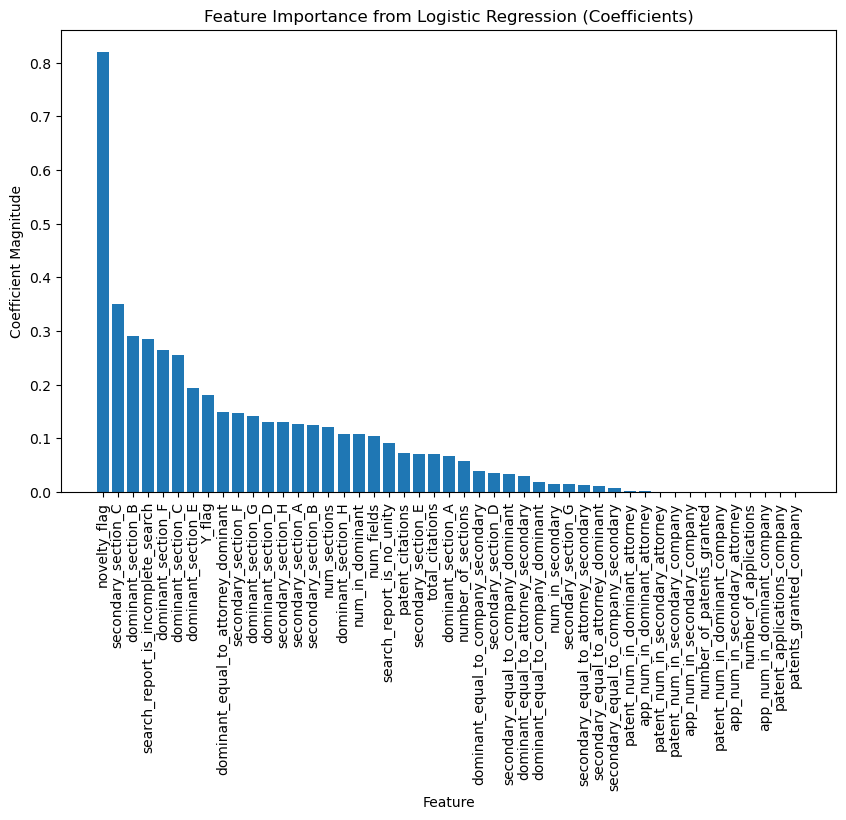

In [87]:
coef_importance = np.abs(lr.coef_[0])  # Take absolute values of coefficients
feature_names = X

# Sort and plot
sorted_idx = np.argsort(coef_importance)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(coef_importance)), coef_importance[sorted_idx], align="center")
plt.xticks(range(len(coef_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.title("Feature Importance from Logistic Regression (Coefficients)")
plt.show()

In [104]:
X = [x for x in train_data.columns if x not in  ['patent_granted','dominant_section','secondary_section','application_number']]
Y = ['patent_granted']

In [88]:
pred_Y=lr.predict(test_X)

In [89]:
print("\nClassification Report:")
print(classification_report(test_Y, pred_Y))


Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.21      0.34     33357
        True       0.43      0.91      0.58     21463

    accuracy                           0.49     54820
   macro avg       0.61      0.56      0.46     54820
weighted avg       0.65      0.49      0.43     54820



 Here we add ratios to help the logistic regression better deal with the magnitude of the coefficients

In [99]:
import numpy as np
import pandas as pd

def transform_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

   

    # 2) Create ratio_citations = patent_citations / total_citations
    if 'patent_citations' in df.columns and 'total_citations' in df.columns:
        ratio_series = df['patent_citations'] / df['total_citations'].replace(0, np.nan)
        ratio_series = ratio_series.replace([np.inf, -np.inf], np.nan).fillna(0)
        df['ratio_citations'] = ratio_series
        df.drop(columns=['patent_citations'], inplace=True)
    else:
        df['ratio_citations'] = 0



    # 1) Log transform total_citations
    if 'total_citations' in df.columns:
        df['total_citations'] = np.log1p(df['total_citations'])
    # 3) Handle (scope, entity) combinations
    combos = [
        ('dominant', 'attorney'),
        ('dominant', 'company'),
        ('secondary', 'attorney'),
        ('secondary', 'company')
    ]

    for scope, entity in combos:
        app_col = f"app_num_in_{scope}_{entity}"
        pat_col = f"patent_num_in_{scope}_{entity}"
        ratio_col = f"ratio_{scope}_{entity}"
        log_app_col = f"log_{app_col}"

        if app_col not in df.columns:
            df[app_col] = 0
        if pat_col not in df.columns:
            df[pat_col] = 0

        ratio_series = df[pat_col] / df[app_col].replace(0, np.nan)
        ratio_series = ratio_series.replace([np.inf, -np.inf], np.nan).fillna(0)
        df[ratio_col] = ratio_series

        df[log_app_col] = np.log1p(df[app_col])
        df.drop(columns=[app_col, pat_col], inplace=True)

    # 4) Additional ratio calculations
    ratio_columns = [
        ('number_of_applications', 'number_of_patents_granted', 'ratio_applications_granted'),
        ('patent_applications_company', 'patents_granted_company', 'ratio_company_granted')
    ]

    for app_col, pat_col, ratio_col in ratio_columns:
        if app_col in df.columns and pat_col in df.columns:
            ratio_series = df[pat_col] / df[app_col].replace(0, np.nan)
            ratio_series = ratio_series.replace([np.inf, -np.inf], np.nan).fillna(0)
            df[ratio_col] = ratio_series
            df[f'log_{app_col}'] = np.log1p(df[app_col])
            df.drop(columns=[app_col, pat_col], inplace=True)
        else:
            df[ratio_col] = 0

    return df


In [100]:
train_data_for_reg = transform_dataframe(train_data)
test_data_for_reg = transform_dataframe(test_data)

In [103]:
X = [x for x in train_data_for_reg.columns if x not in  [ 'app_num_in_dominant_attorney',
 'patent_num_in_dominant_company','rep_name'
 'patent_num_in_secondary_attorney','patent_num_in_dominant_attorney',
 'patent_num_in_dominant_company',
 'patent_num_in_secondary_company','patent_granted','dominant_section','secondary_section','application_number','rep_name','company_url','attorney_name']]
Y = ['patent_granted']

In [106]:
train_X = train_data_for_reg[X]
train_Y = train_data_for_reg[Y]
test_X = test_data_for_reg[X] 
test_Y = test_data_for_reg[Y]

In [111]:
from sklearn.linear_model import LogisticRegression
# Example dataset (replace with your dataset)
# Assuming df has features and a target variable
# df = pd.read_csv("your_data.csv")

# Split dataset into training and testing

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000, solver='liblinear')  # Increase max_iter if needed
lr.fit(train_X, train_Y)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, solver='liblinear')

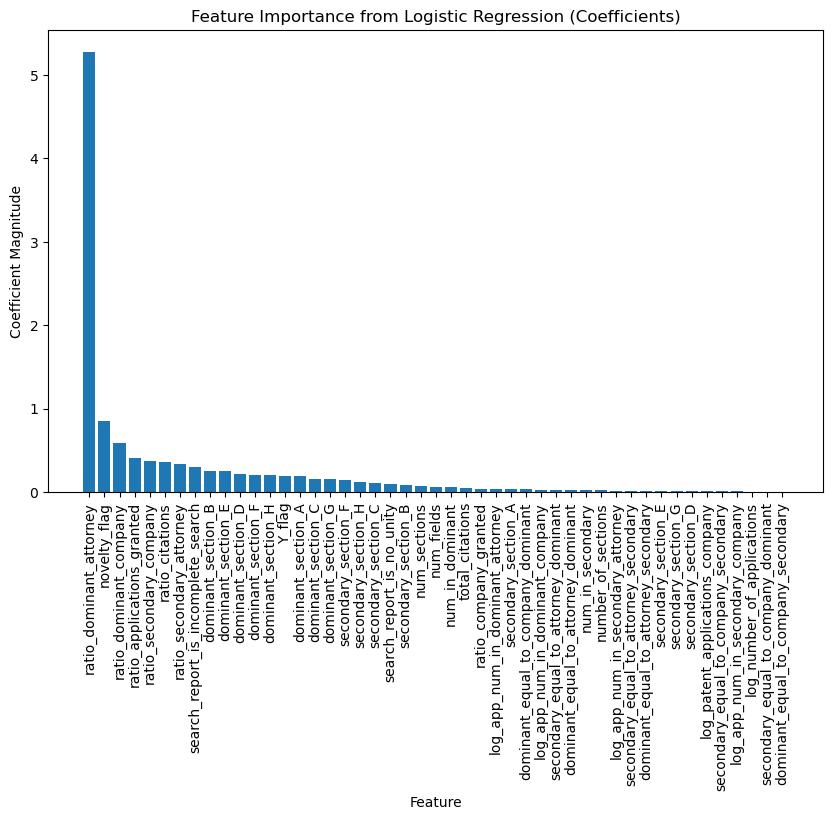

In [112]:
coef_importance = np.abs(lr.coef_[0])  # Take absolute values of coefficients
feature_names = X

# Sort and plot
sorted_idx = np.argsort(coef_importance)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(coef_importance)), coef_importance[sorted_idx], align="center")
plt.xticks(range(len(coef_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.title("Feature Importance from Logistic Regression (Coefficients)")
plt.show()

In [113]:
pred_Y=lr.predict(test_X)


In [114]:
print("\nClassification Report:")
print(classification_report(test_Y, pred_Y))


Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.38      0.51     33357
        True       0.45      0.79      0.57     21463

    accuracy                           0.54     54820
   macro avg       0.59      0.59      0.54     54820
weighted avg       0.63      0.54      0.53     54820



# Patent Representative Data Visuelisation and Feature selection (With industry data)

## Visuelisation

In [1]:
# DATA LOADING CELL
import pandas as pd
attorney_economic_sector_summary_df = pd.read_csv('./Data/attorney_economic_sector_summary.csv',sep = '\t')
attorney_economic_sector_summary_df['Secondary level three sector']  = attorney_economic_sector_summary_df['Secondary level three sector'].map(lambda x: str(int(x)) if isinstance(x, float) and x.is_integer() else x)

company_economic_sector_summary_df = pd.read_csv('company_summary_economic_sectors.csv',sep = '\t')
company_economic_sector_summary_df['secondary_level_3_sector_company'] = company_economic_sector_summary_df['secondary_level_3_sector_company'].map(lambda x: str(int(x)) if isinstance(x, float) and x.is_integer() else x)
company_economic_sector_summary_df['mode_attorney_company_sector_l3_secondary'] =  company_economic_sector_summary_df['mode_attorney_company_sector_l3_secondary'].map(lambda x: str(int(x)) if isinstance(x, float) and x.is_integer() else x)

full_industry_df = pd.read_csv('./Data/up_to_2024_full_patent_data_derived_industry.csv',sep='\t')
full_industry_df.drop(columns = ['Unnamed: 0', 'application_number', 'publication_date',
       'publication_language',  'search_report_date', 'search_report_ipc_field',
       'search_report_is_no_unity', 'search_report_is_incomplete_search',
       'search_report_is_no_search', 'num_fields', 'dominant_section',
       'secondary_section', 'num_in_dominant', 'num_in_secondary',
       'num_sections',
       'inventive_step_flag'],inplace=True)

industry_code_to_english = pd.read_csv('./Data/industry_code_to_english_mapping.csv',sep = '\t')
full_industry_df['top_l3_industry']=full_industry_df['top_l3_industry'].map(lambda x: str(int(x)) if isinstance(x, float) and x.is_integer() else x)
# Convert 'filing_date' to datetime format
industry_mapping = dict(zip(industry_code_to_english['ISIC Rev.4'], 
                            industry_code_to_english['Economic Activity']))

### Sector and Industry visuelisation

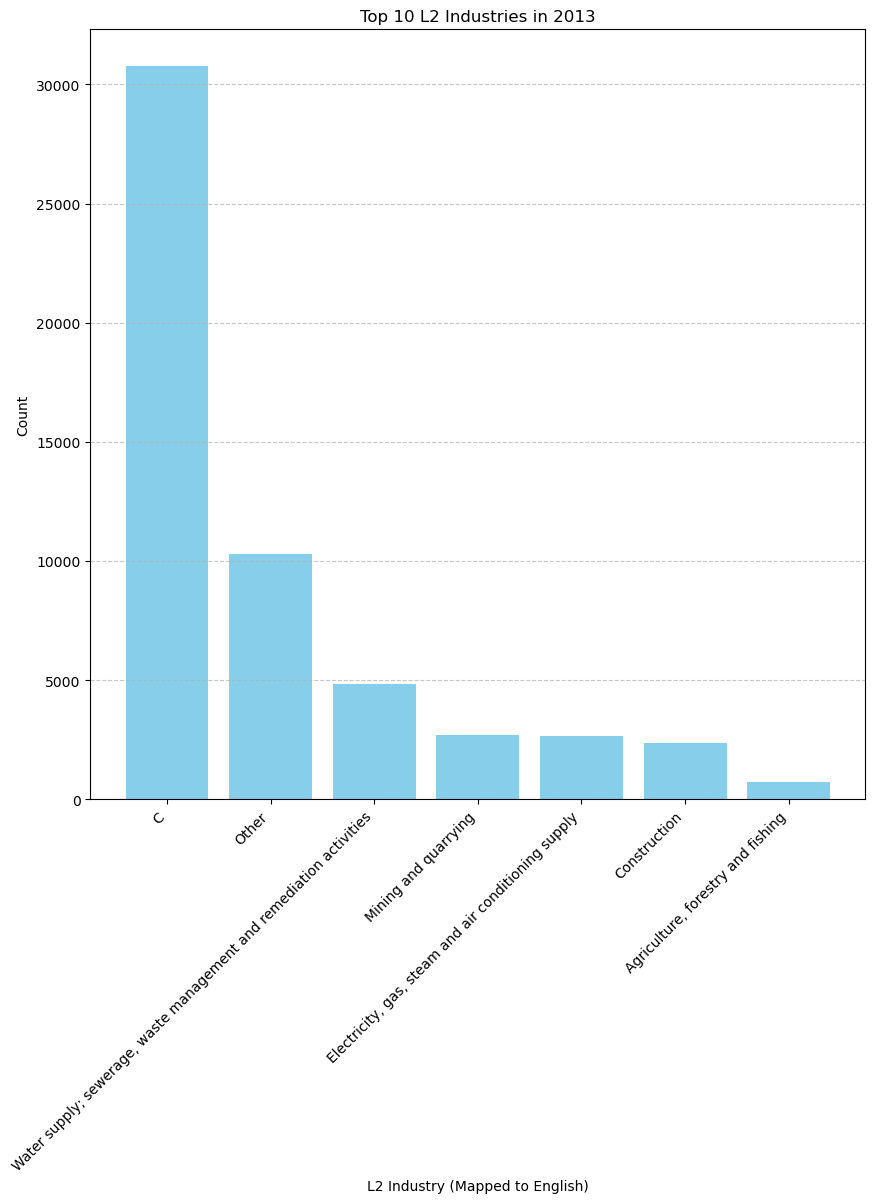

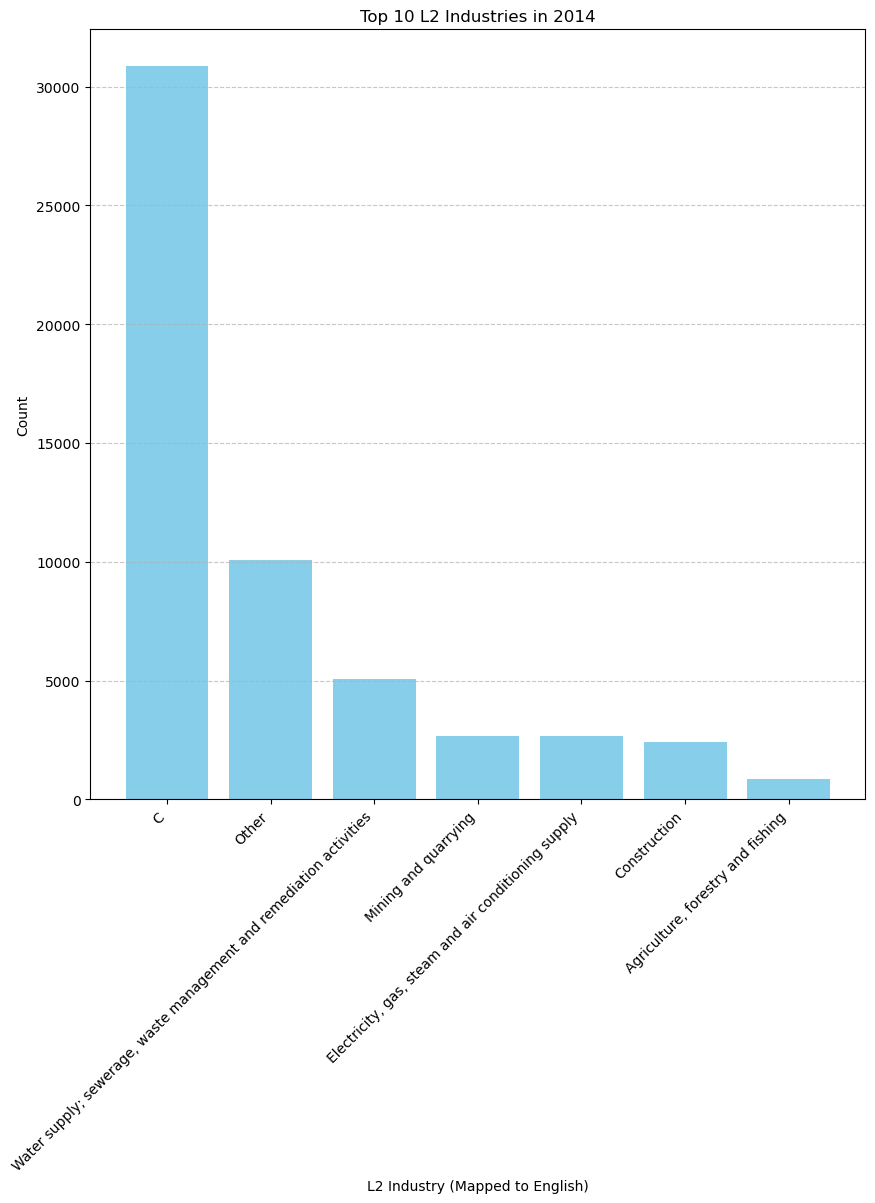

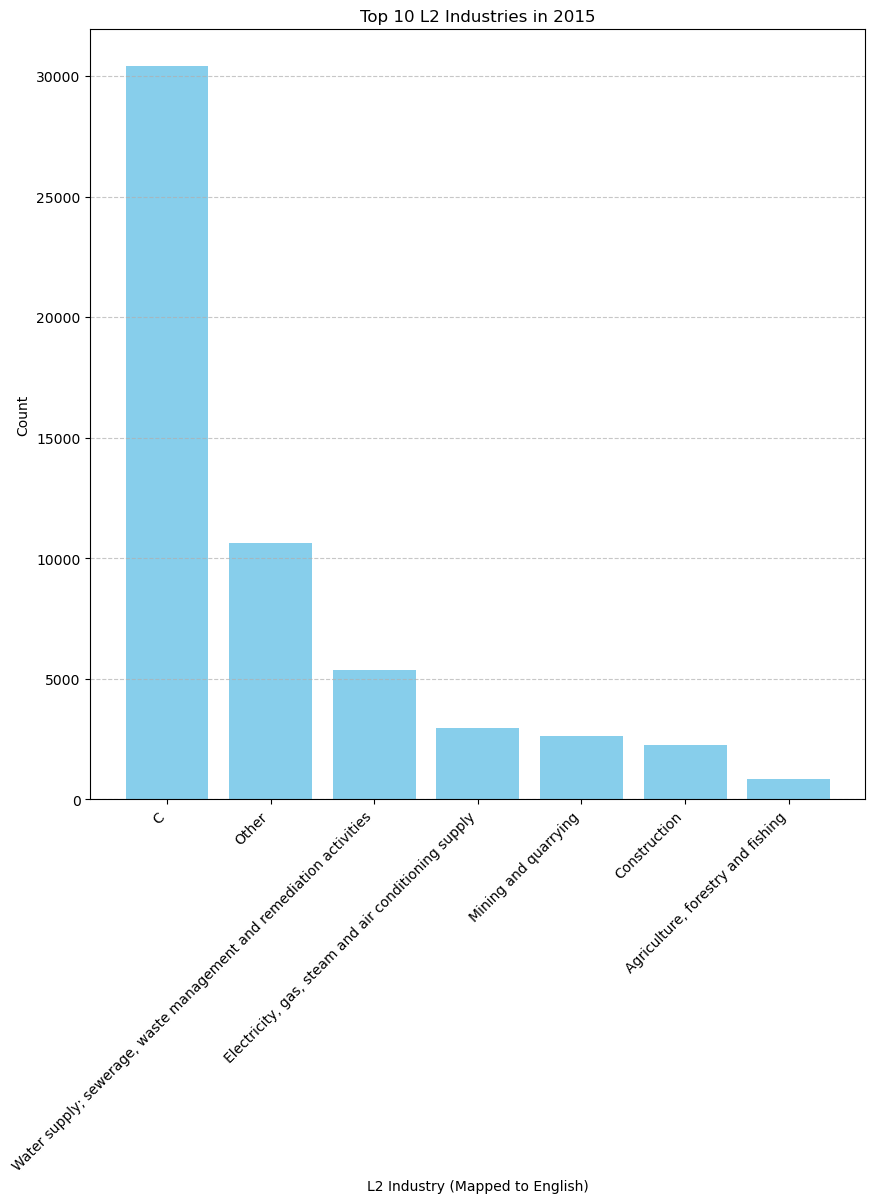

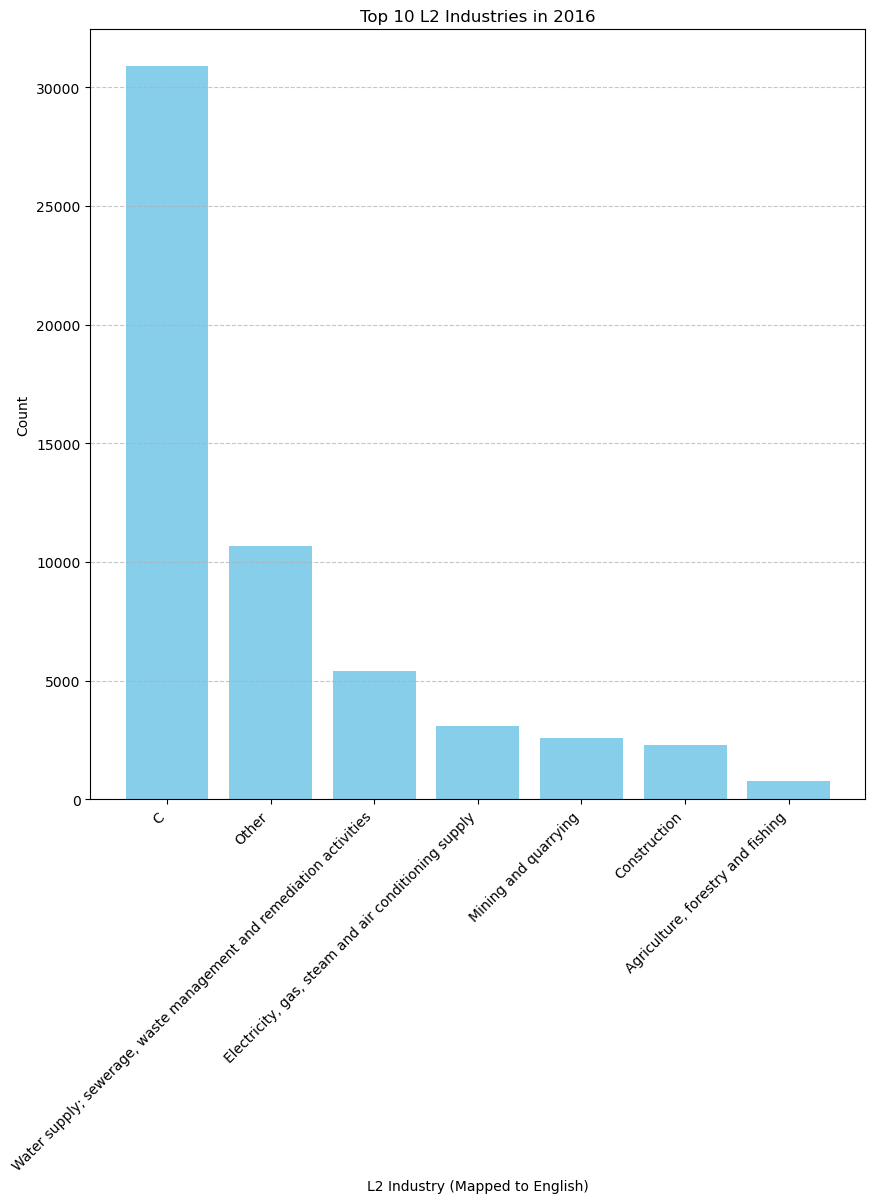

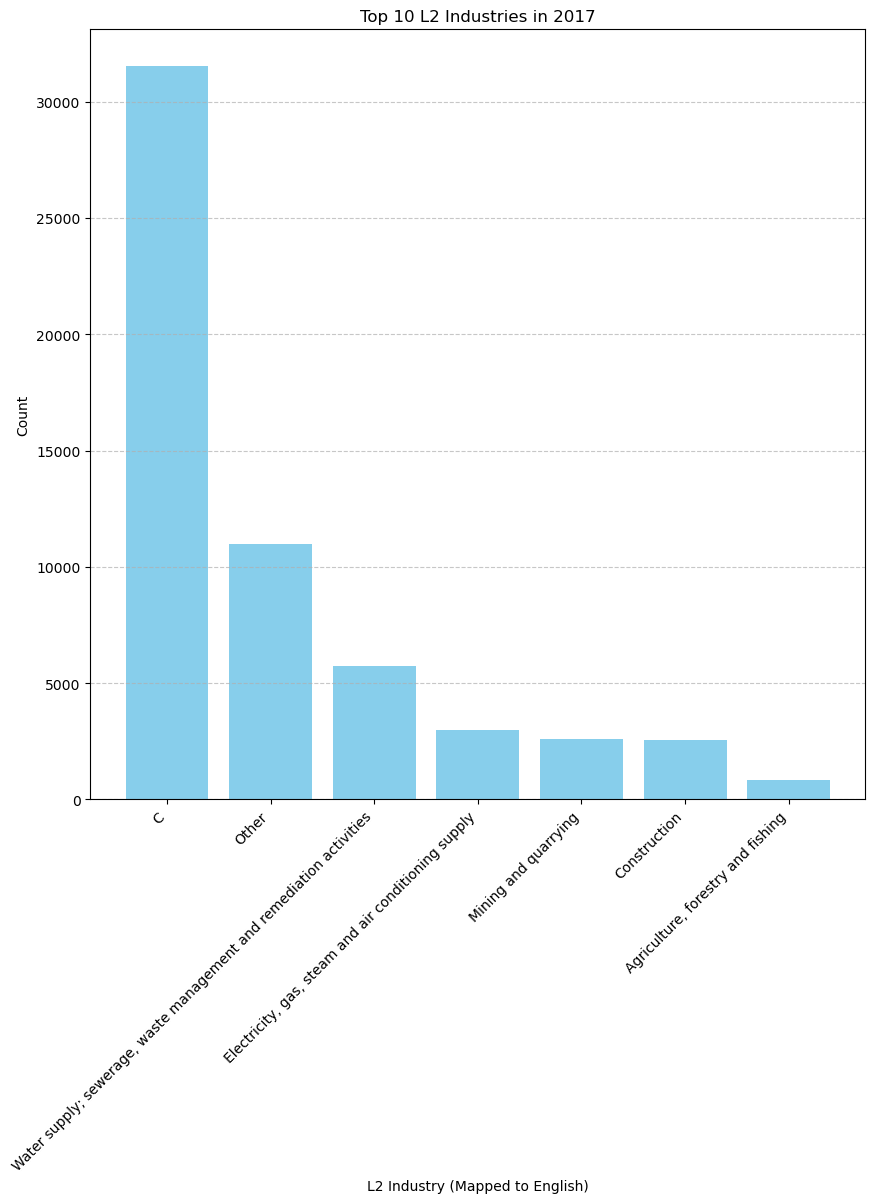

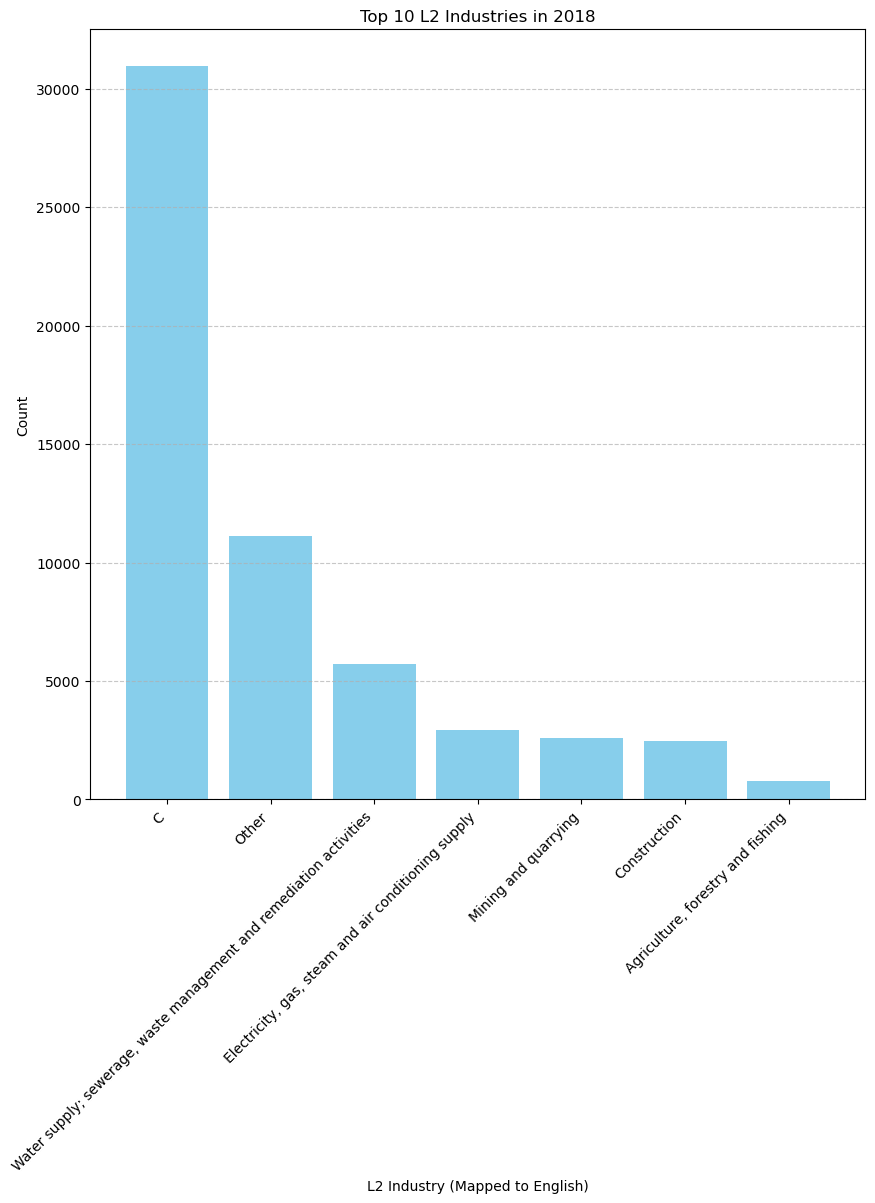

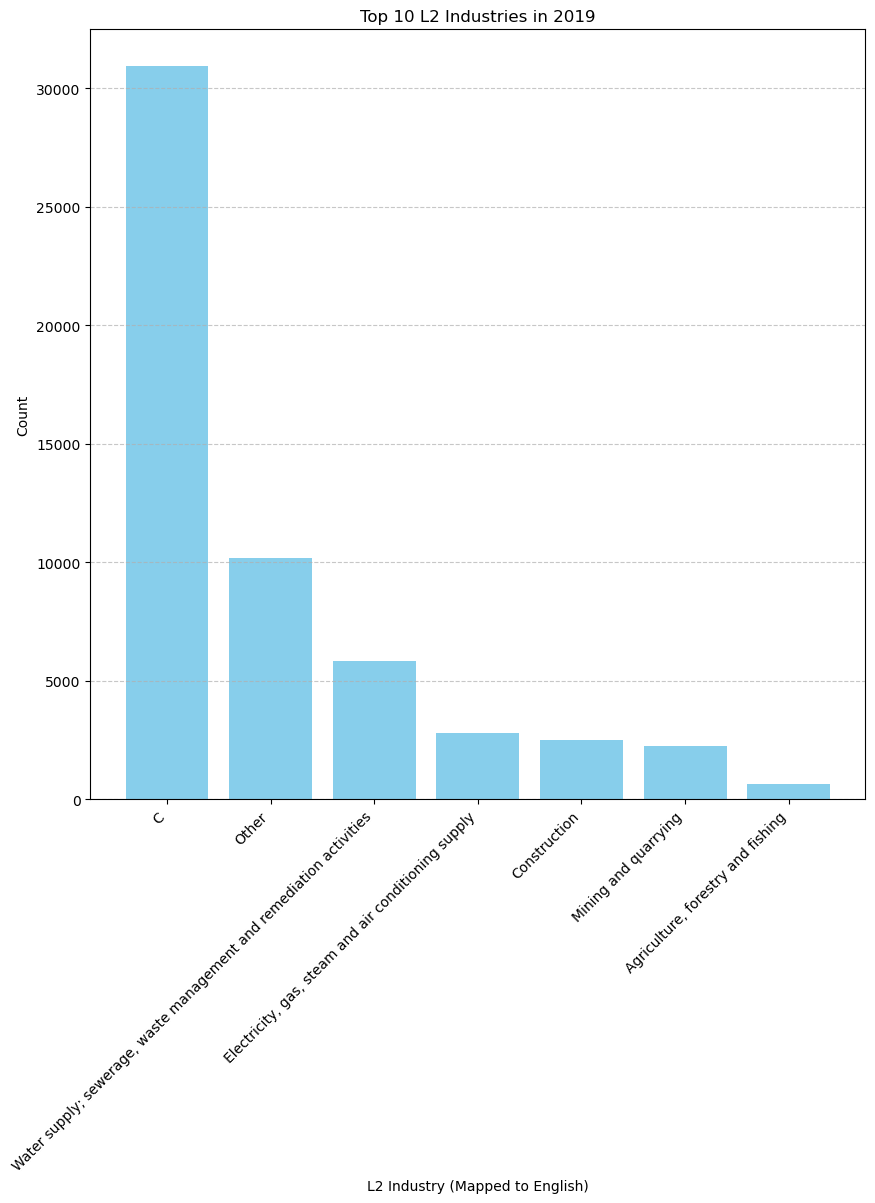

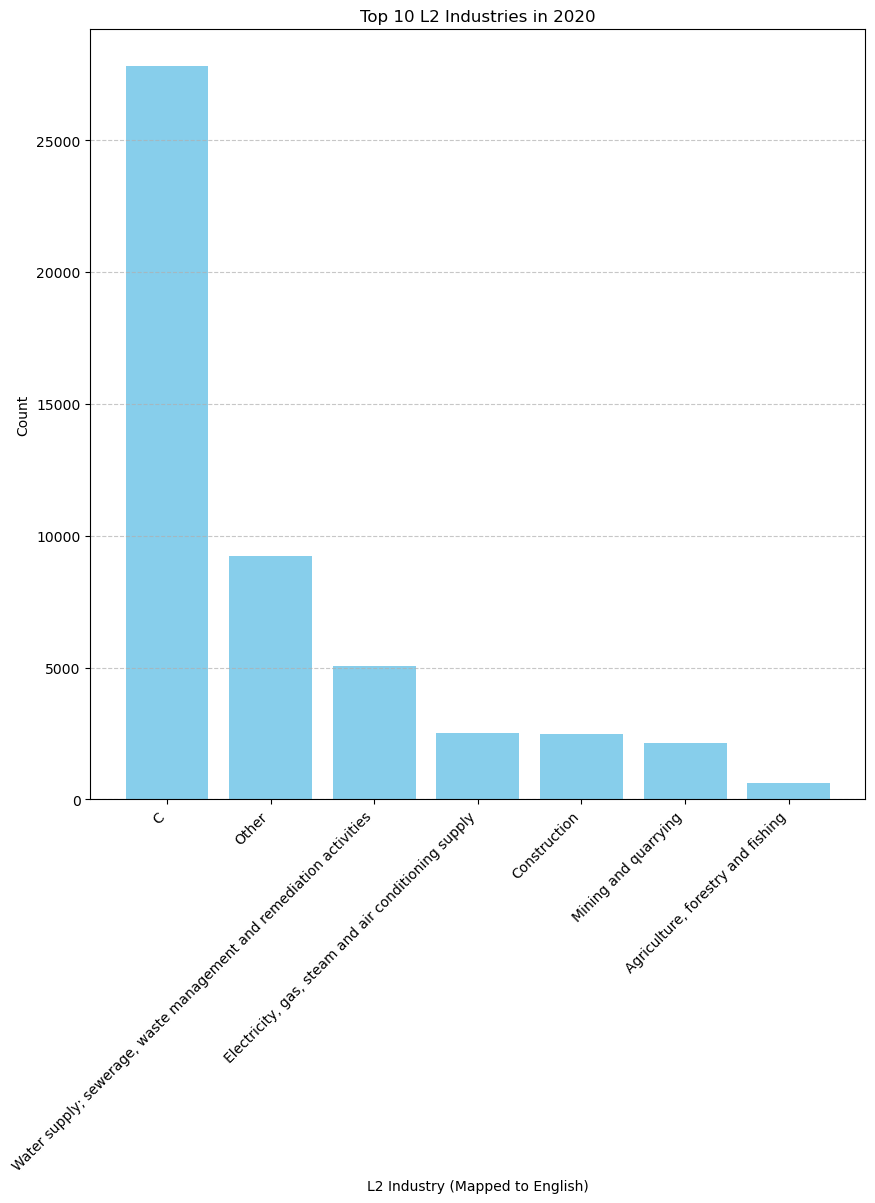

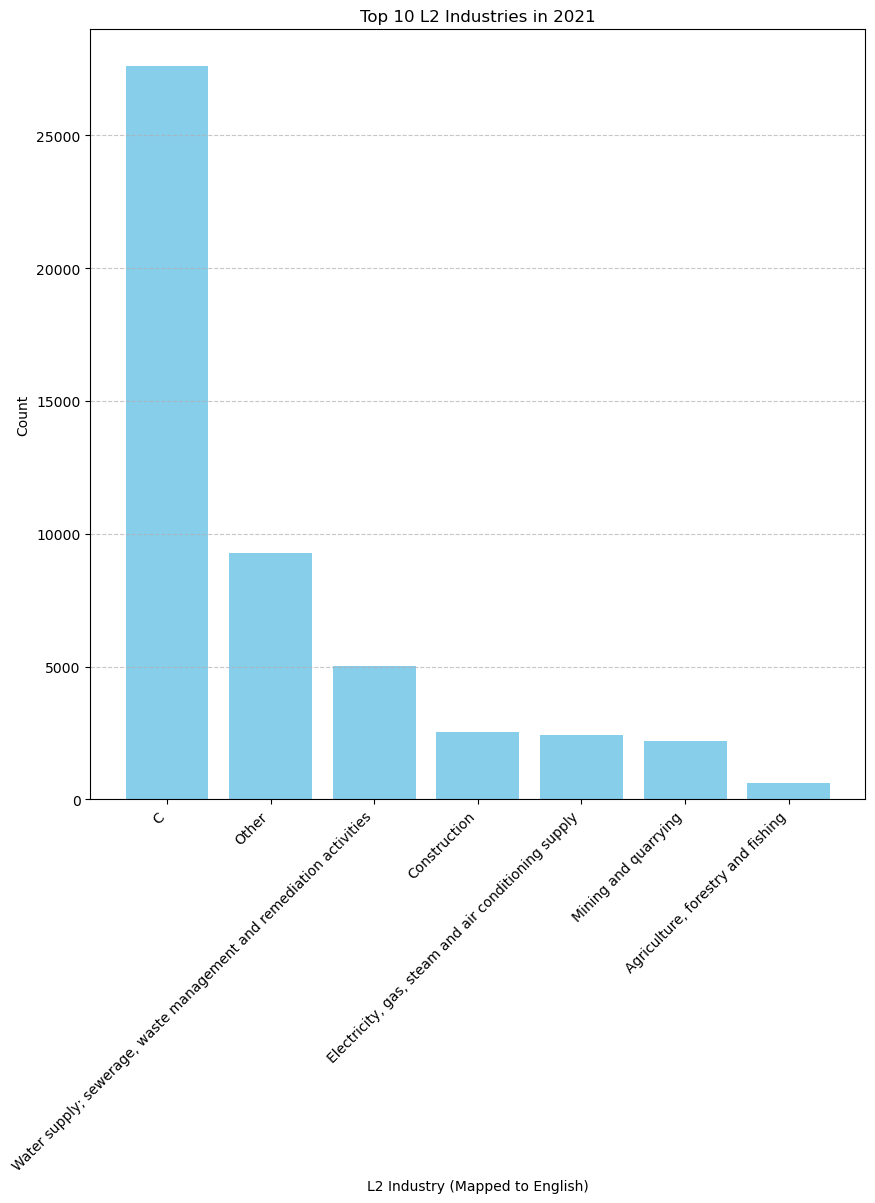

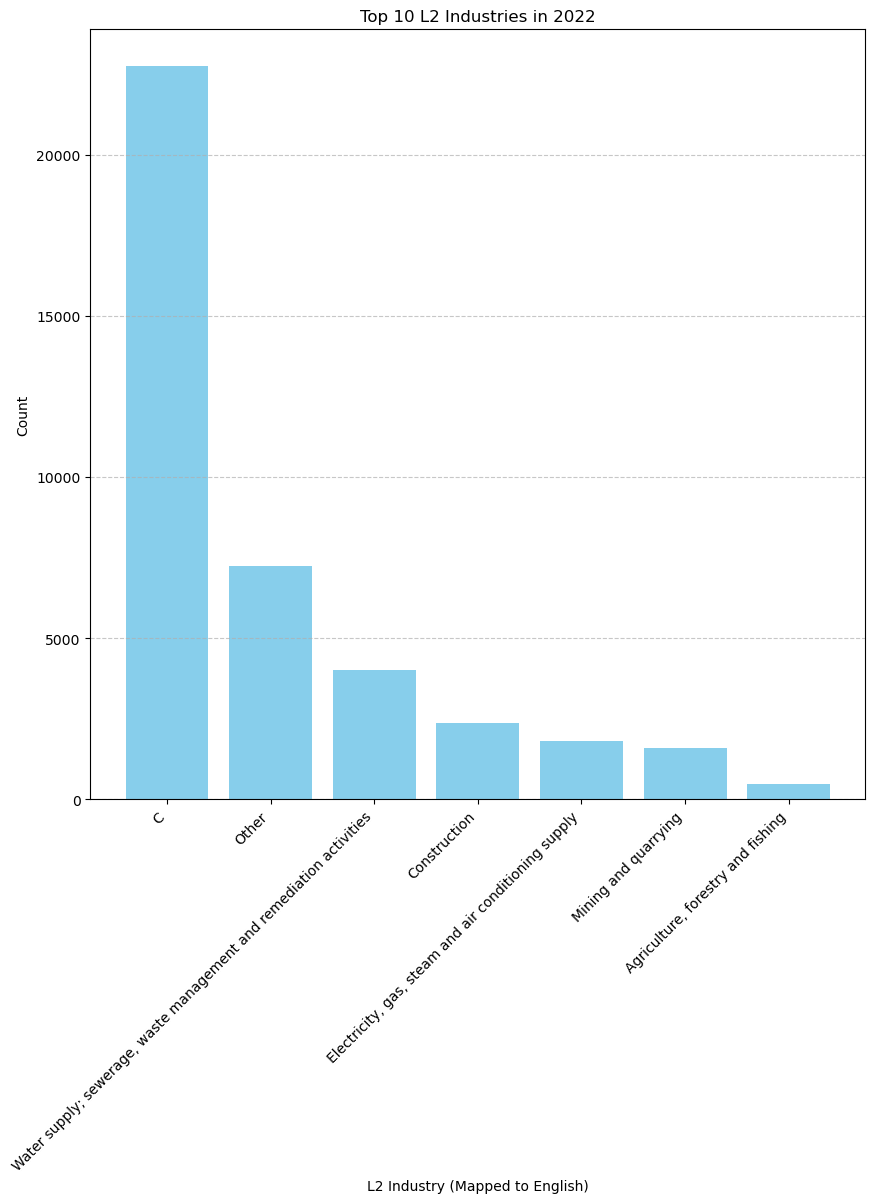

In [82]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'filing_date' to datetime format
full_industry_df['filing_date'] = pd.to_datetime(full_industry_df['filing_date'].astype(str), format='%Y%m%d')

# Extract year from 'filing_date'
full_industry_df['year'] = full_industry_df['filing_date'].dt.year
full_industry_df = full_industry_df[full_industry_df['year'] >= 2013]

# Get unique years to generate visualizations
unique_years = sorted(full_industry_df['year'].unique())[:10]  # Limit to first 10 years from 201

# Generate plots
for year in unique_years:
    plt.figure(figsize=(10, 10))
    
    # Filter data for the specific year
    year_data = full_industry_df[full_industry_df['year'] == year]
    industry_labels = [industry_mapping.get(code, code) for code in top_l2.index]
    
    # Get the top 10 most common L2 industries
    top_l2 = year_data['top_l2_industry'].value_counts().nlargest(10)
    industry_labels = [industry_mapping.get(code, code) for code in top_l2.index]

    
    # Plot the data
    plt.bar(industry_labels, top_l2.values, color='skyblue')
    plt.title(f'Top 10 L2 Industries in {year}')
    plt.xlabel('L2 Industry (Mapped to English)')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Show plot
    plt.show()


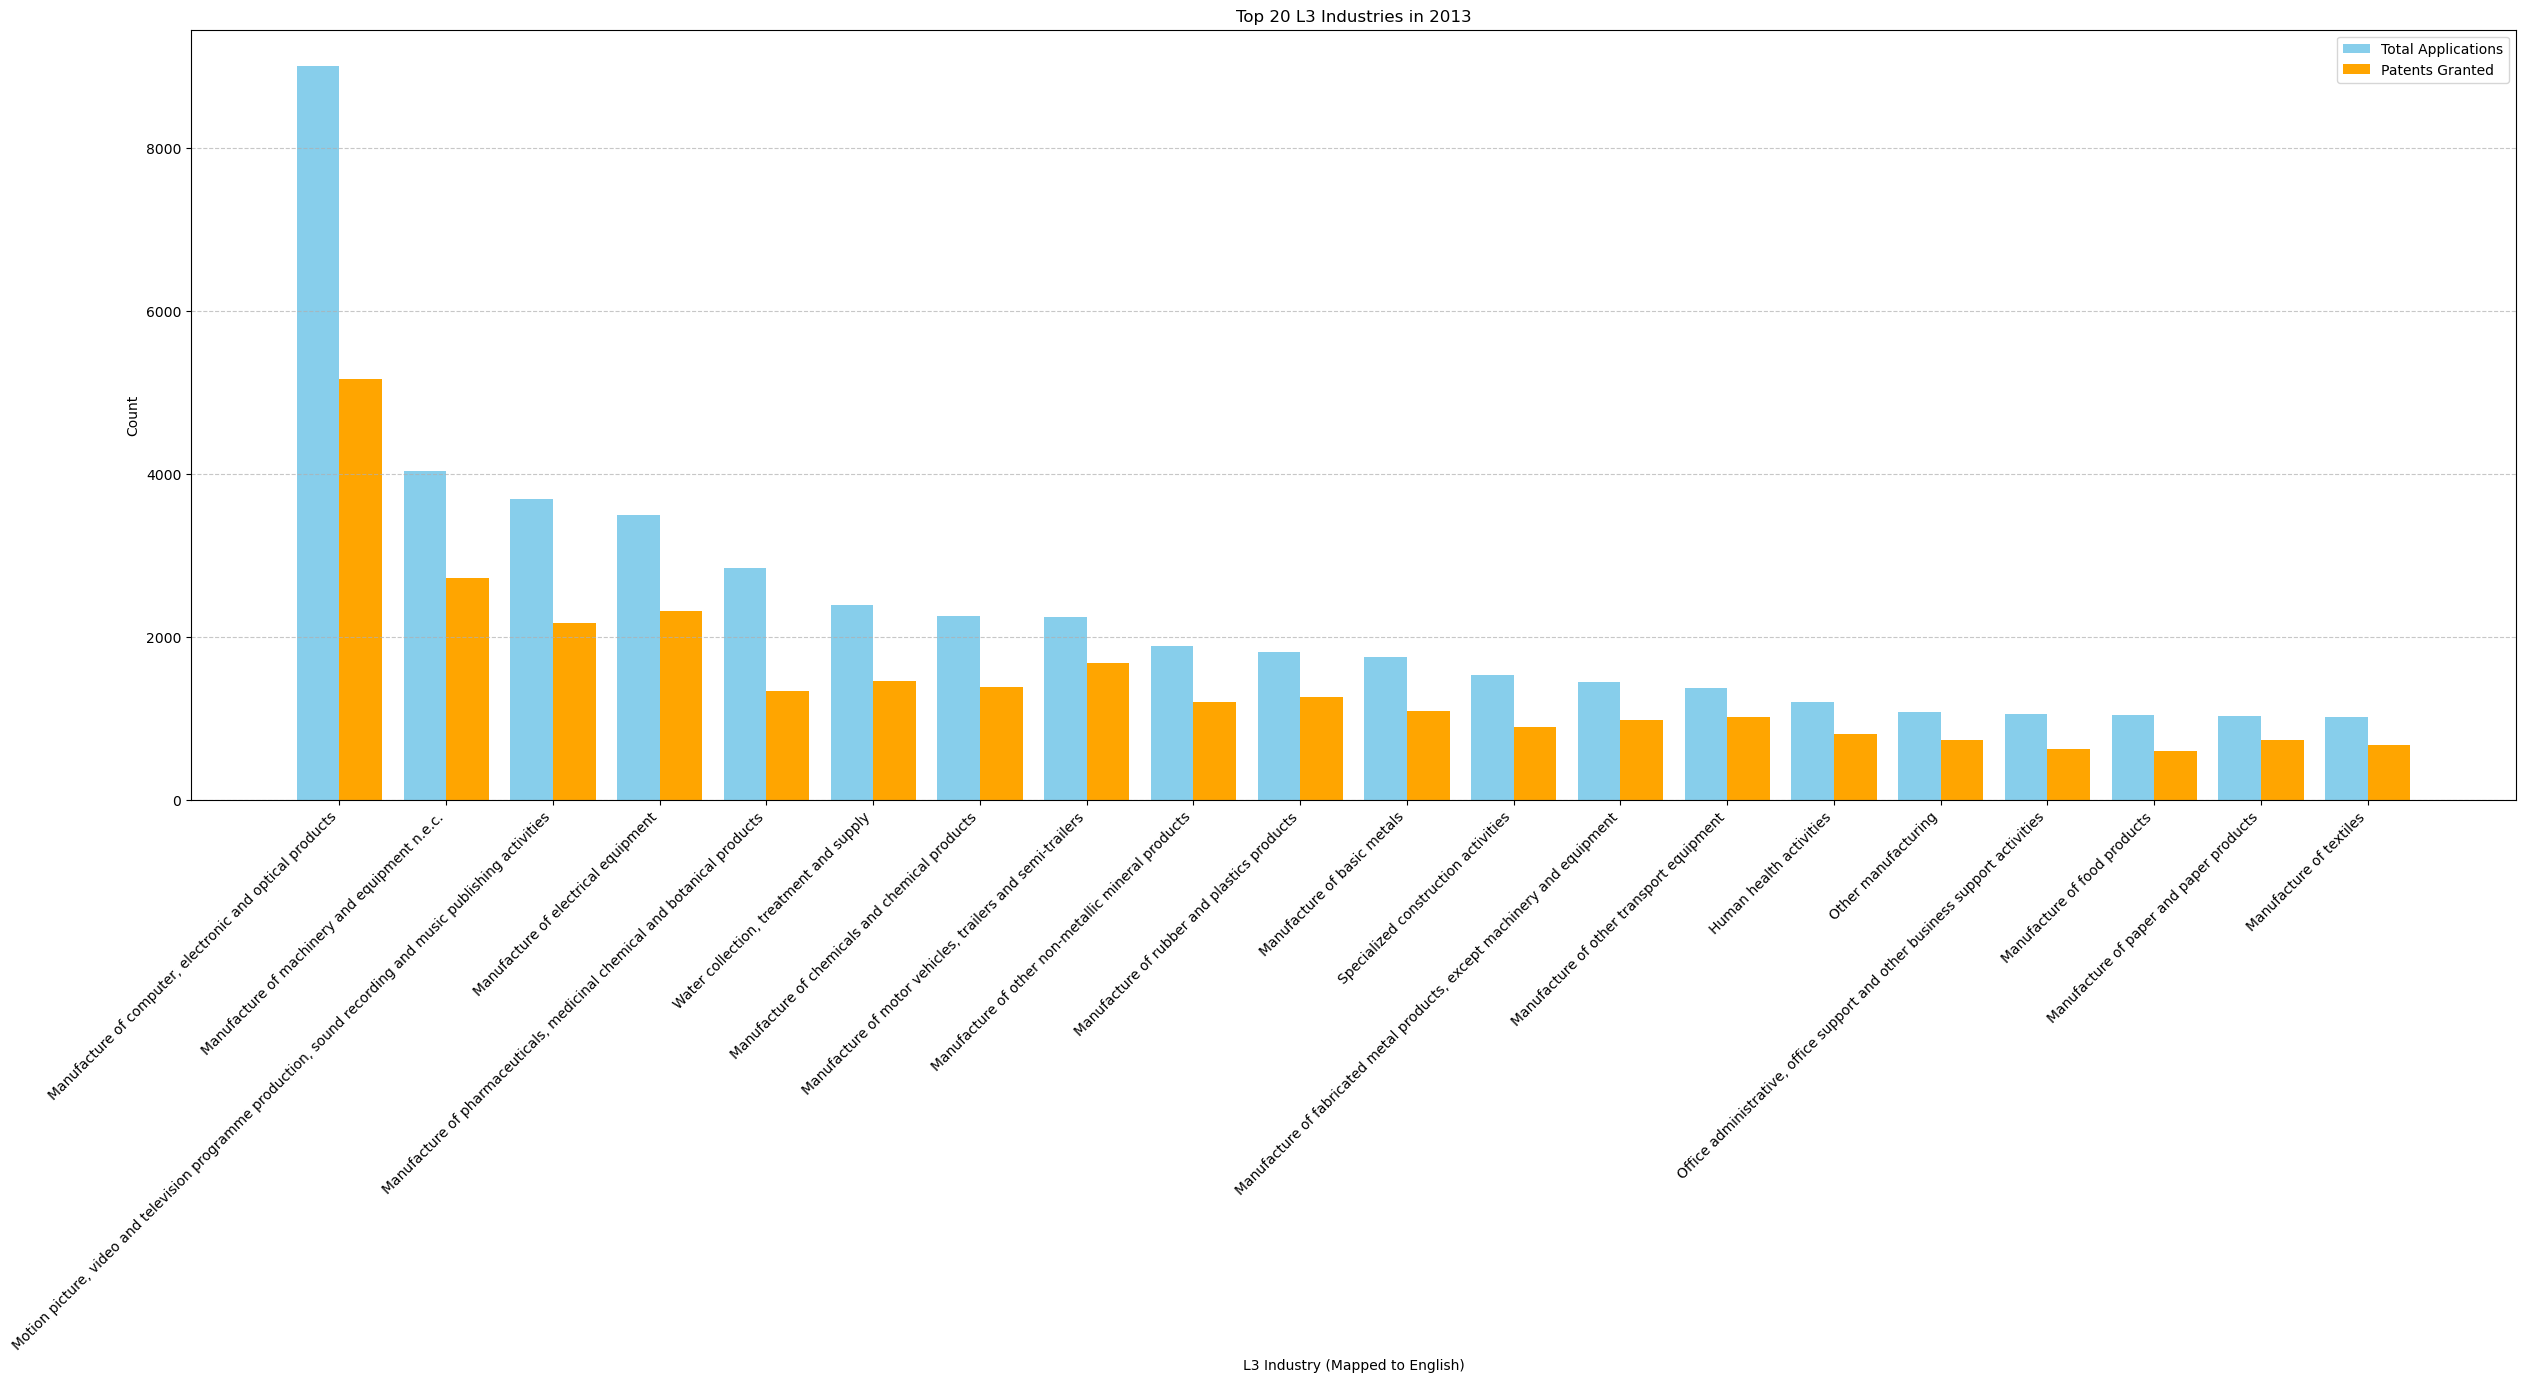

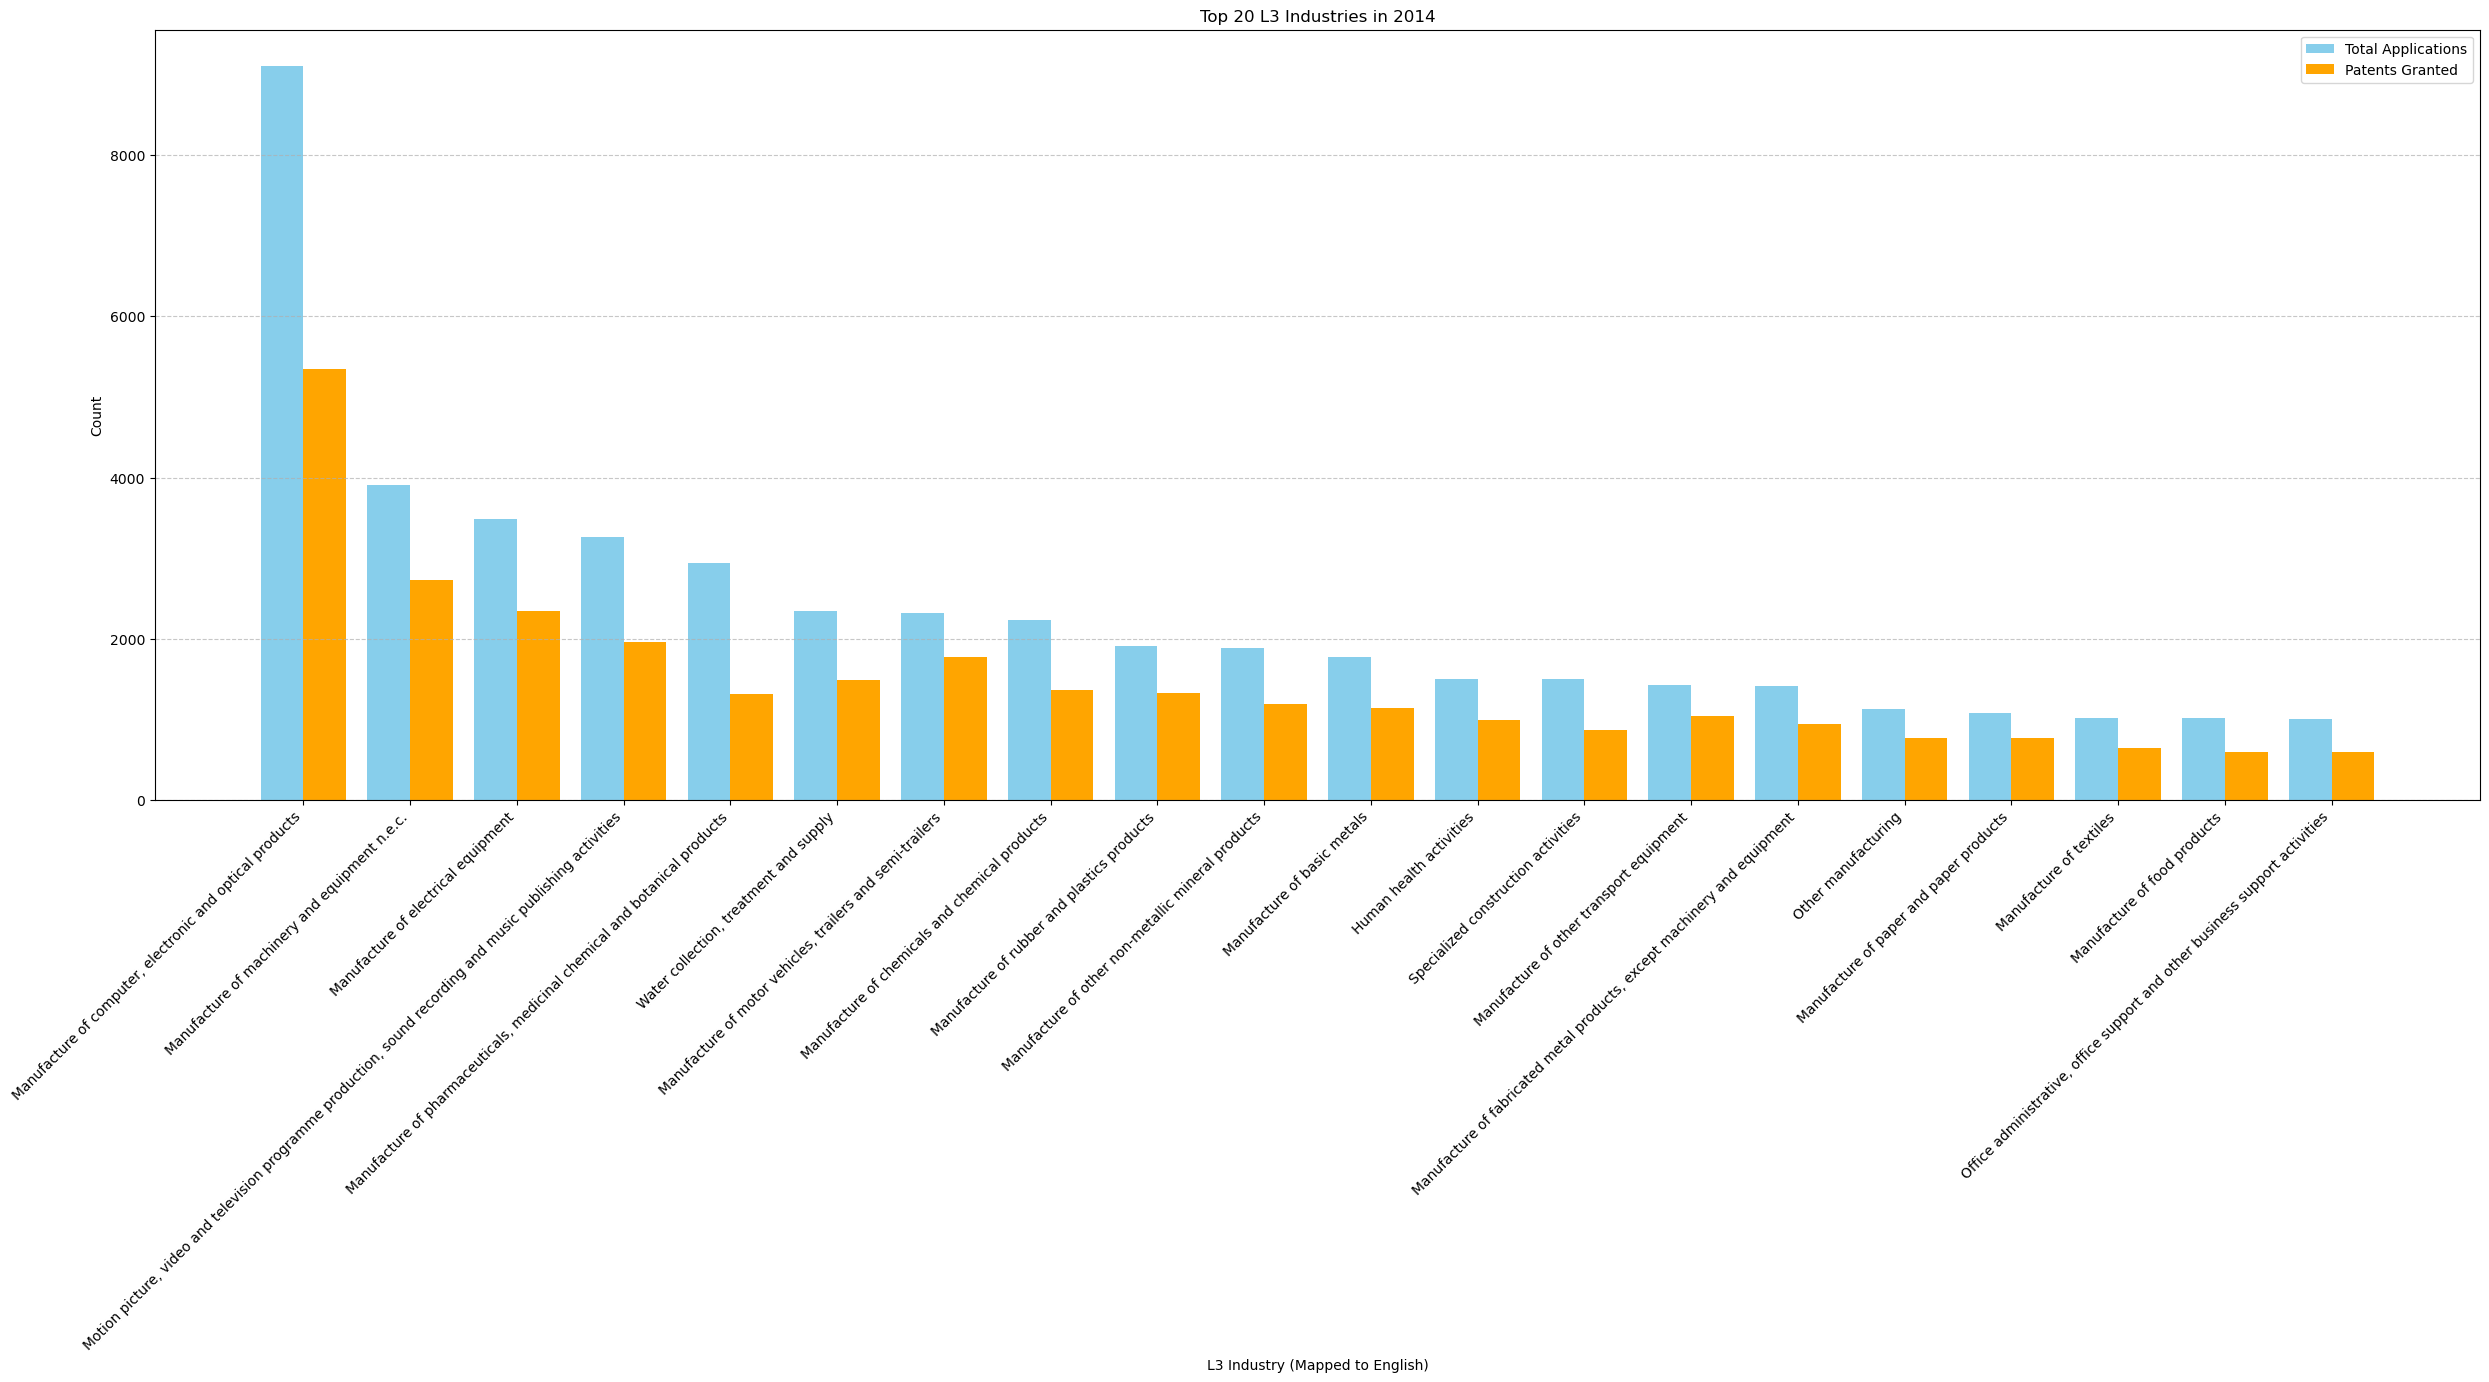

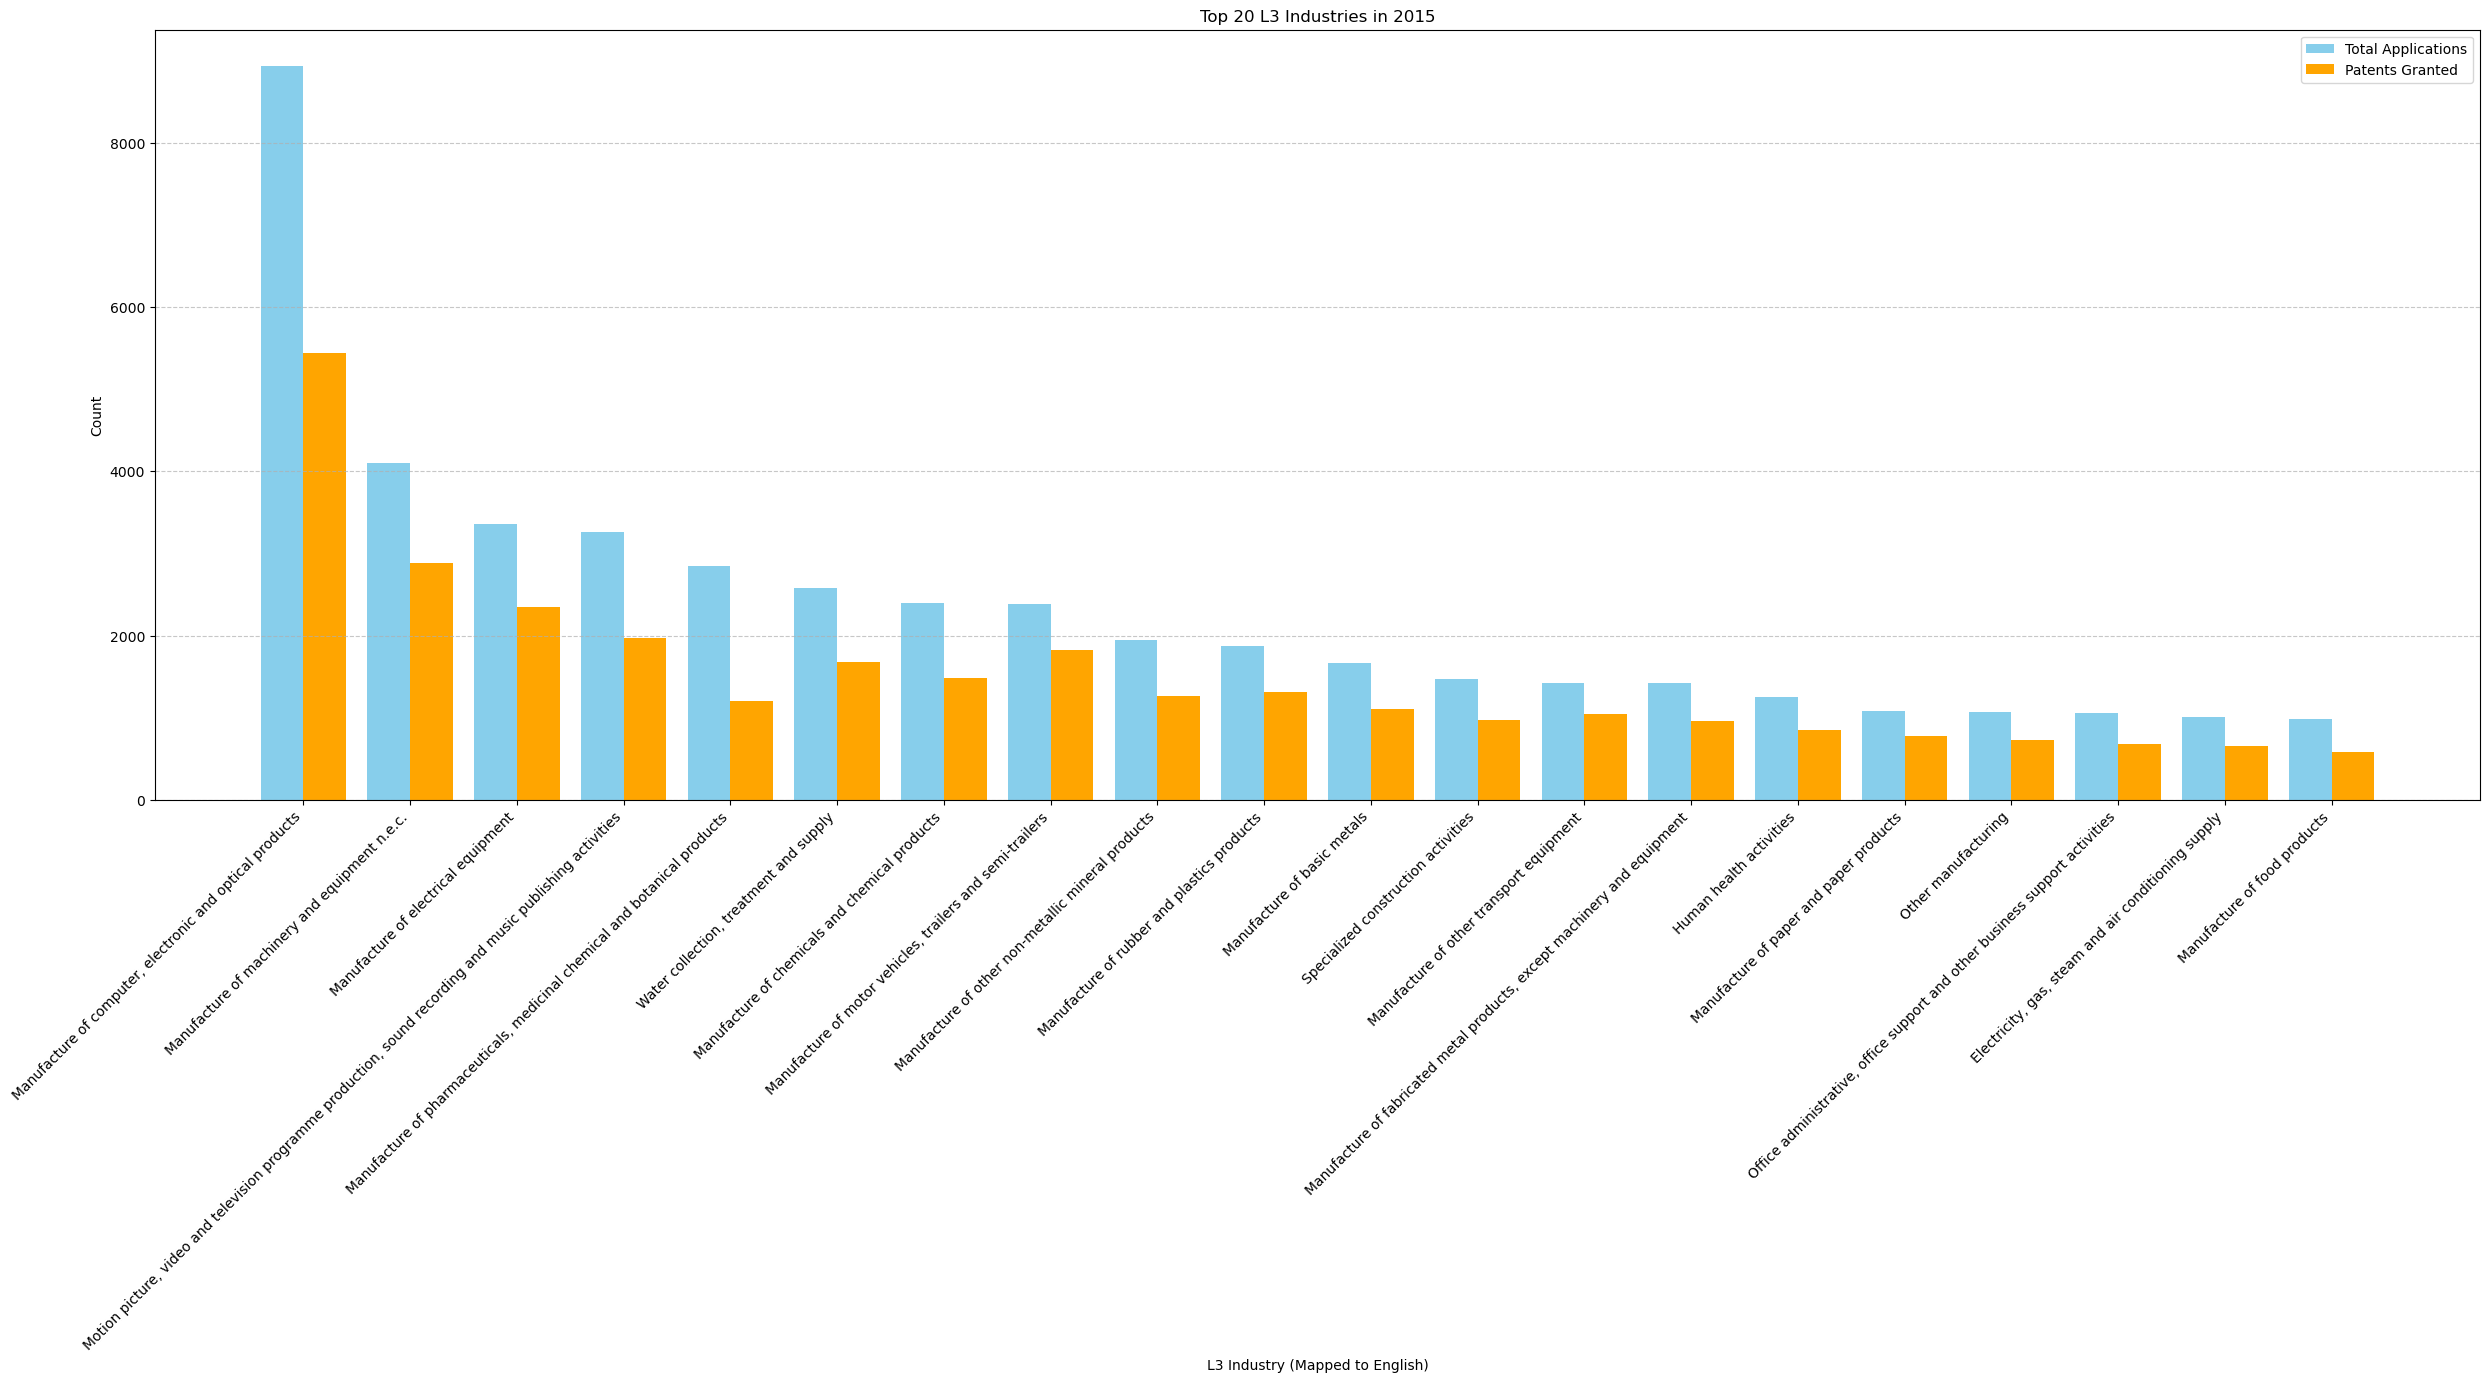

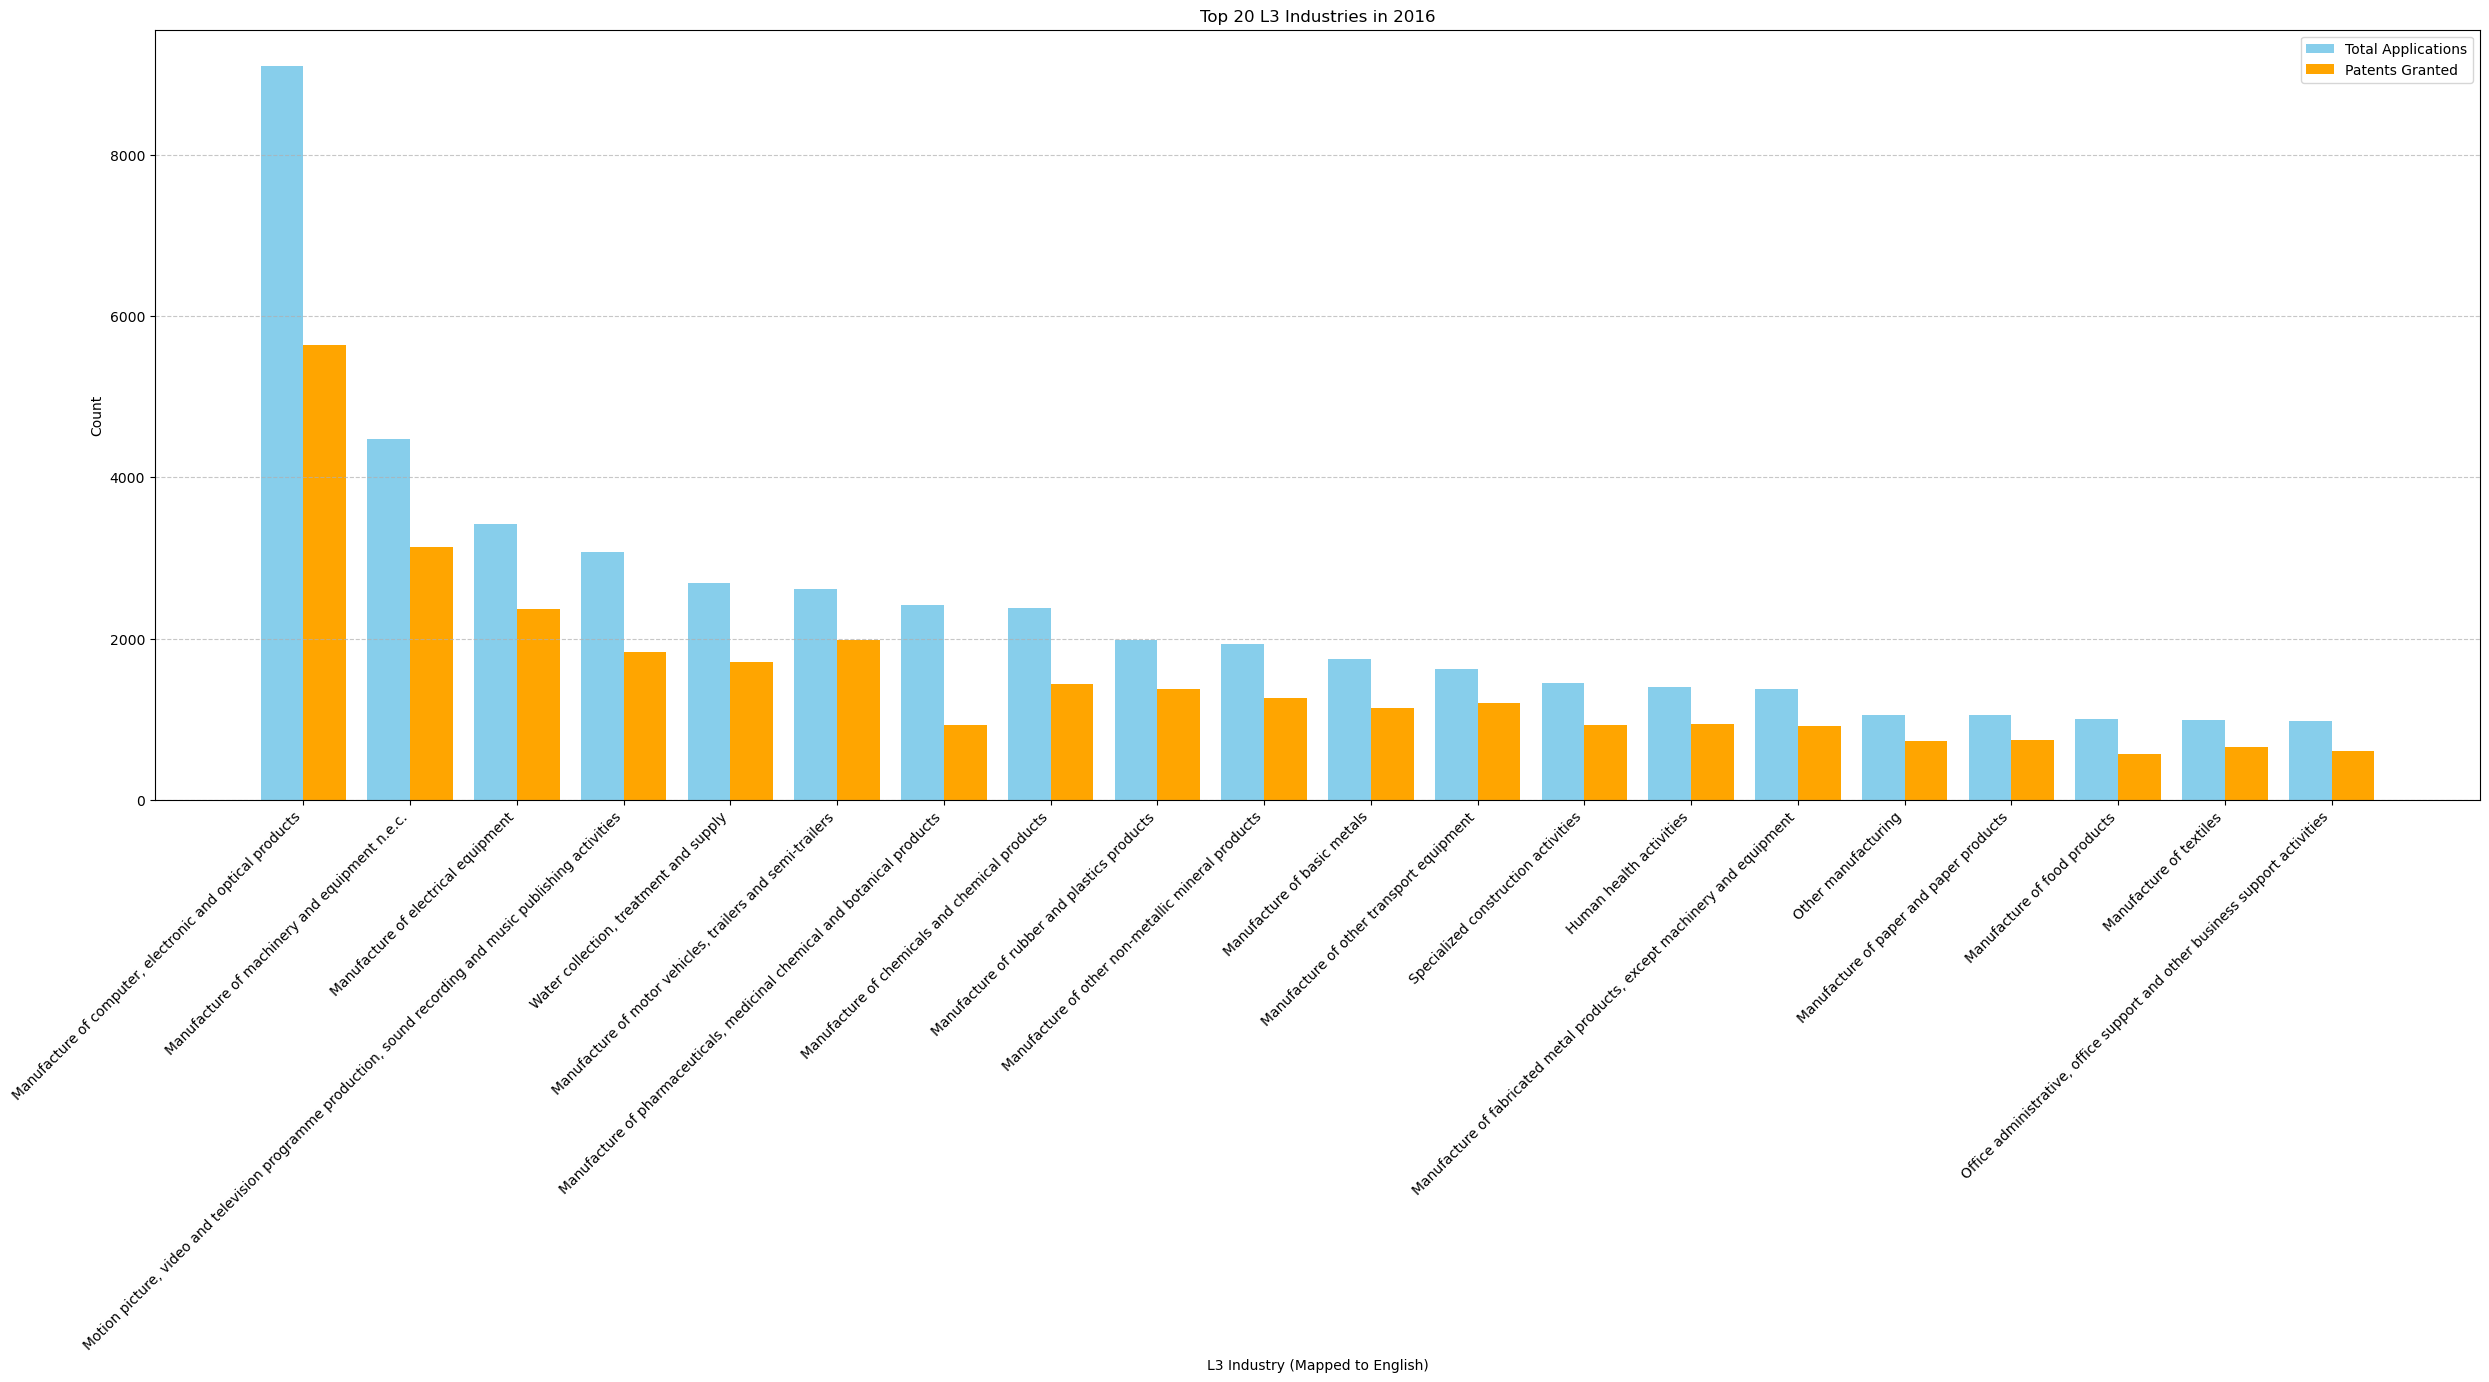

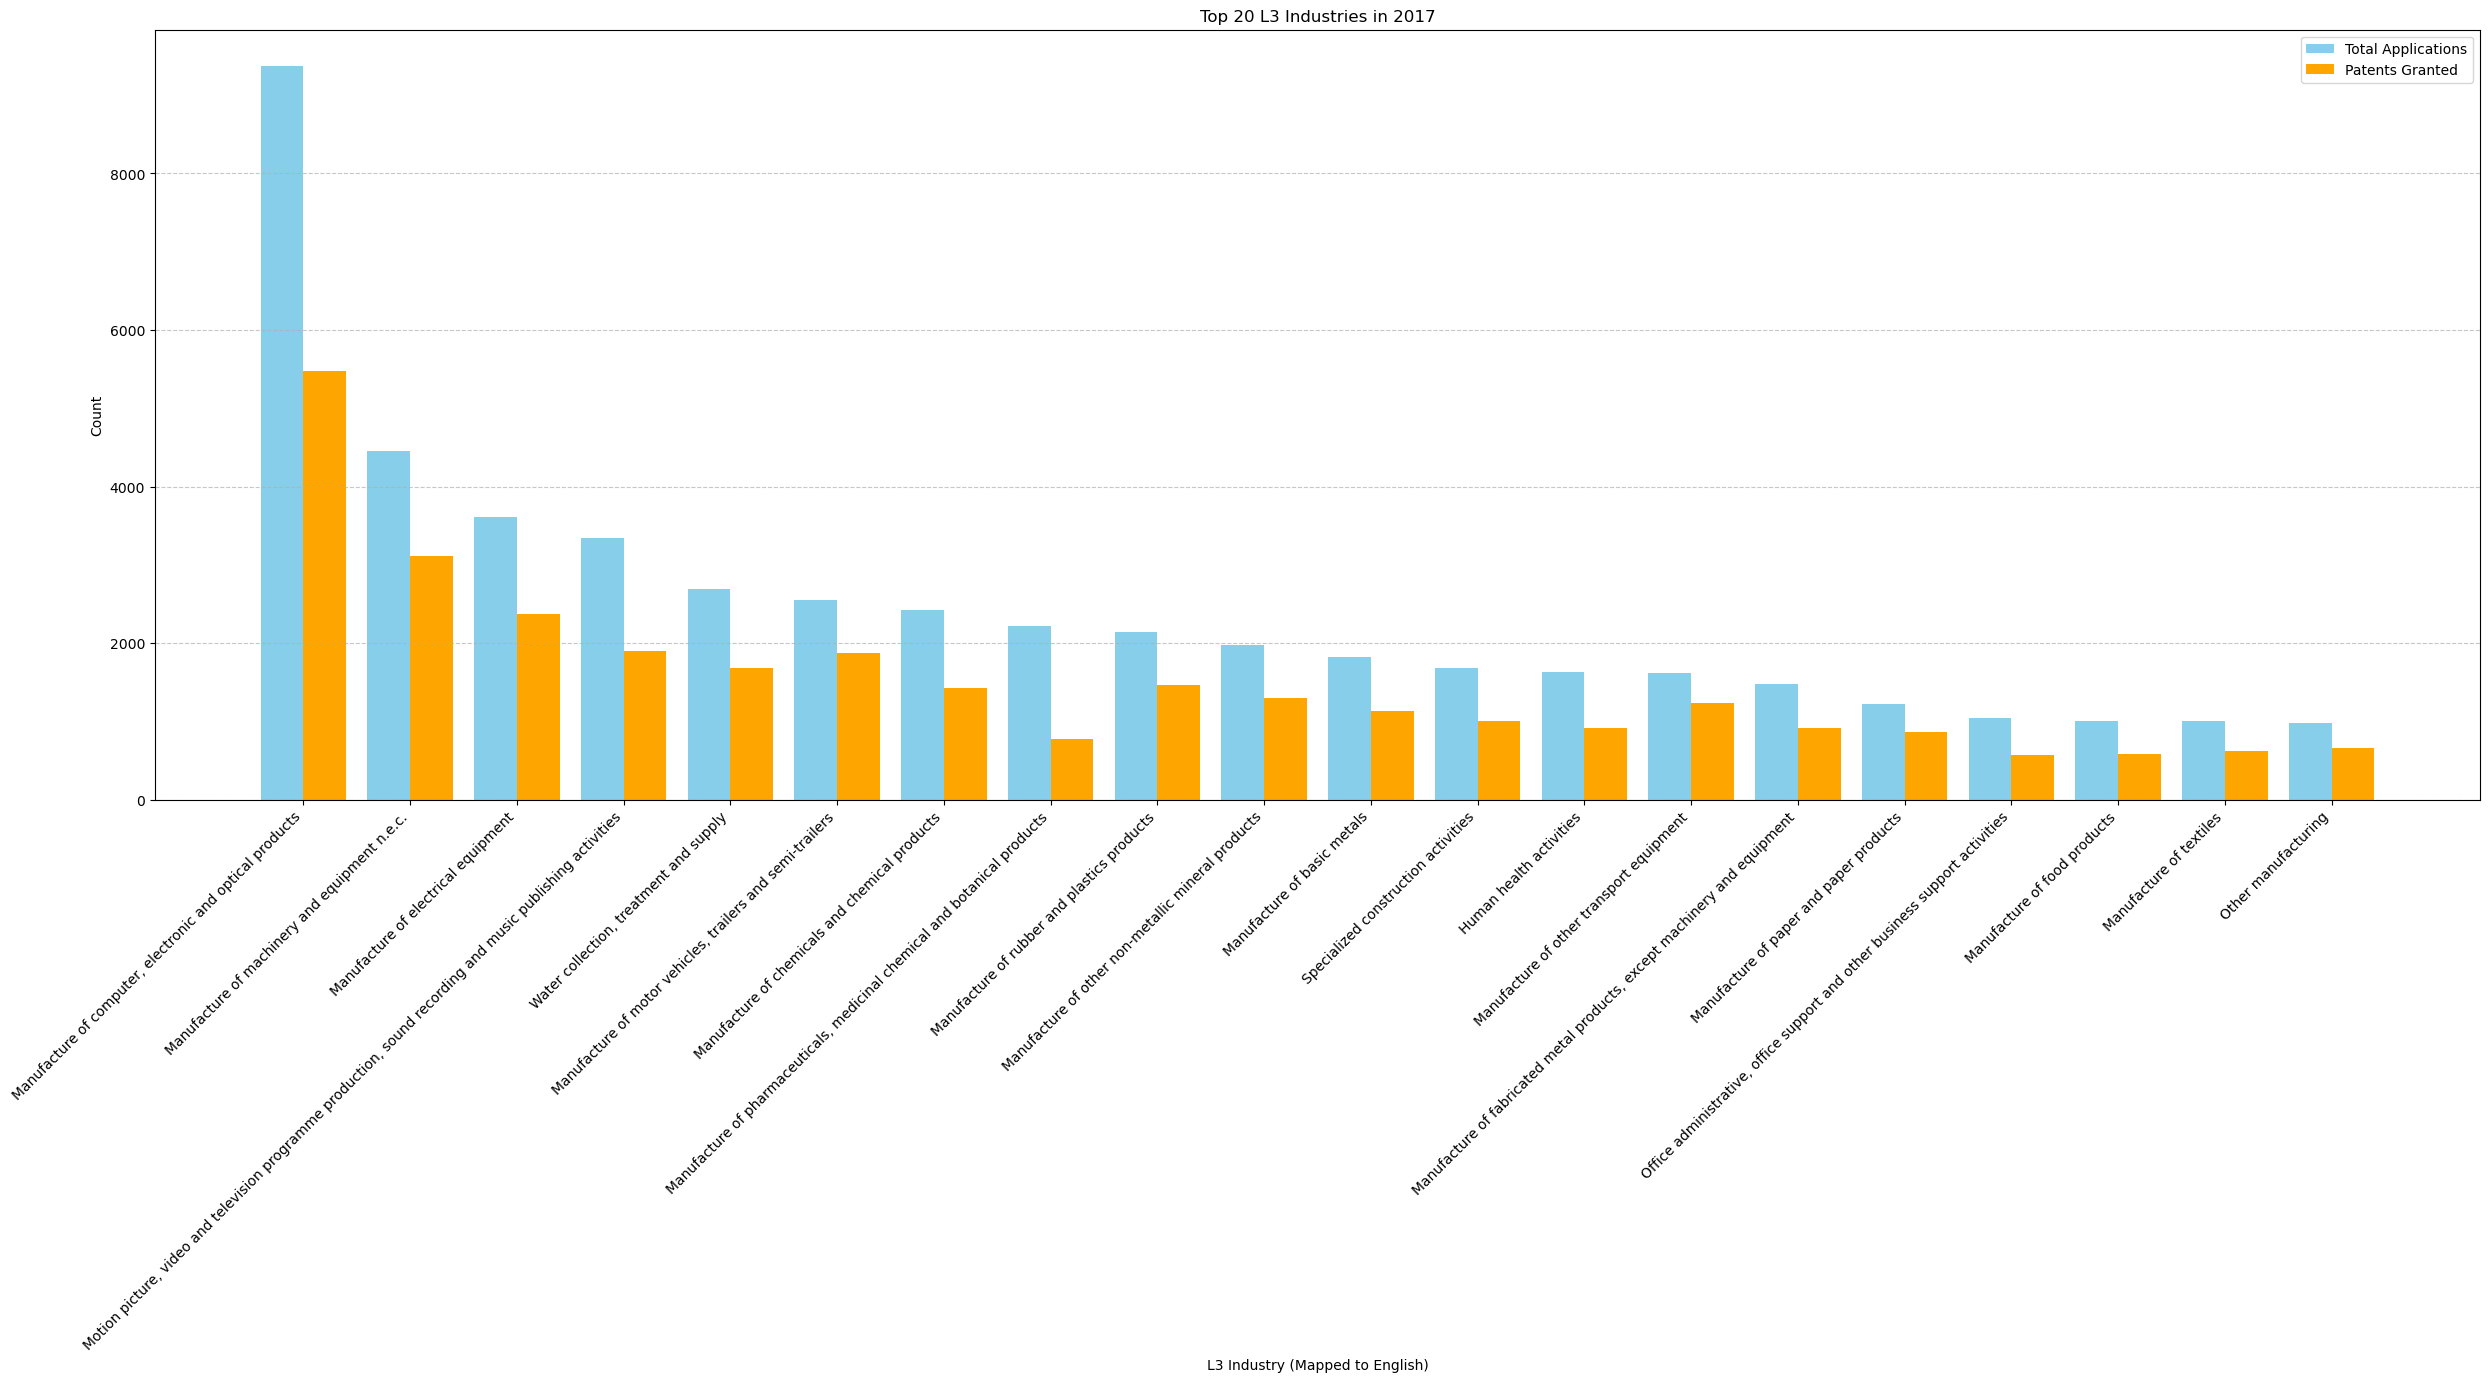

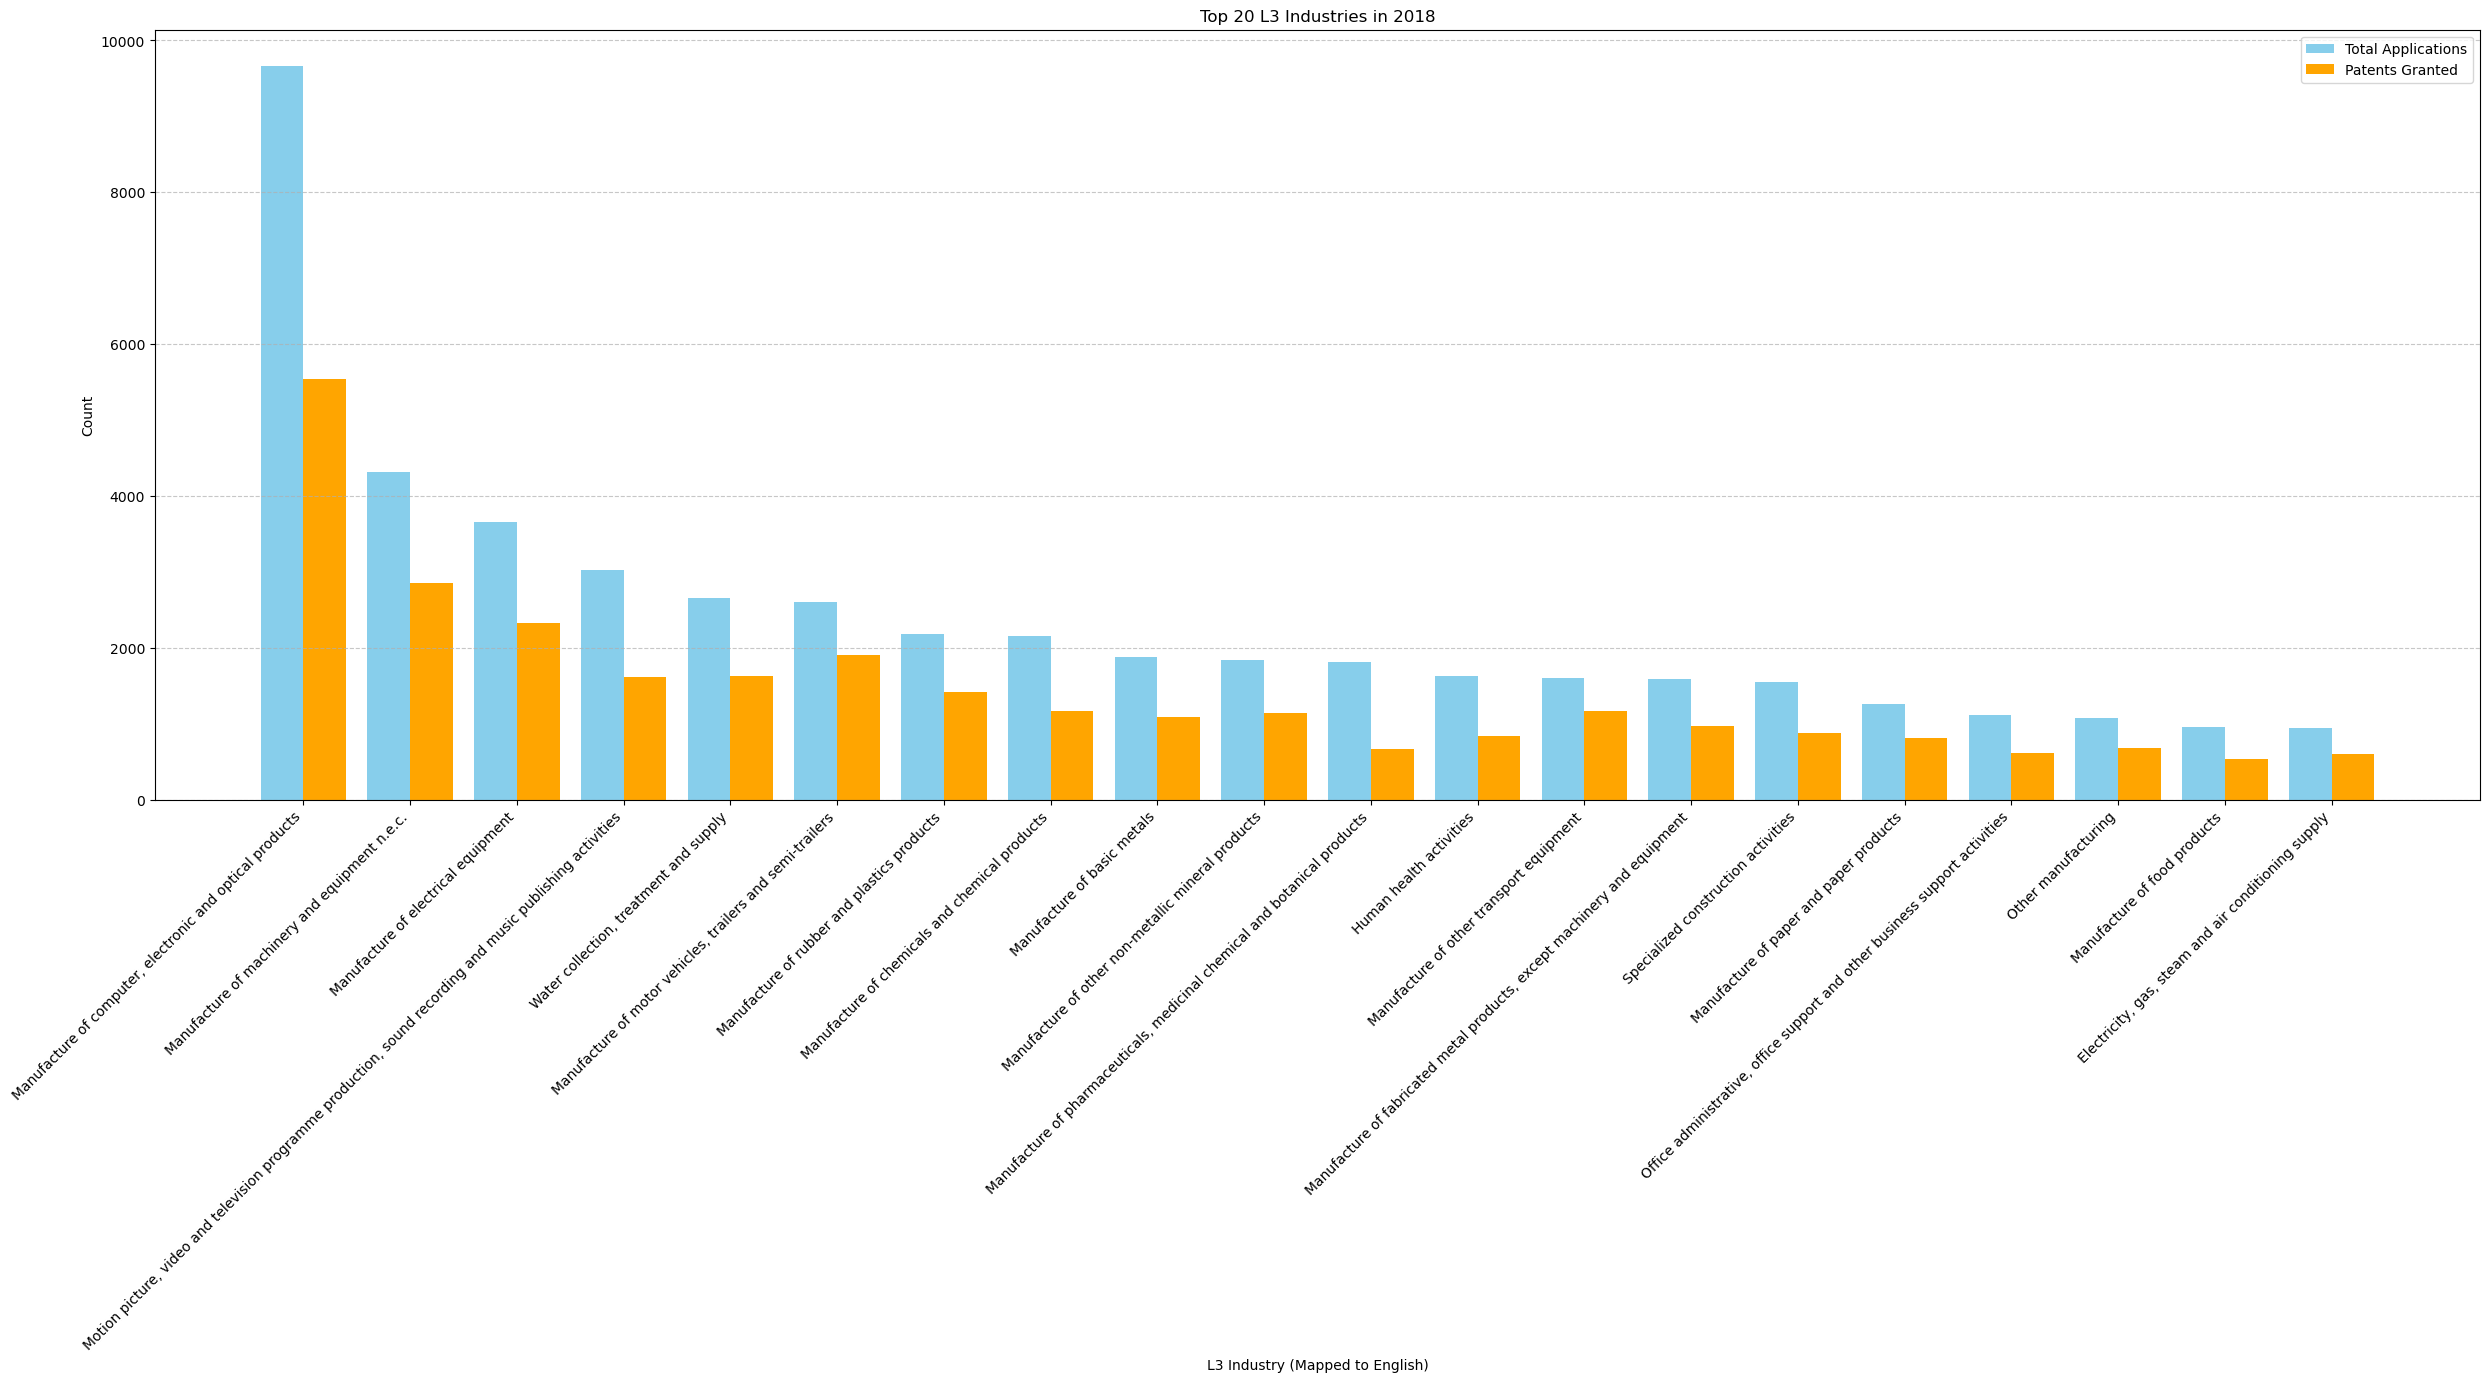

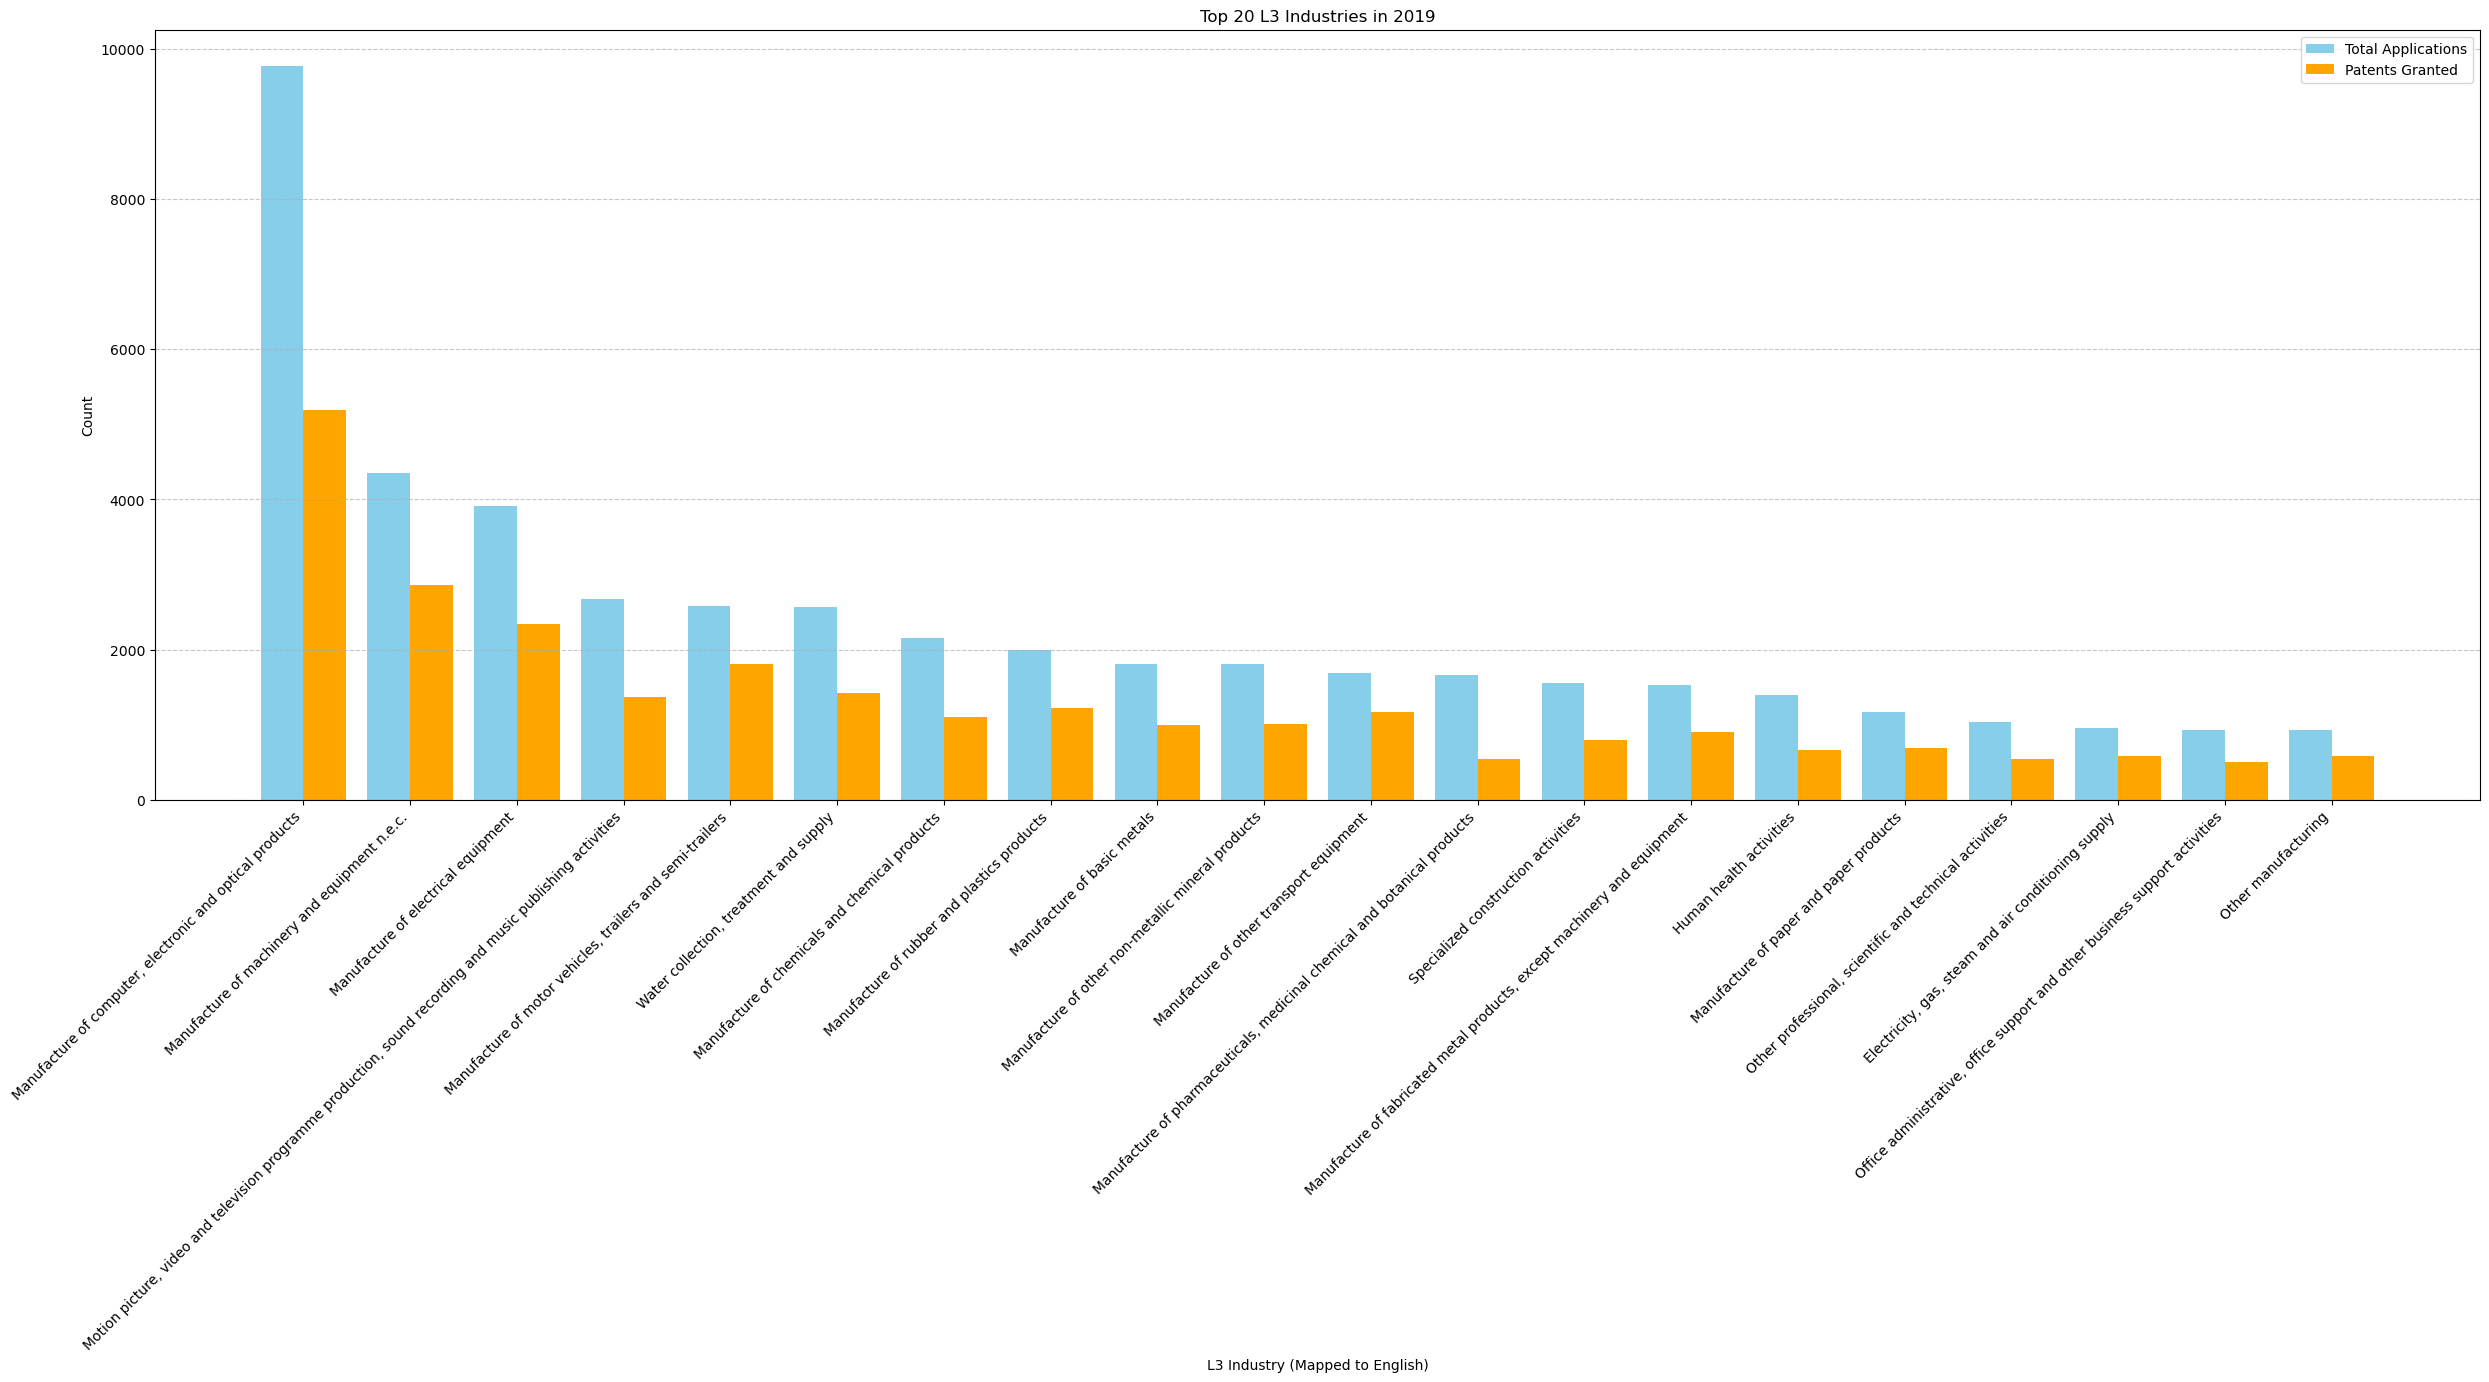

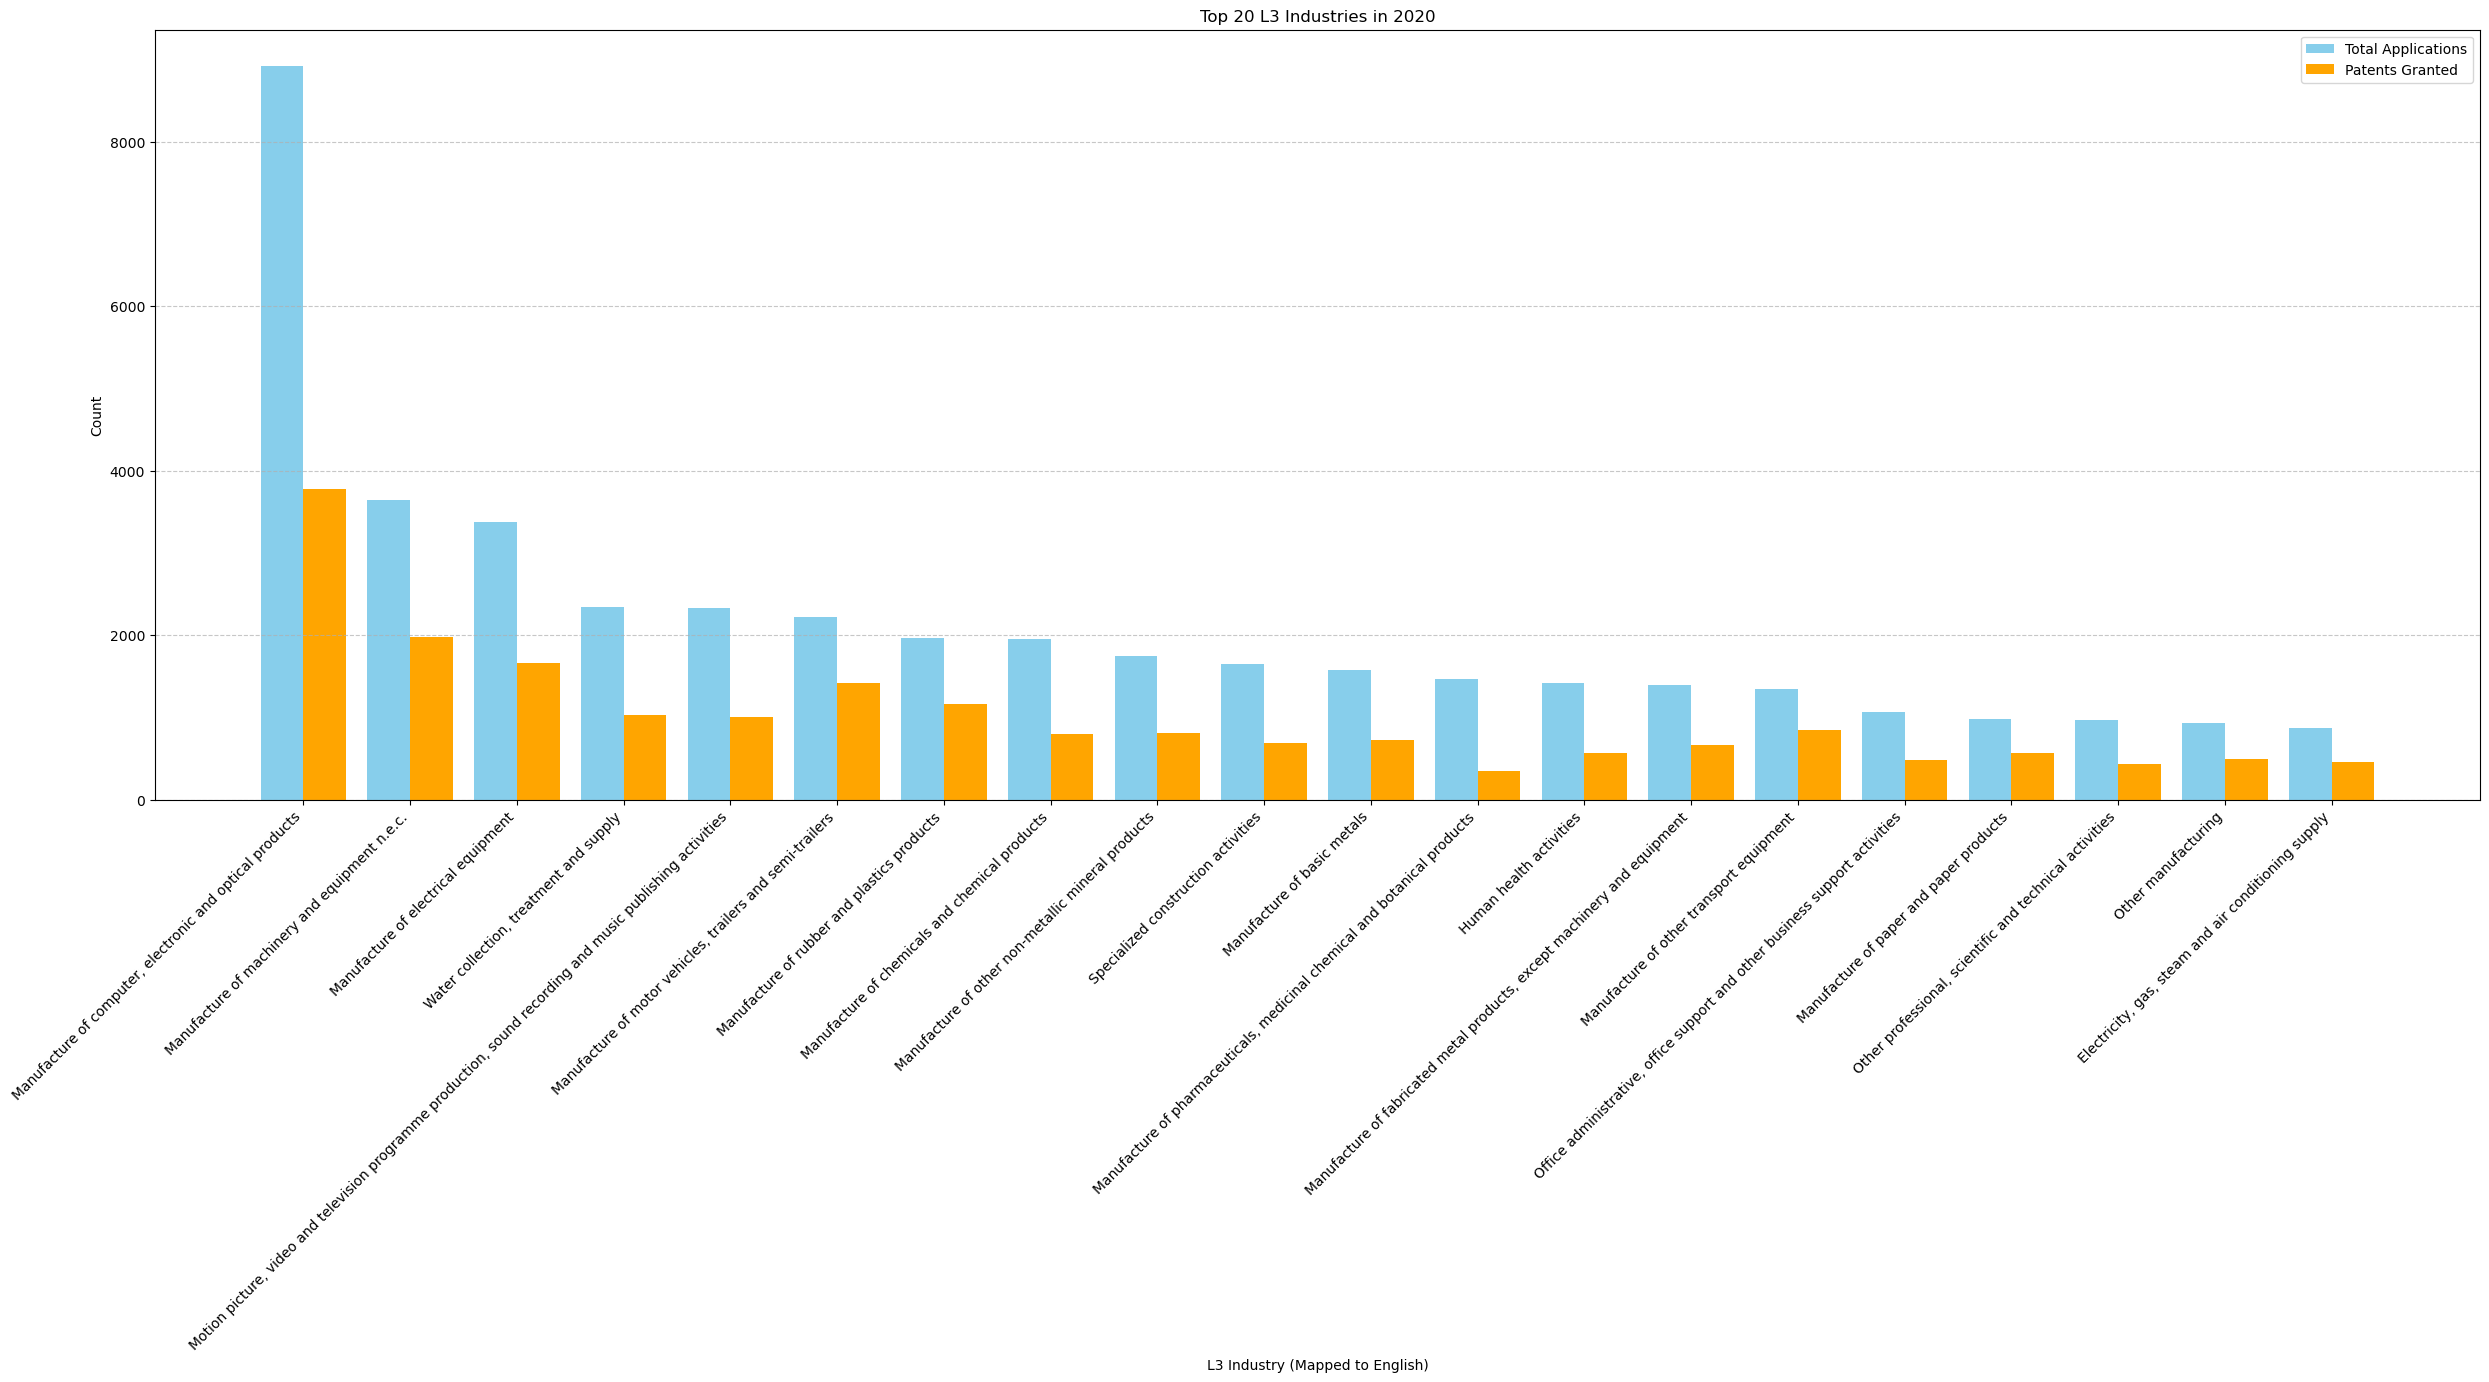

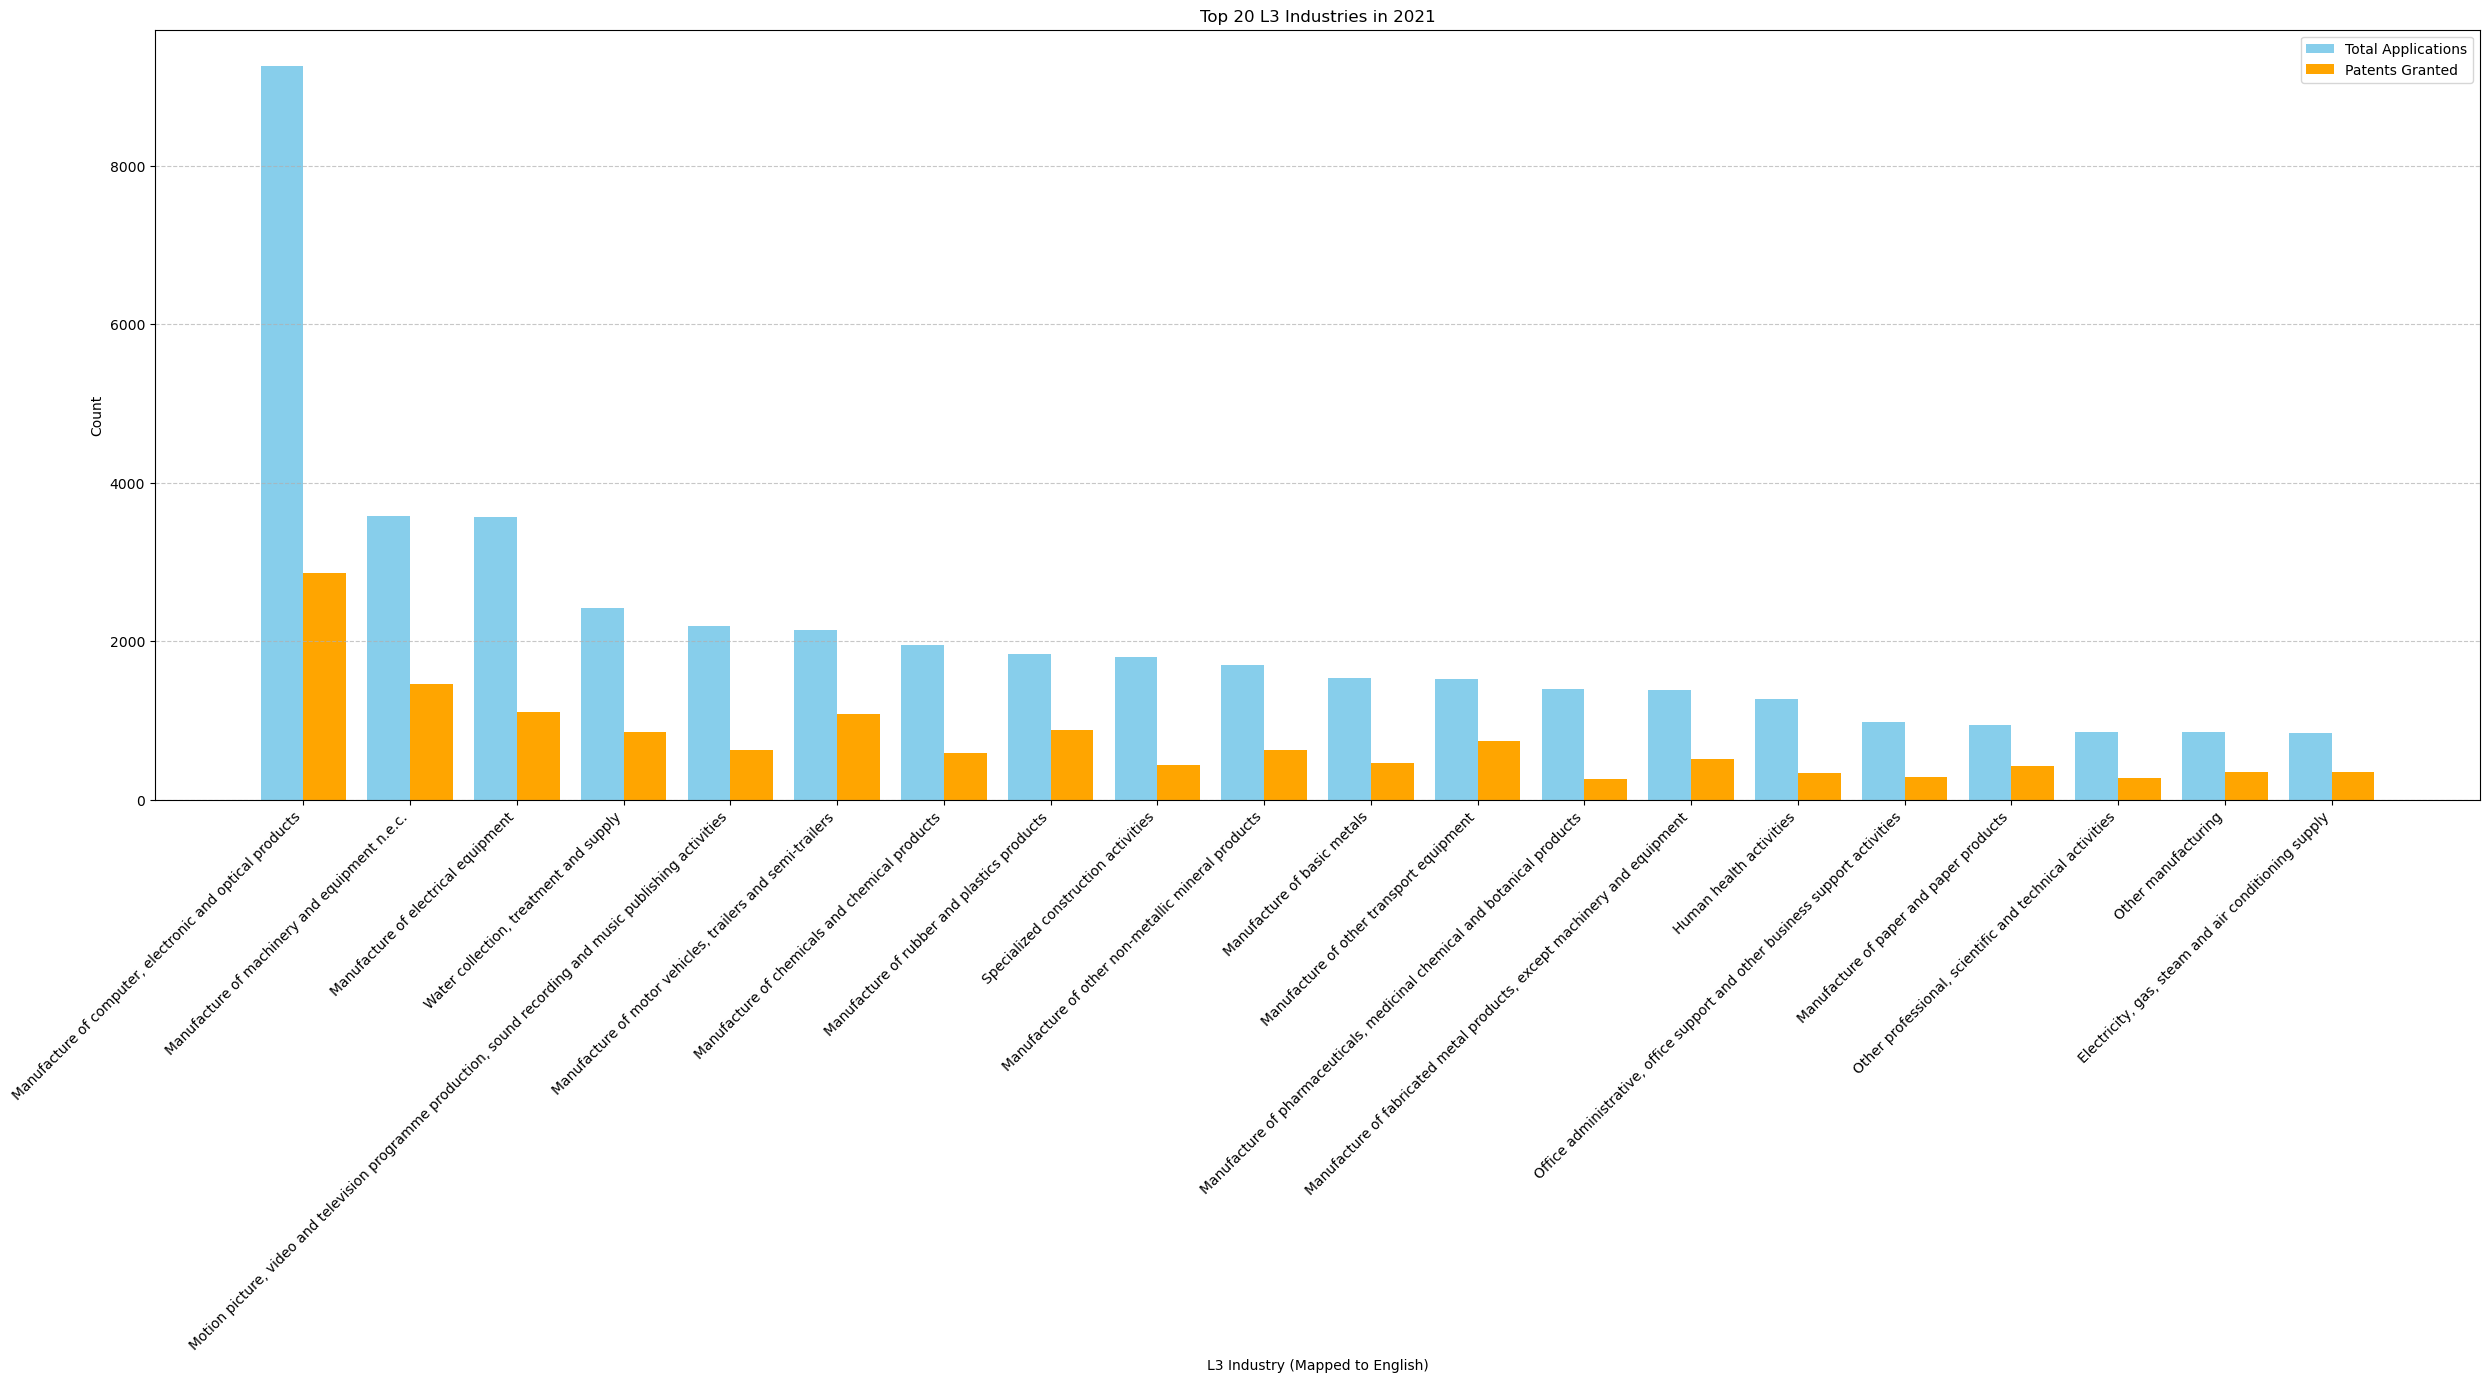

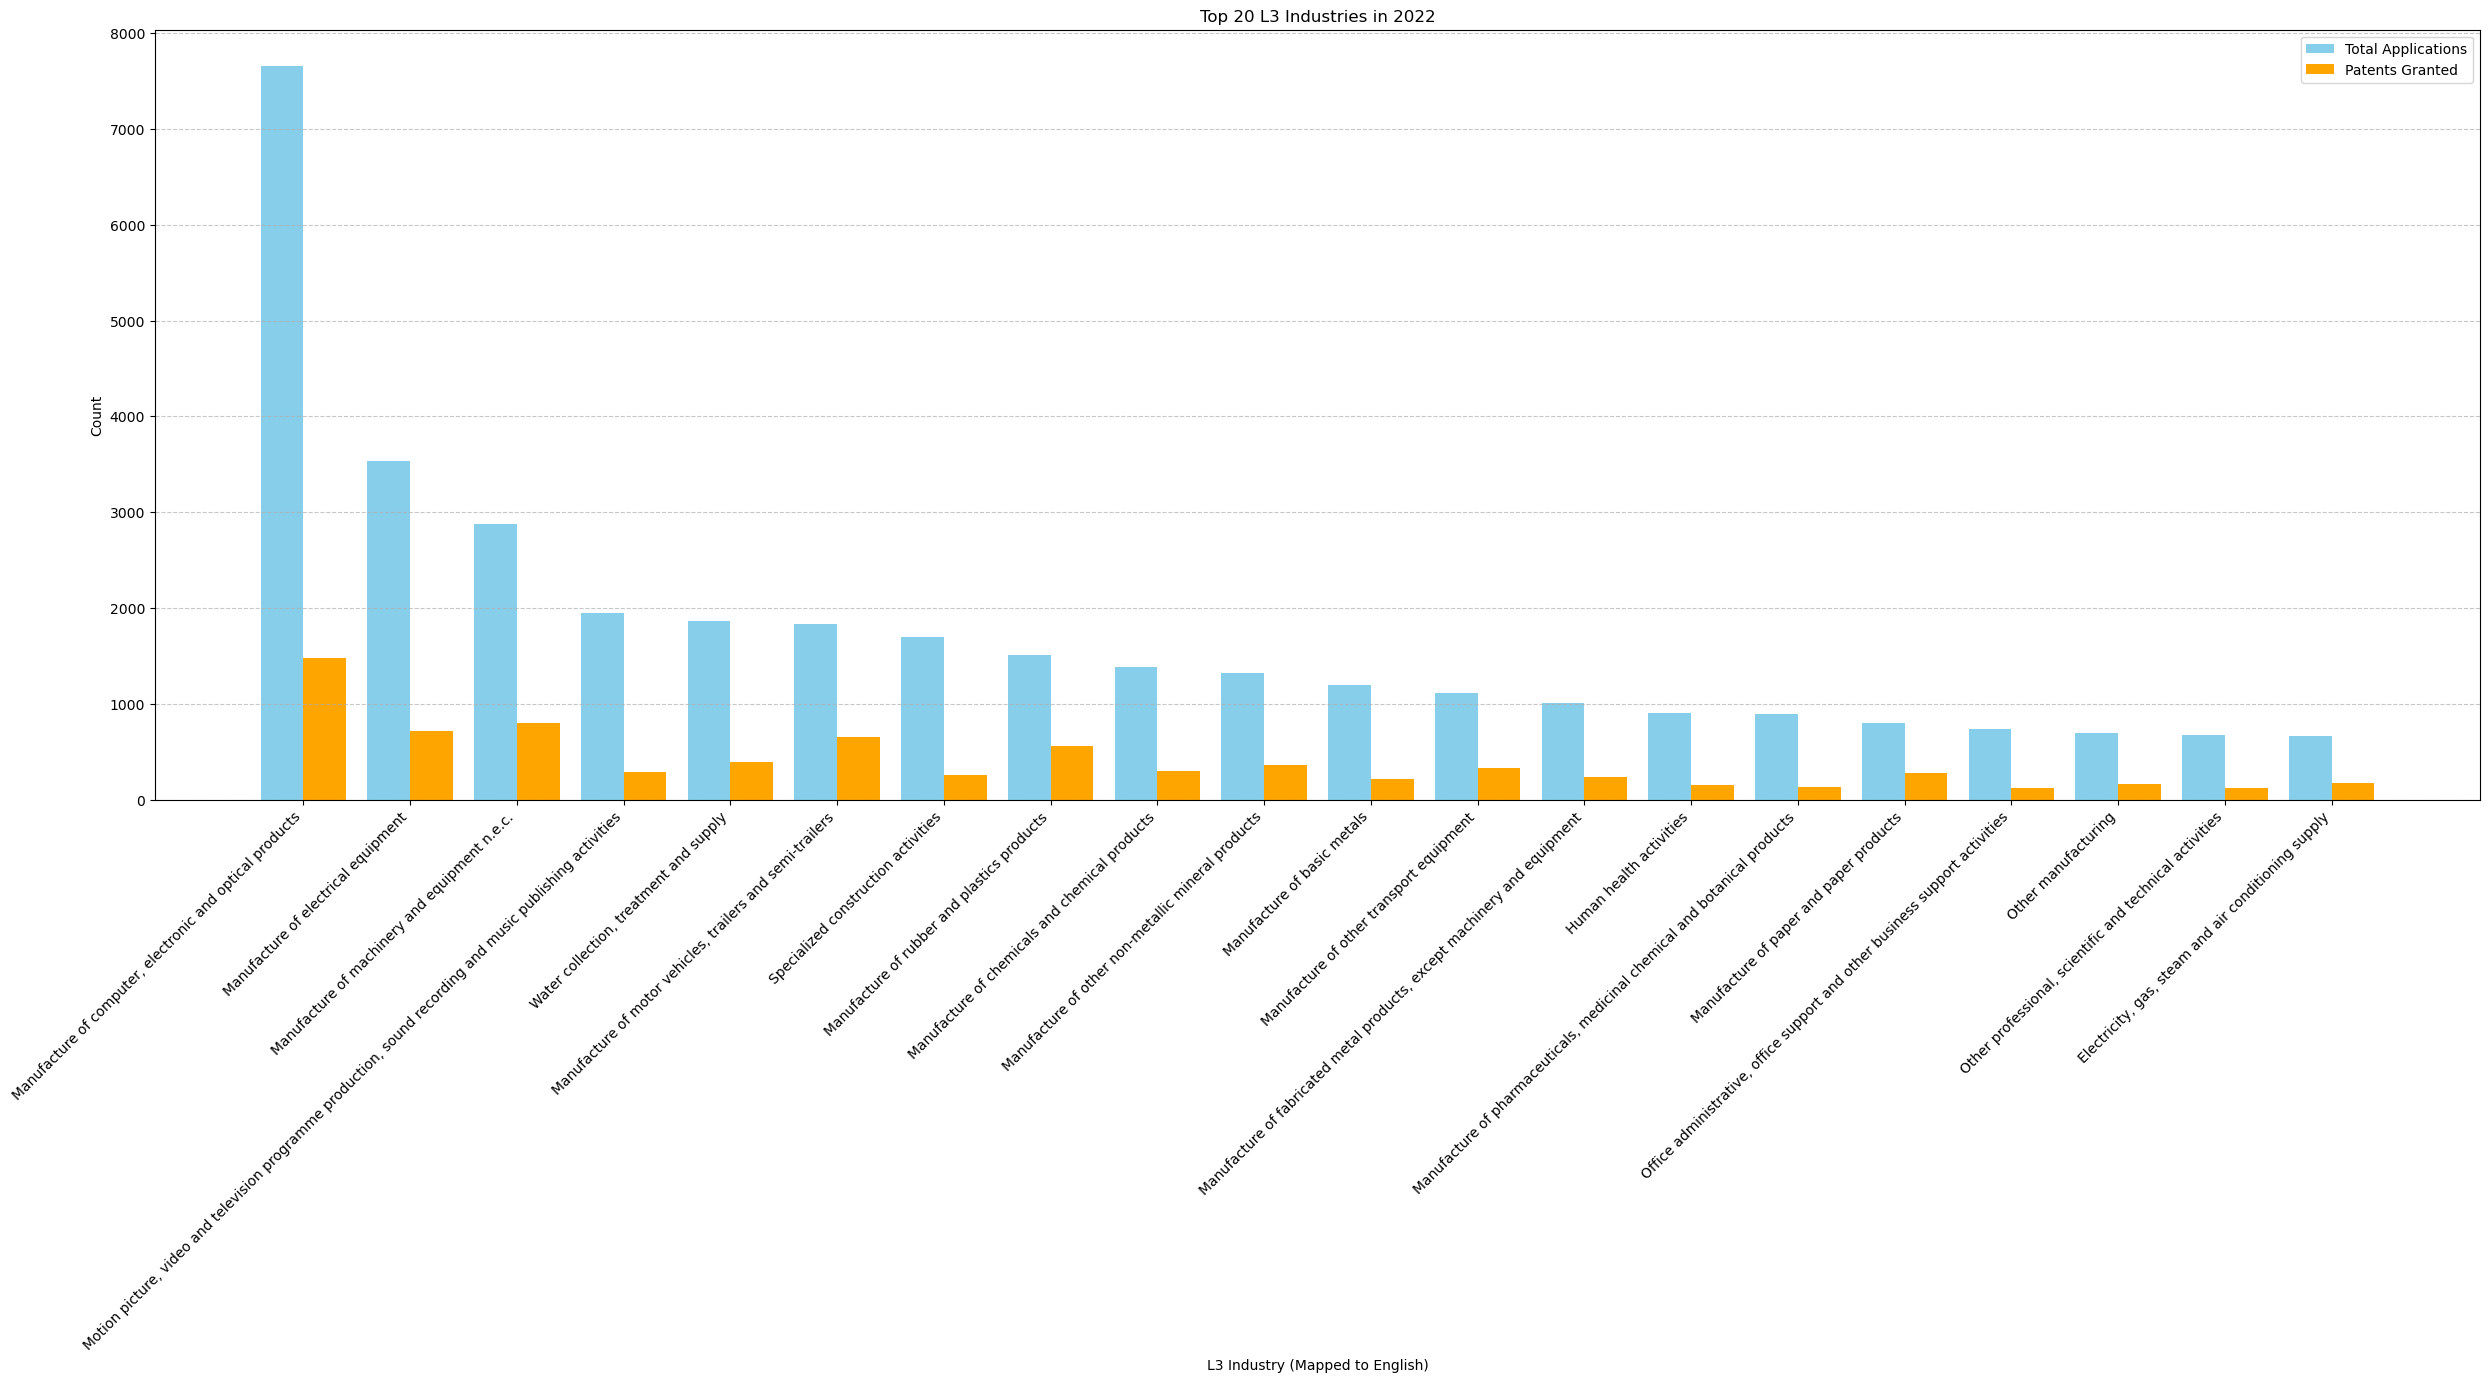

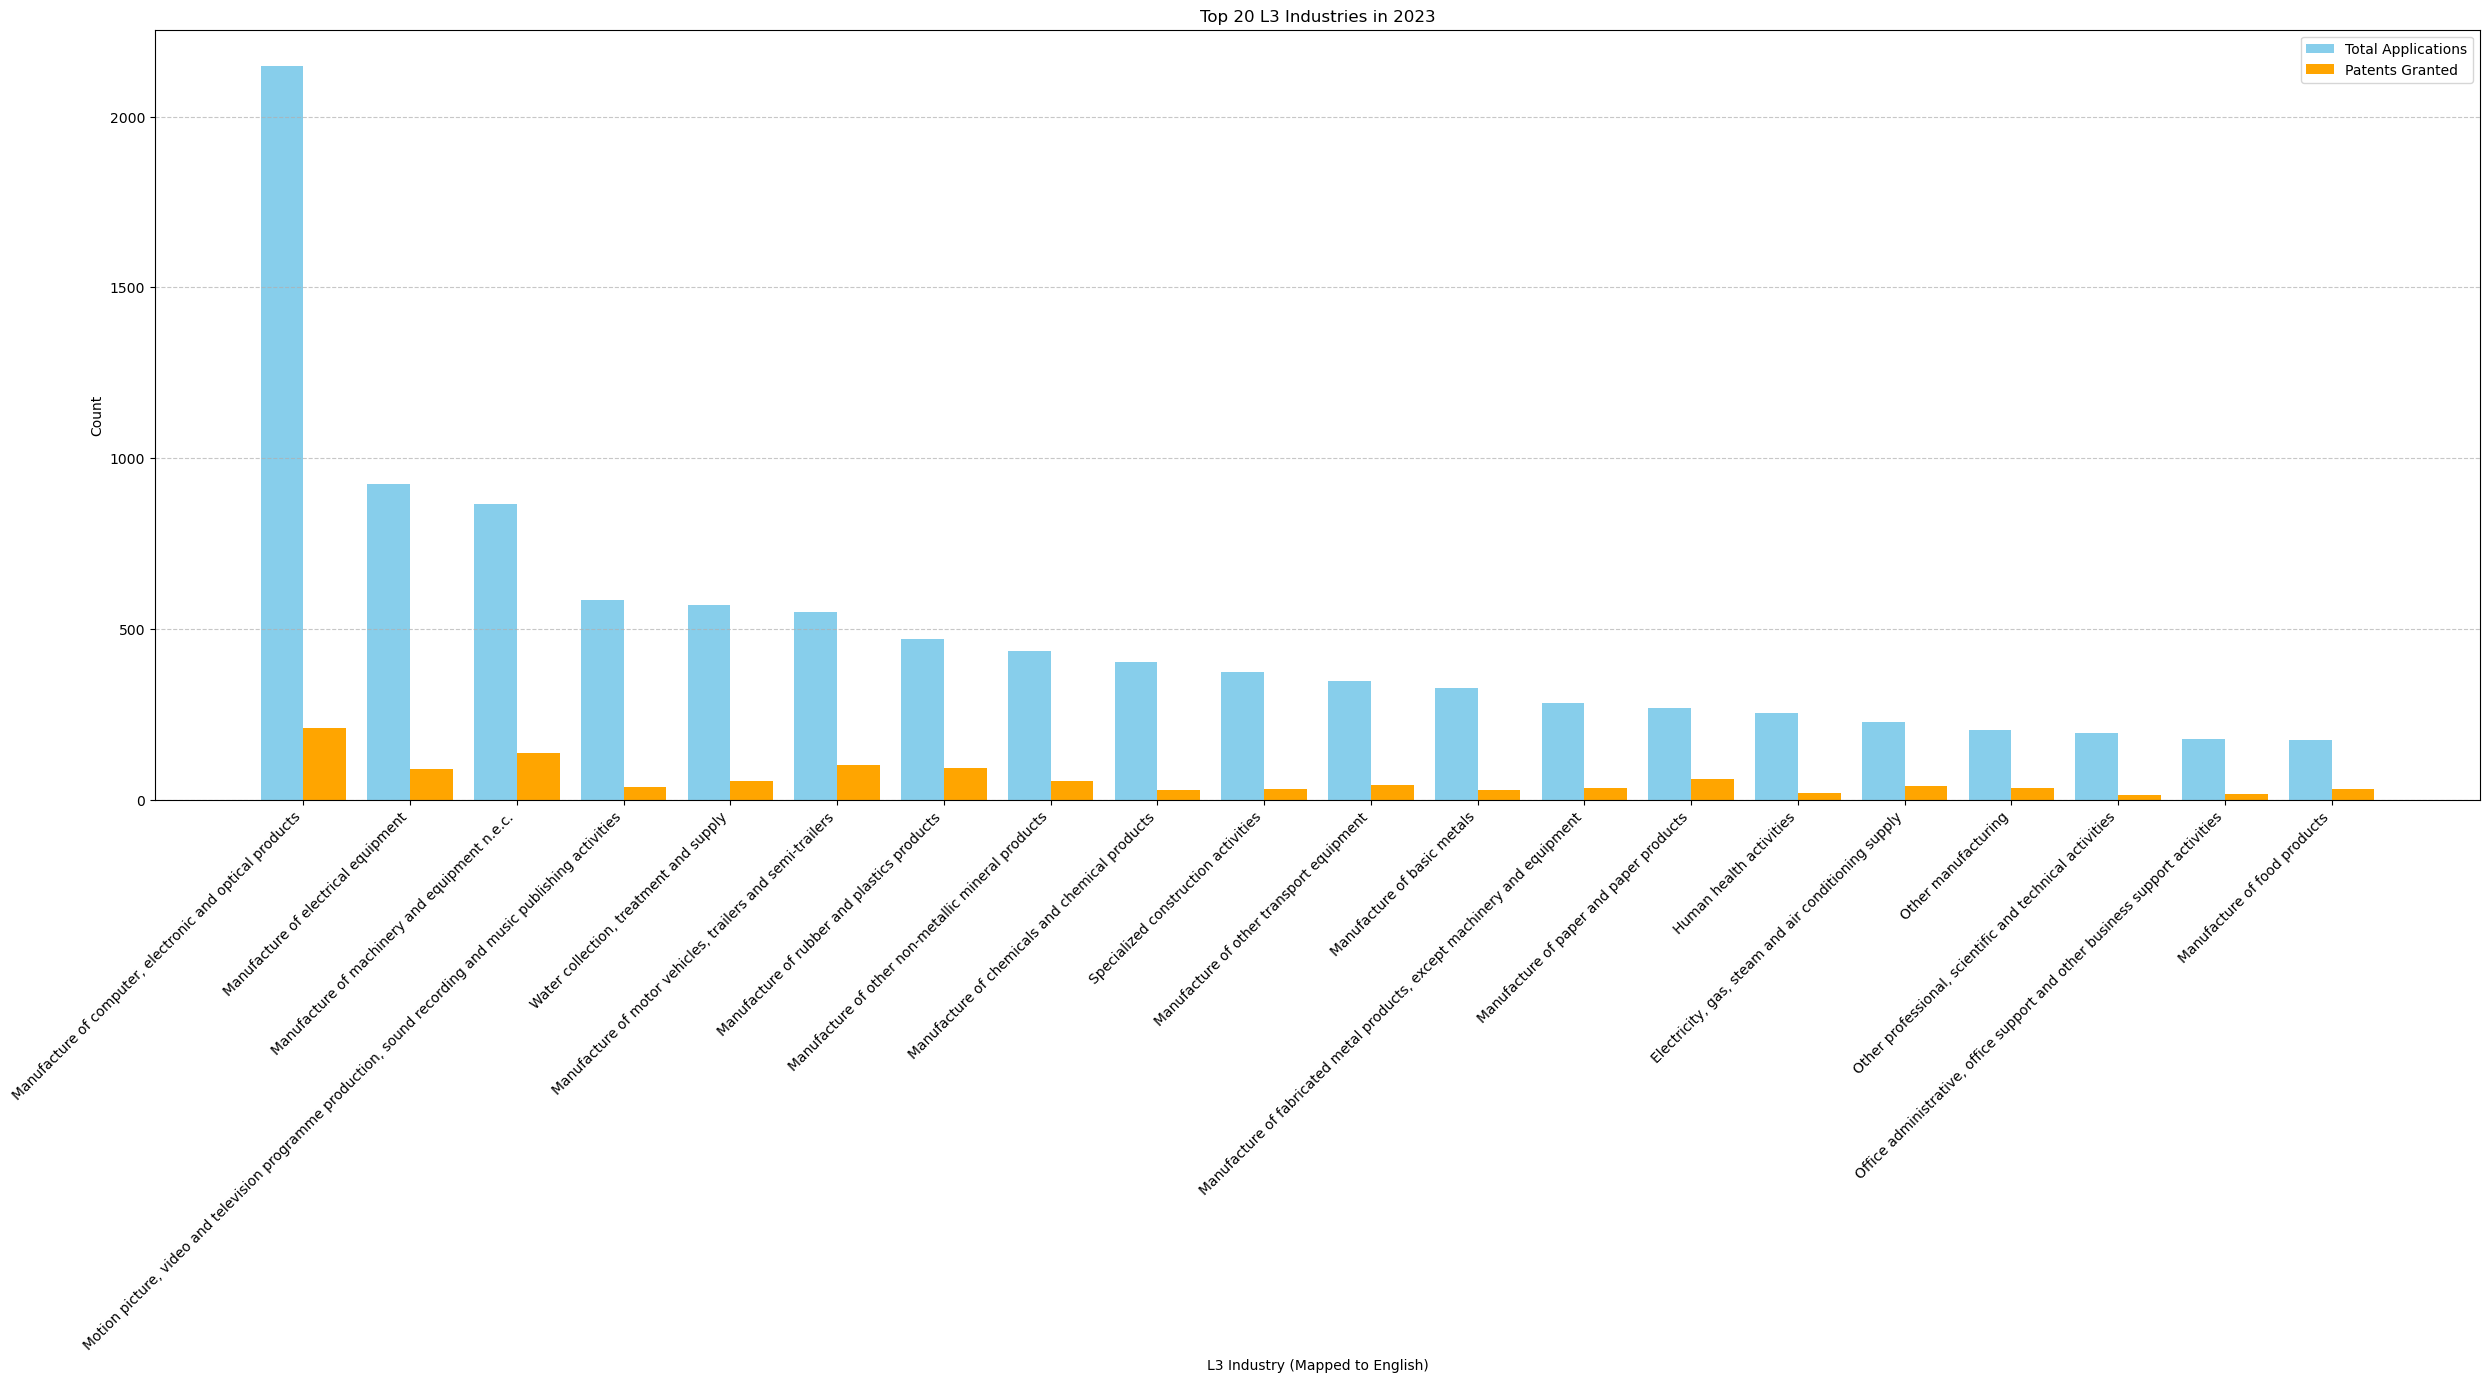

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter data from 2003 onwards
full_industry_df = full_industry_df[full_industry_df['year'] >= 2003]

# Get unique years to generate visualizations
unique_years = sorted(full_industry_df['year'].unique())[:20]  # Limit to 20 years

# Create mapping dictionary for industry codes
industry_mapping = dict(zip(industry_code_to_english['ISIC Rev.4'], 
                            industry_code_to_english['Economic Activity']))

# Generate plots
for year in unique_years:
    plt.figure(figsize=(30, 10))
    
    # Filter data for the specific year
    year_data = full_industry_df[full_industry_df['year'] == year]
    
    # Get total applications (top 20 industries)
    top_l3 = year_data['top_l3_industry'].value_counts().nlargest(20)
    
    # Get patents granted in the same industries
    granted_patents = year_data[year_data['patent_granted'] == True]['top_l3_industry'].value_counts()
    
    # Map industry codes to English names
    industry_labels = [industry_mapping.get(code, code) for code in top_l3.index]

    # Get counts for granted patents (align with the total applications order)
    granted_counts = [granted_patents.get(industry, 0) for industry in top_l3.index]
    
    # Bar positions
    x = np.arange(len(industry_labels))  # X-axis positions
    
    # Plot both bars side by side
    bar_width = 0.4  # Space between bars
    plt.bar(x - bar_width/2, top_l3.values, width=bar_width, label='Total Applications', color='skyblue')
    plt.bar(x + bar_width/2, granted_counts, width=bar_width, label='Patents Granted', color='orange')

    # Formatting
    plt.title(f'Top 20 L3 Industries in {year}')
    plt.xlabel('L3 Industry (Mapped to English)')
    plt.ylabel('Count')
    plt.xticks(x, industry_labels, rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    
    # Show plot
    plt.show()


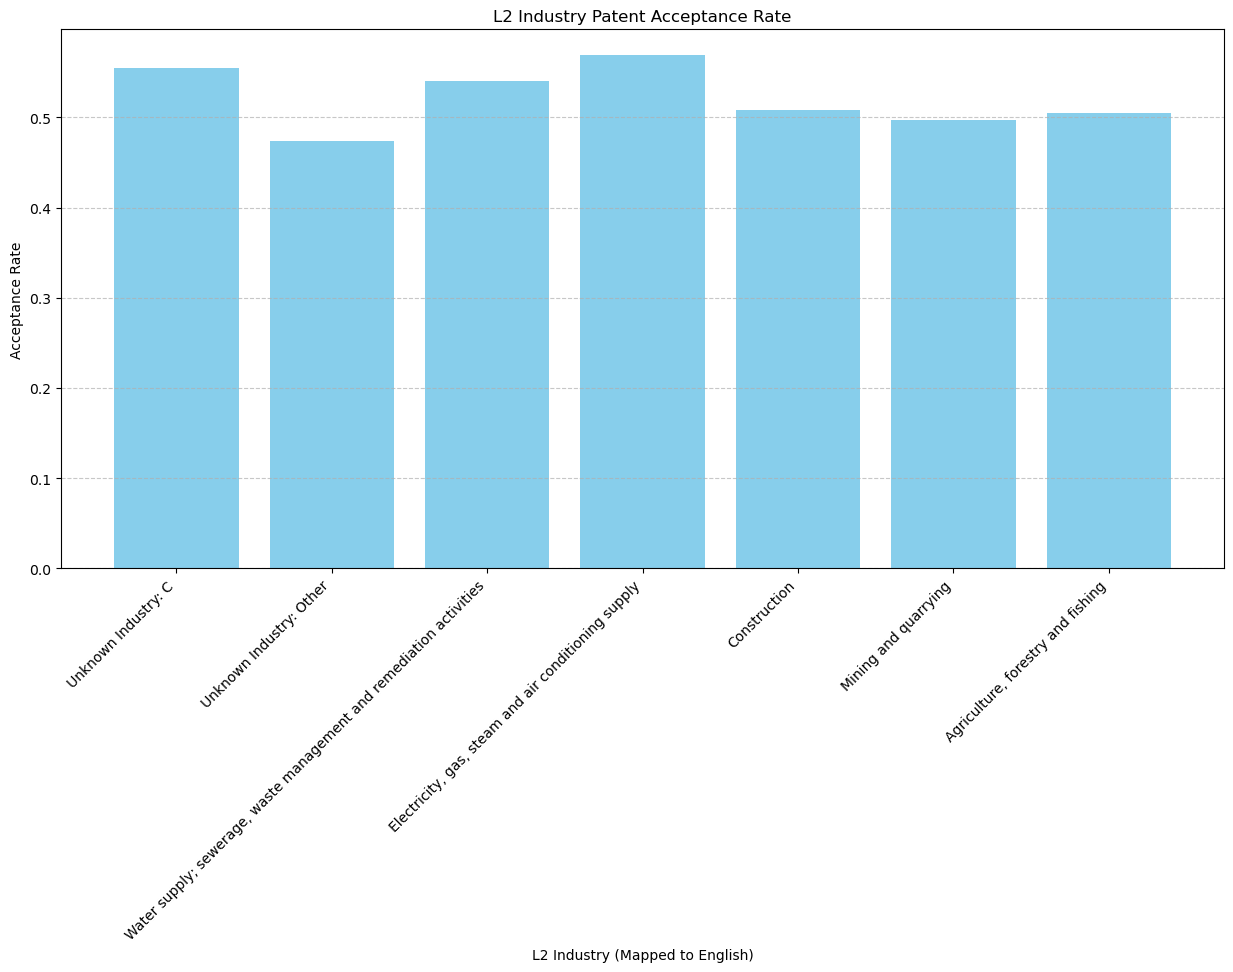

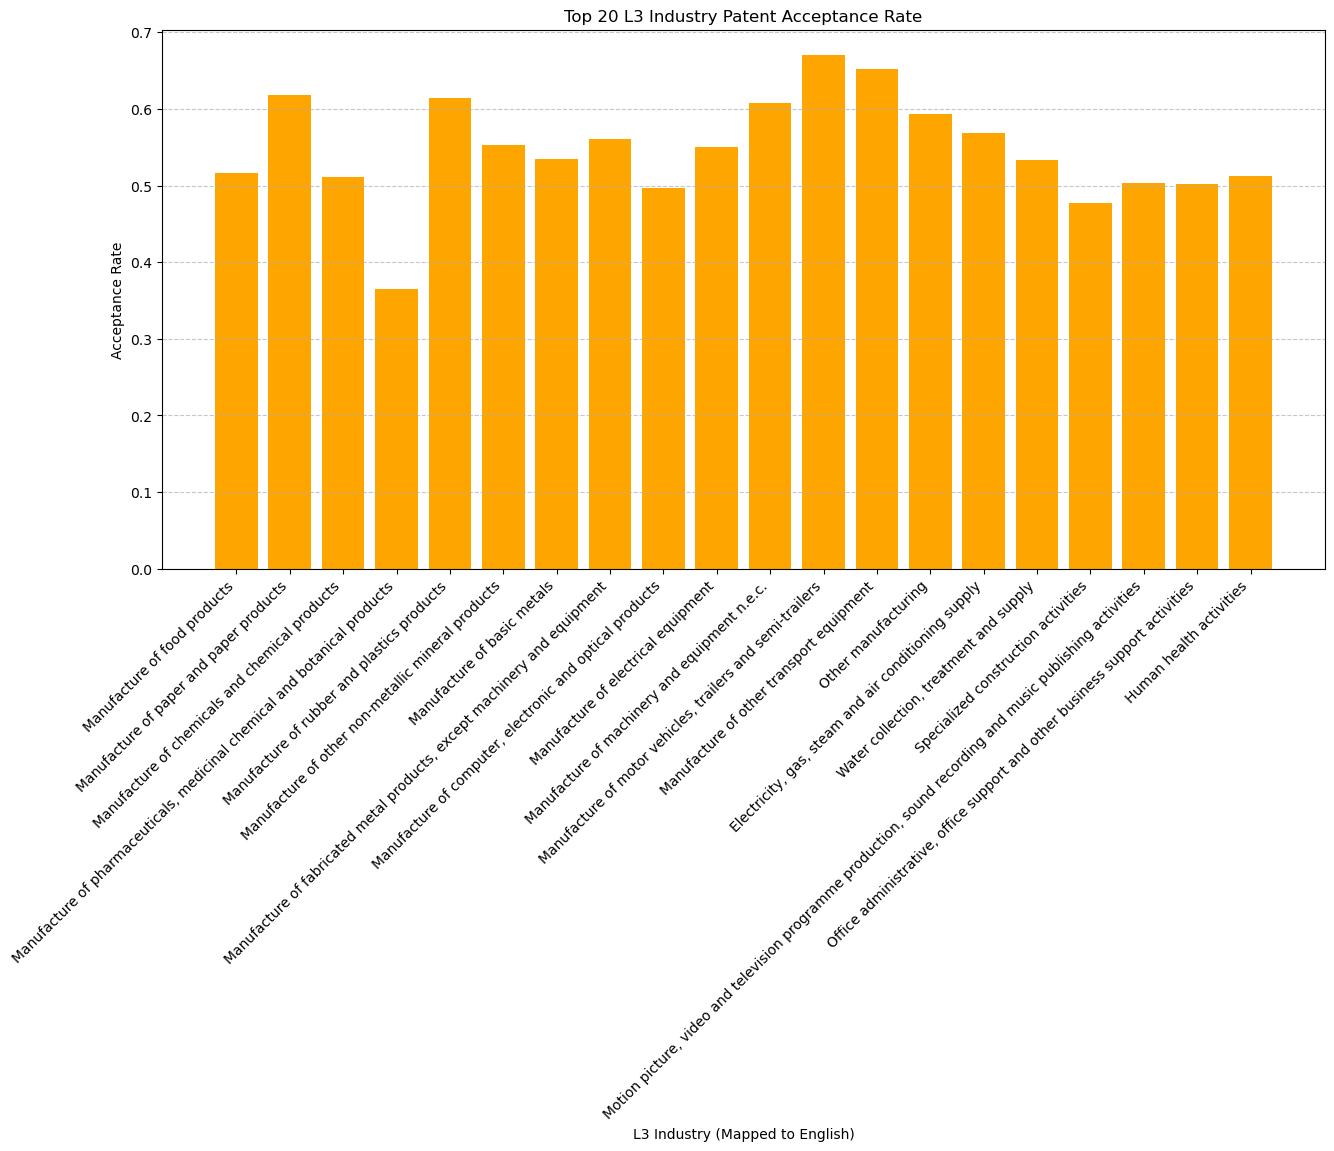

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Create mapping dictionary for industry codes
industry_mapping = dict(zip(industry_code_to_english['ISIC Rev.4'].astype(str), 
                            industry_code_to_english['Economic Activity']))

# --- L2 Industry Patent Acceptance Rate ---
plt.figure(figsize=(15, 7))

# Count applications per L2 industry
l2_total = full_industry_df['top_l2_industry'].value_counts()

# Count granted patents per L2 industry
l2_granted = full_industry_df[full_industry_df['patent_granted'] == True]['top_l2_industry'].value_counts()

# Compute acceptance rate
l2_acceptance_rate = (l2_granted / l2_total).fillna(0)  # Avoid NaN values

# Map industry codes to English names (handle missing cases)
l2_labels = [industry_mapping.get(str(code), f"Unknown Industry: {code}") for code in l2_acceptance_rate.index]

# Plot
plt.bar(l2_labels, l2_acceptance_rate.values, color='skyblue')
plt.title('L2 Industry Patent Acceptance Rate')
plt.xlabel('L2 Industry (Mapped to English)')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# --- L3 Industry Patent Acceptance Rate (Top 20) ---
plt.figure(figsize=(15, 7))

# Get the 20 most common L3 industries BEFORE computing acceptance rates
top_l3_industries = full_industry_df['top_l3_industry'].value_counts().nlargest(20).index

# Filter dataset to include only these industries
filtered_df = full_industry_df[full_industry_df['top_l3_industry'].isin(top_l3_industries)]

# Count applications & granted patents in these industries
l3_total = filtered_df['top_l3_industry'].value_counts()
l3_granted = filtered_df[filtered_df['patent_granted'] == True]['top_l3_industry'].value_counts()

# Compute acceptance rate
l3_acceptance_rate = (l3_granted / l3_total).fillna(0)  # Avoid NaN values

# Map industry codes to English names (fix missing mappings)
l3_labels = [industry_mapping.get(str(code), f"Unknown Industry: {code}") for code in l3_acceptance_rate.index]

# Set proper x-axis positions
x_positions = range(len(l3_labels))

# Plot
plt.bar(x_positions, l3_acceptance_rate.values, color='orange')
plt.xticks(x_positions, l3_labels, rotation=45, ha='right', fontsize=10)
plt.title('Top 20 L3 Industry Patent Acceptance Rate')
plt.xlabel('L3 Industry (Mapped to English)')
plt.ylabel('Acceptance Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [100]:
full_industry_df.columns

Index(['rep_name', 'total_citations', 'patent_citations', 'novelty_flag',
       'patent_granted', 'filing_date', 'patent_granted_date', 'Y_flag',
       'top_l3_industry', 'top_l2_industry'],
      dtype='object')

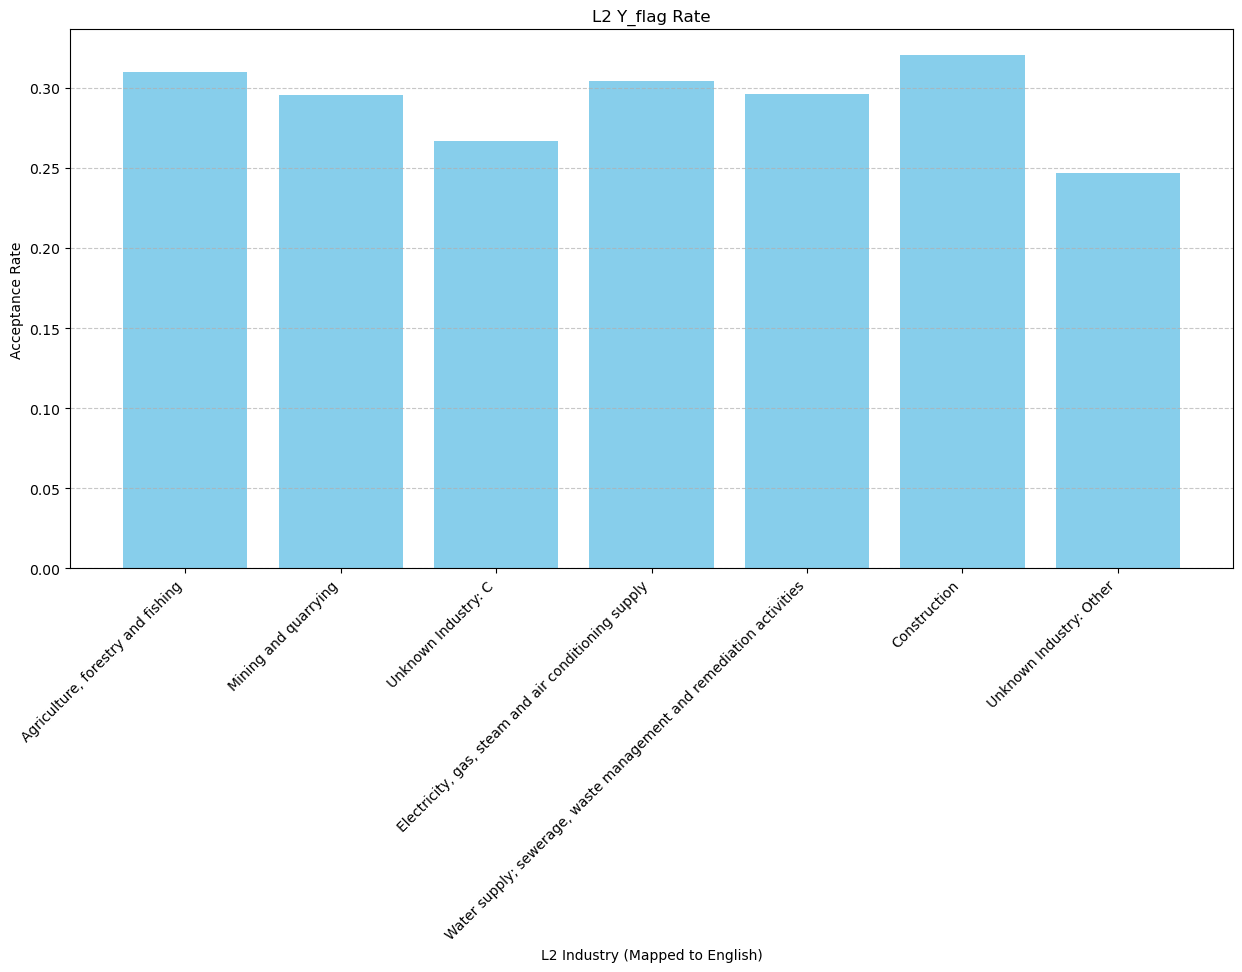

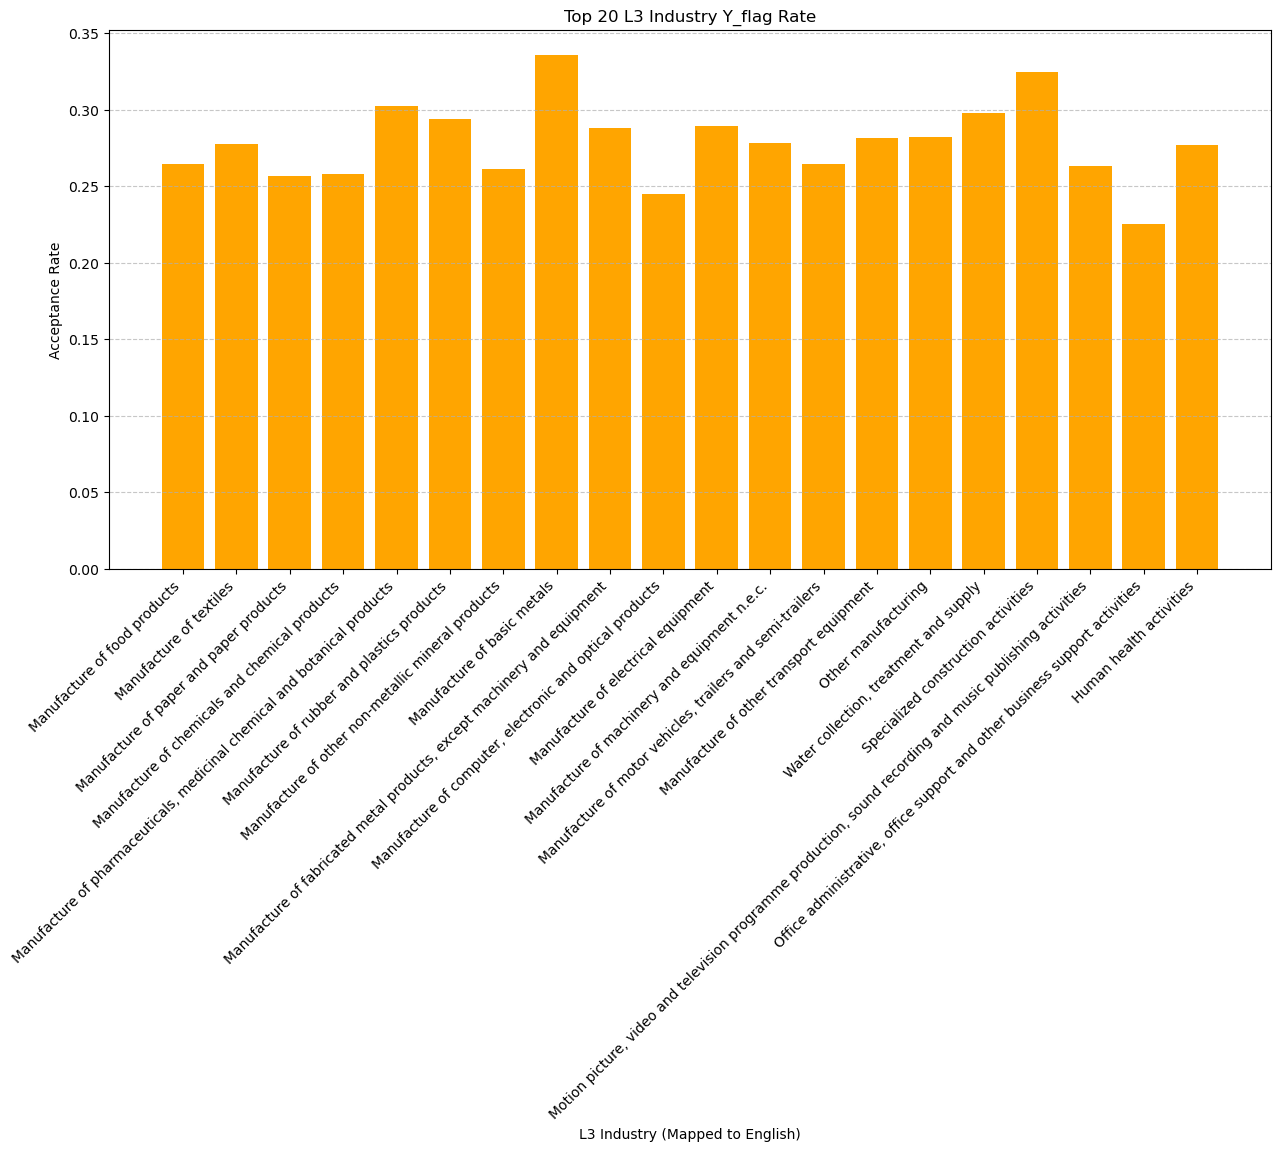

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Create mapping dictionary for industry codes
industry_mapping = dict(zip(industry_code_to_english['ISIC Rev.4'].astype(str), 
                            industry_code_to_english['Economic Activity']))

# --- L2 Industry Patent Acceptance Rate ---
plt.figure(figsize=(15, 7))

# Count applications per L2 industry
l2_total = full_industry_df['top_l2_industry'].value_counts()

# Count granted patents per L2 industry
l2_granted = full_industry_df[full_industry_df['Y_flag'] == True]['top_l2_industry'].value_counts()

# Compute acceptance rate
l2_acceptance_rate = (l2_granted / l2_total).fillna(0)  # Avoid NaN values

# Map industry codes to English names (handle missing cases)
l2_labels = [industry_mapping.get(str(code), f"Unknown Industry: {code}") for code in l2_acceptance_rate.index]

# Plot
plt.bar(l2_labels, l2_acceptance_rate.values, color='skyblue')
plt.title('L2 Y_flag Rate')
plt.xlabel('L2 Industry (Mapped to English)')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# --- L3 Industry Patent Acceptance Rate (Top 20) ---
plt.figure(figsize=(15, 7))

# Get the 20 most common L3 industries BEFORE computing acceptance rates
top_l3_industries = full_industry_df['top_l3_industry'].value_counts().nlargest(20).index

# Filter dataset to include only these industries
filtered_df = full_industry_df[full_industry_df['top_l3_industry'].isin(top_l3_industries)]

# Count applications & granted patents in these industries
l3_total = filtered_df['top_l3_industry'].value_counts()
l3_granted = filtered_df[filtered_df['Y_flag'] == True]['top_l3_industry'].value_counts()

# Compute acceptance rate
l3_acceptance_rate = (l3_granted / l3_total).fillna(0)  # Avoid NaN values

# Map industry codes to English names (fix missing mappings)
l3_labels = [industry_mapping.get(str(code), f"Unknown Industry: {code}") for code in l3_acceptance_rate.index]

# Set proper x-axis positions
x_positions = range(len(l3_labels))

# Plot
plt.bar(x_positions, l3_acceptance_rate.values, color='orange')
plt.xticks(x_positions, l3_labels, rotation=45, ha='right', fontsize=10)
plt.title('Top 20 L3 Industry Y_flag Rate')
plt.xlabel('L3 Industry (Mapped to English)')
plt.ylabel('Acceptance Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


/tmp/ipykernel_6250/270512705.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_industry_df['citation_ratio'].fillna(0, inplace=True)  # Replace NaN with 0


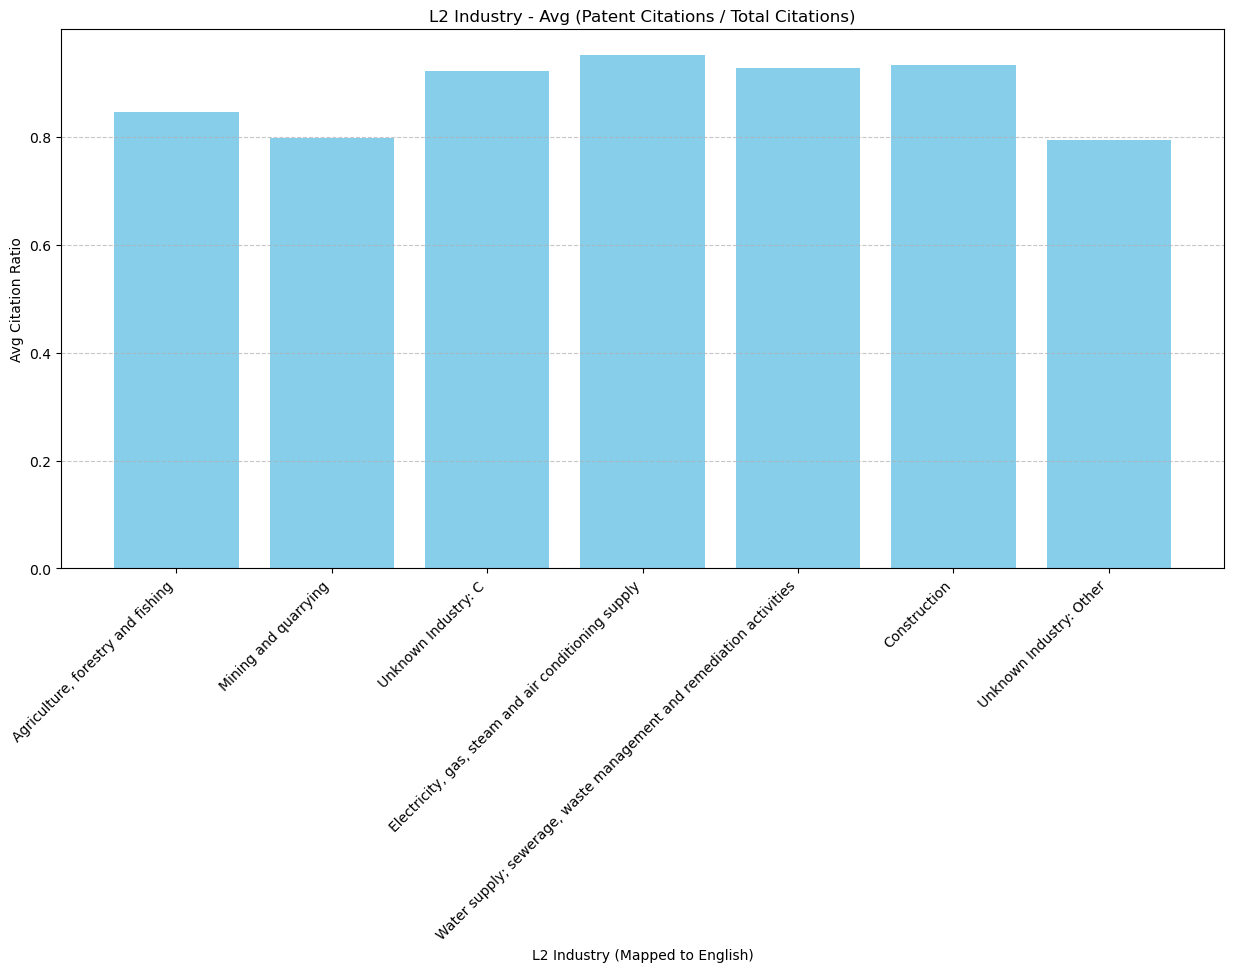

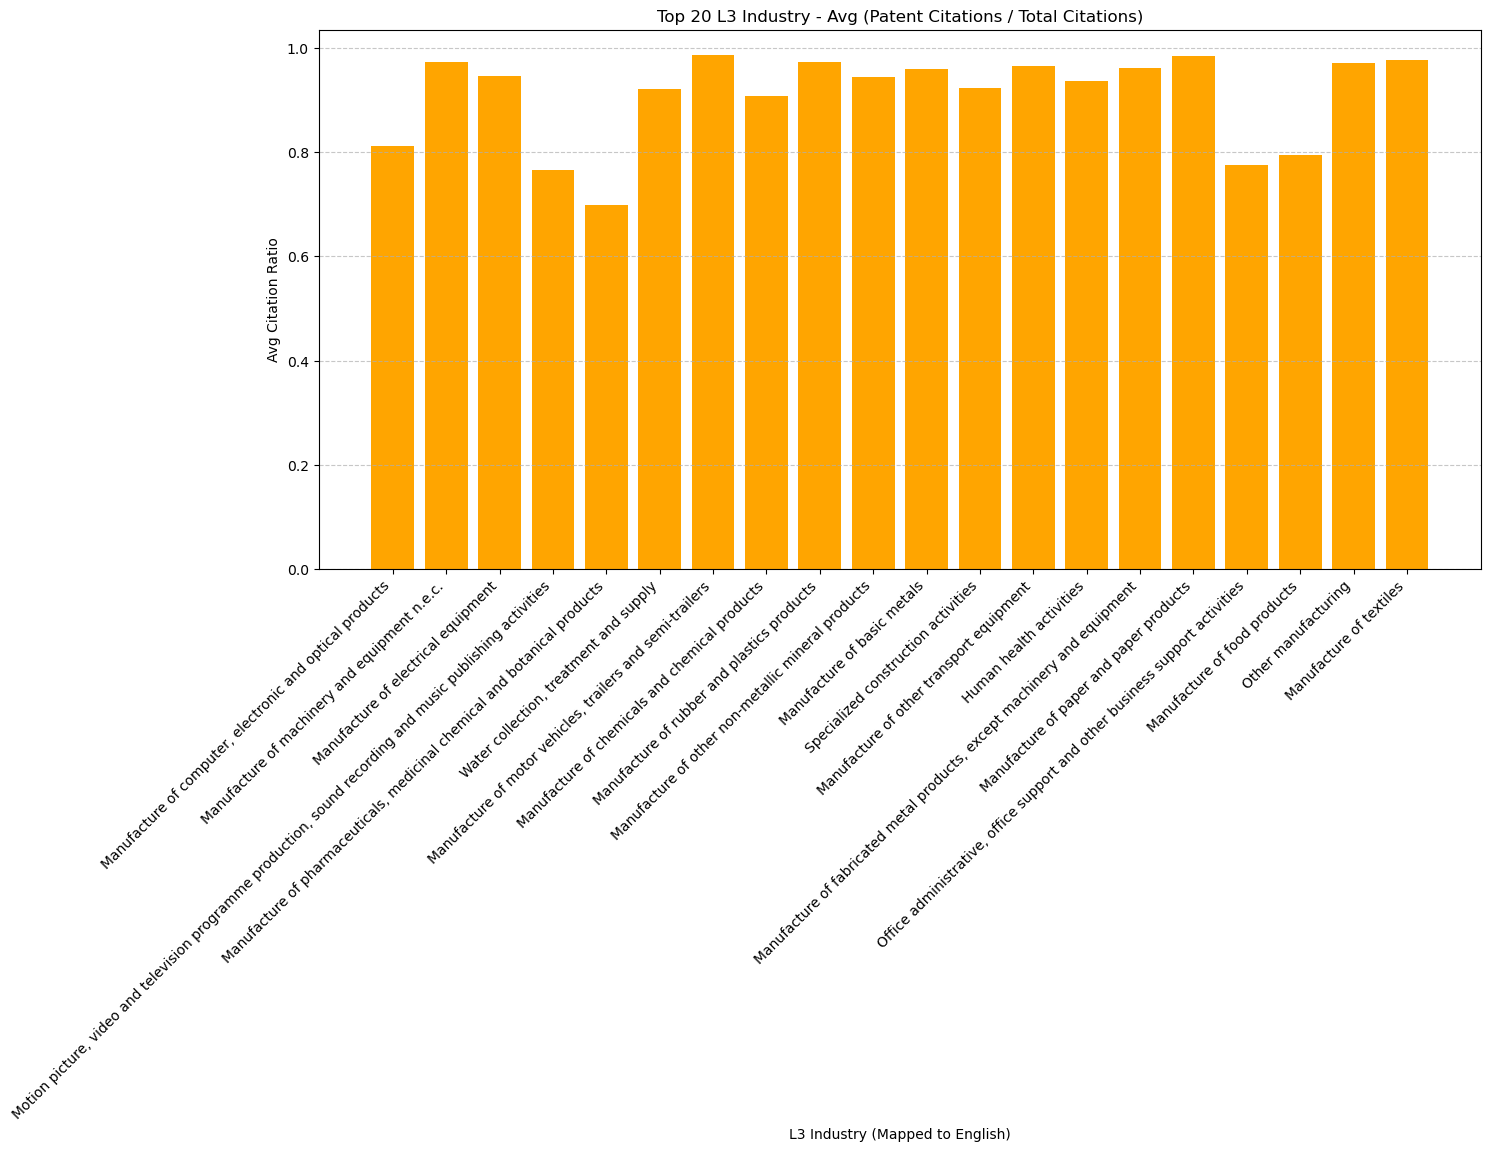

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Create mapping dictionary for industry codes
industry_mapping = dict(zip(industry_code_to_english['ISIC Rev.4'].astype(str), 
                            industry_code_to_english['Economic Activity']))

# --- L2 Industry: Average (patent_citations / total_citations) ---
plt.figure(figsize=(15, 7))

# Ensure division is safe (avoid division by zero)
full_industry_df['citation_ratio'] = full_industry_df['patent_citations'] / full_industry_df['total_citations']
full_industry_df['citation_ratio'].fillna(0, inplace=True)  # Replace NaN with 0

# Group by L2 industry and compute the mean ratio
l2_avg_ratio = full_industry_df.groupby('top_l2_industry')['citation_ratio'].mean()

# Map industry codes to English names (fix missing mappings)
l2_labels = [industry_mapping.get(str(code), f"Unknown Industry: {code}") for code in l2_avg_ratio.index]

# Plot
plt.bar(l2_labels, l2_avg_ratio.values, color='skyblue')
plt.title('L2 Industry - Avg (Patent Citations / Total Citations)')
plt.xlabel('L2 Industry (Mapped to English)')
plt.ylabel('Avg Citation Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# --- L3 Industry (Top 20): Average (patent_citations / total_citations) ---
plt.figure(figsize=(15, 7))

# Get the 20 most common L3 industries BEFORE computing averages
top_l3_industries = full_industry_df['top_l3_industry'].value_counts().nlargest(20).index

# Filter dataset to include only these industries
filtered_df = full_industry_df[full_industry_df['top_l3_industry'].isin(top_l3_industries)]

# Compute average citation ratio for each L3 industry
l3_avg_ratio = filtered_df.groupby('top_l3_industry')['citation_ratio'].mean()

# Ensure only the top 20 industries are displayed
l3_avg_ratio = l3_avg_ratio.loc[top_l3_industries]

# Map industry codes to English names (fix missing mappings)
l3_labels = [industry_mapping.get(str(code), f"Unknown Industry: {code}") for code in l3_avg_ratio.index]

# Set proper x-axis positions
x_positions = range(len(l3_labels))

# Plot
plt.bar(x_positions, l3_avg_ratio.values, color='orange')
plt.xticks(x_positions, l3_labels, rotation=45, ha='right', fontsize=10)
plt.title('Top 20 L3 Industry - Avg (Patent Citations / Total Citations)')
plt.xlabel('L3 Industry (Mapped to English)')
plt.ylabel('Avg Citation Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


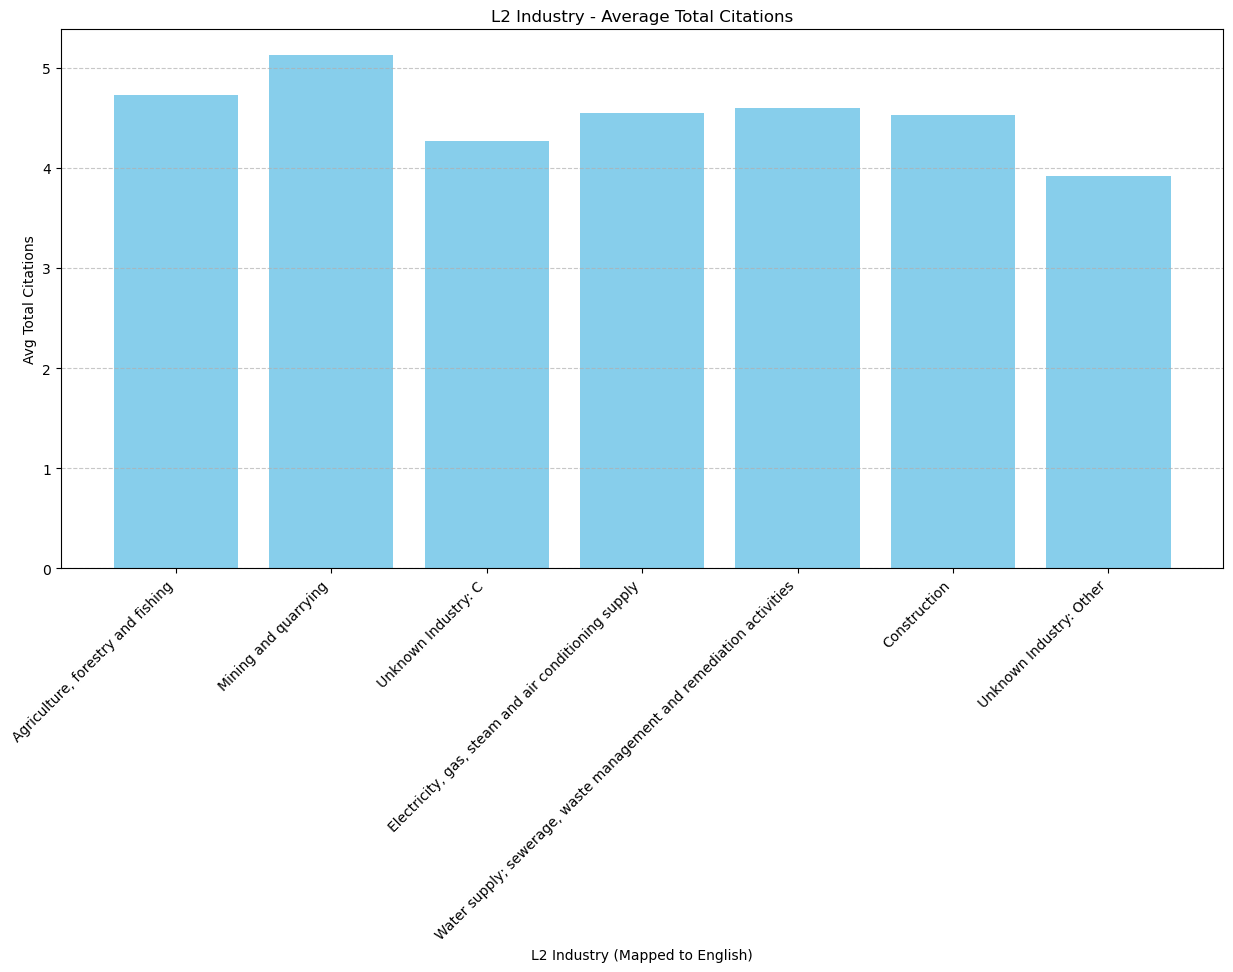

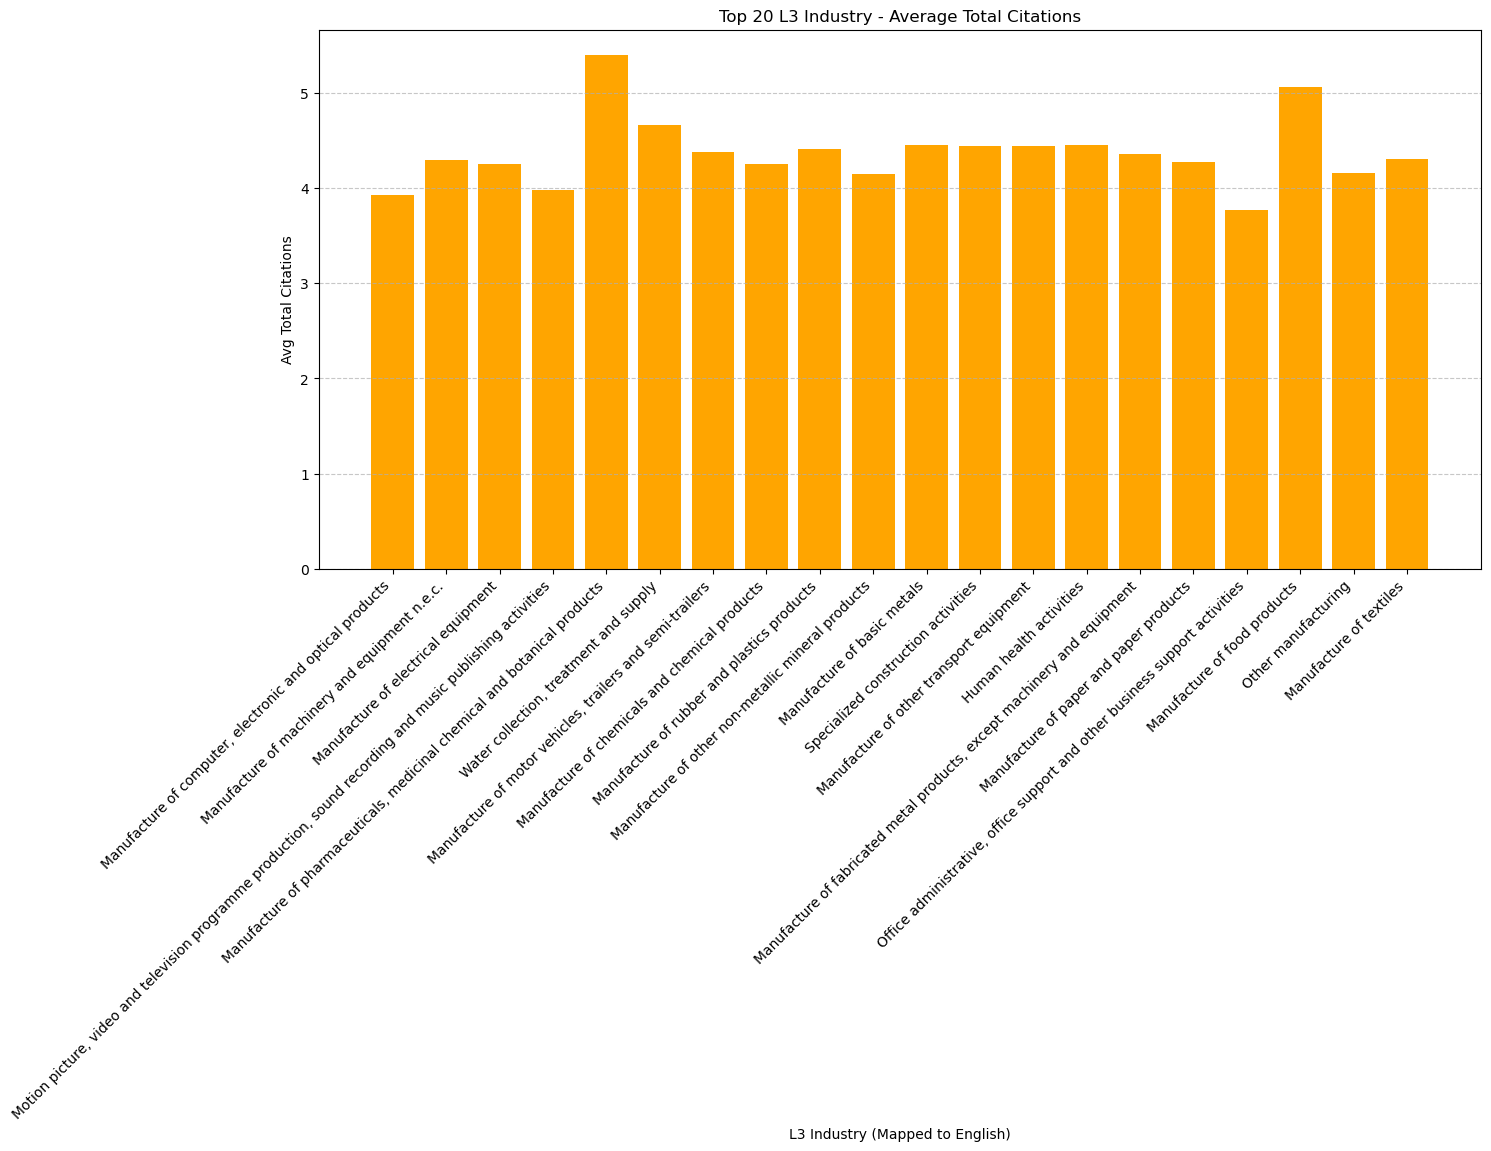

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Create mapping dictionary for industry codes
industry_mapping = dict(zip(industry_code_to_english['ISIC Rev.4'].astype(str), 
                            industry_code_to_english['Economic Activity']))

# --- L2 Industry: Average Total Citations ---
plt.figure(figsize=(15, 7))

# Group by L2 industry and compute the mean of total_citations
l2_avg_citations = full_industry_df.groupby('top_l2_industry')['total_citations'].mean()

# Map industry codes to English names (handle missing mappings)
l2_labels = [industry_mapping.get(str(code), f"Unknown Industry: {code}") for code in l2_avg_citations.index]

# Plot
plt.bar(l2_labels, l2_avg_citations.values, color='skyblue')
plt.title('L2 Industry - Average Total Citations')
plt.xlabel('L2 Industry (Mapped to English)')
plt.ylabel('Avg Total Citations')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# --- L3 Industry (Top 20): Average Total Citations ---
plt.figure(figsize=(15, 7))

# Get the 20 most common L3 industries BEFORE computing averages
top_l3_industries = full_industry_df['top_l3_industry'].value_counts().nlargest(20).index

# Filter dataset to include only these industries
filtered_df = full_industry_df[full_industry_df['top_l3_industry'].isin(top_l3_industries)]

# Compute average total citations for each L3 industry
l3_avg_citations = filtered_df.groupby('top_l3_industry')['total_citations'].mean()

# Ensure only the top 20 industries are displayed
l3_avg_citations = l3_avg_citations.loc[top_l3_industries]

# Map industry codes to English names (fix missing mappings)
l3_labels = [industry_mapping.get(str(code), f"Unknown Industry: {code}") for code in l3_avg_citations.index]

# Set proper x-axis positions
x_positions = range(len(l3_labels))

# Plot
plt.bar(x_positions, l3_avg_citations.values, color='orange')
plt.xticks(x_positions, l3_labels, rotation=45, ha='right', fontsize=10)
plt.title('Top 20 L3 Industry - Average Total Citations')
plt.xlabel('L3 Industry (Mapped to English)')
plt.ylabel('Avg Total Citations')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Ip company data and industry visuelisation

In [26]:
company_economic_sector_summary_df.columns

Index(['company_url', 'dominant_level_2_sector_company',
       'count_dominant_l2_applications_company',
       'count_dominant_l2_patents_company', 'secondary_level_2_sector_company',
       'count_secondary_l2_applications_company',
       'count_secondary_l2_patents_company',
       'count_different_level_2_sectors_company',
       'dominant_level_3_sector_company',
       'count_dominant_l3_applications_company',
       'count_dominant_l3_patents_company', 'secondary_level_3_sector_company',
       'count_secondary_l3_applications_company',
       'count_secondary_l3_patents_company',
       'count_different_level_3_sectors_company',
       'mode_attorney_company_sector_l2',
       'mode_attorney_company_sector_l2_secondary',
       'mode_attorney_company_sector_l3',
       'mode_attorney_company_sector_l3_secondary'],
      dtype='object')

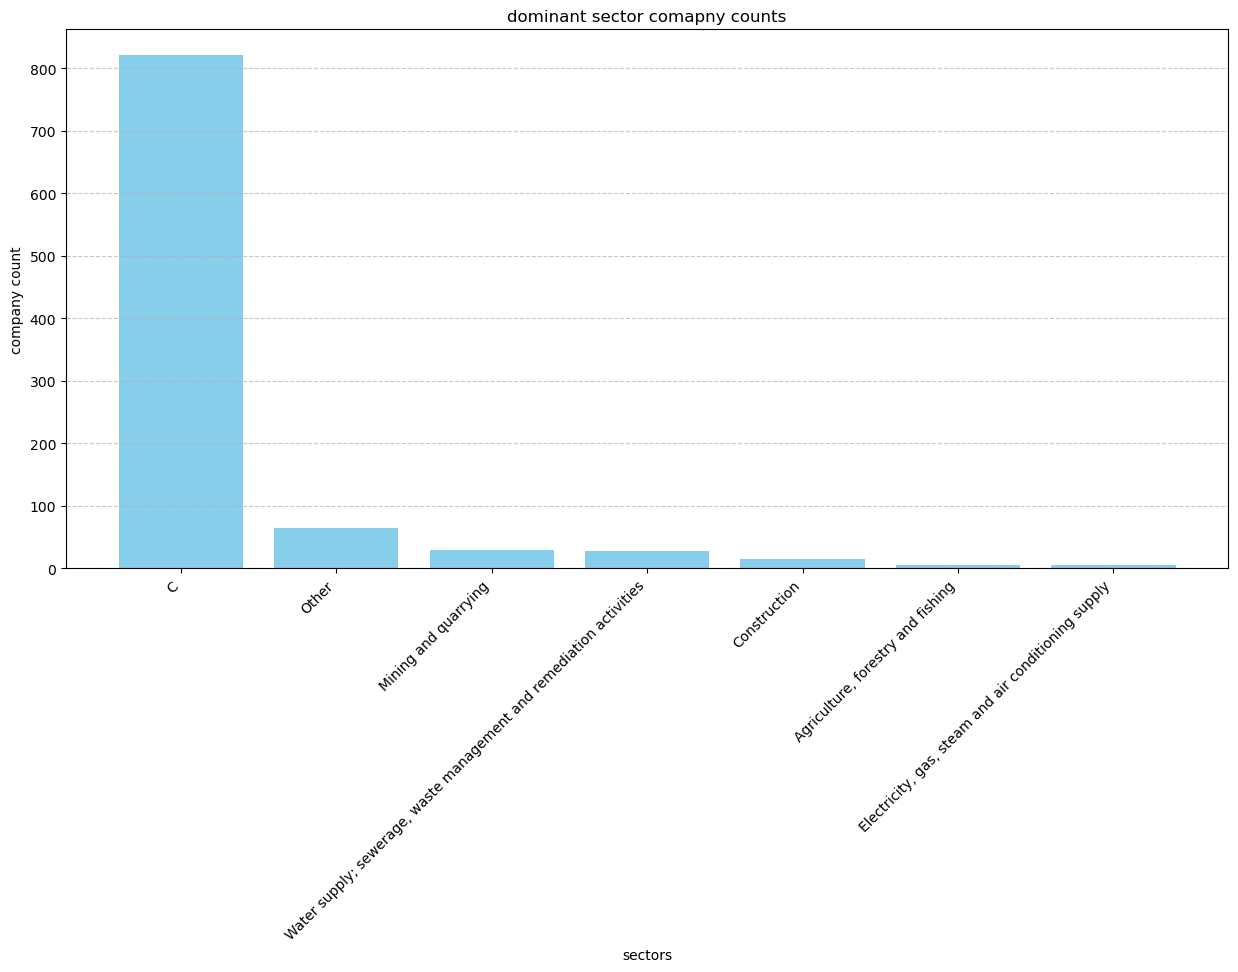

In [20]:

import matplotlib.pyplot as plt

def plot_value_counts(series, title, xlabel, ylabel, mapping_dict=None, top_n=None, color='skyblue', figsize=(15, 7)):
    """
    Plots a bar chart from a Pandas Series containing value counts.

    Parameters:
    - series (pd.Series): The series containing value counts (e.g., df['column'].value_counts()).
    - title (str): The title of the chart.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - mapping_dict (dict, optional): Dictionary to map values to readable labels.
    - top_n (int, optional): Number of top entries to display.
    - color (str, optional): Bar color (default: 'skyblue').
    - figsize (tuple, optional): Figure size (default: (15, 7)).
    """

    # If top_n is provided, limit the series
    if top_n:
        series = series.nlargest(top_n)

    # Map values if mapping dictionary is provided
    labels = [mapping_dict.get(str(key), str(key)) for key in series.index] if mapping_dict else series.index

    # Set x positions
    x_positions = range(len(labels))

    # Create figure
    plt.figure(figsize=figsize)
    plt.bar(x_positions, series.values, color=color)
    plt.xticks(x_positions, labels, rotation=45, ha='right')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show plot
    plt.show()

plot_value_counts(company_economic_sector_summary_df['dominant_level_2_sector_company'].value_counts(),'dominant sector comapny counts','sectors','company count',mapping_dict=industry_mapping)

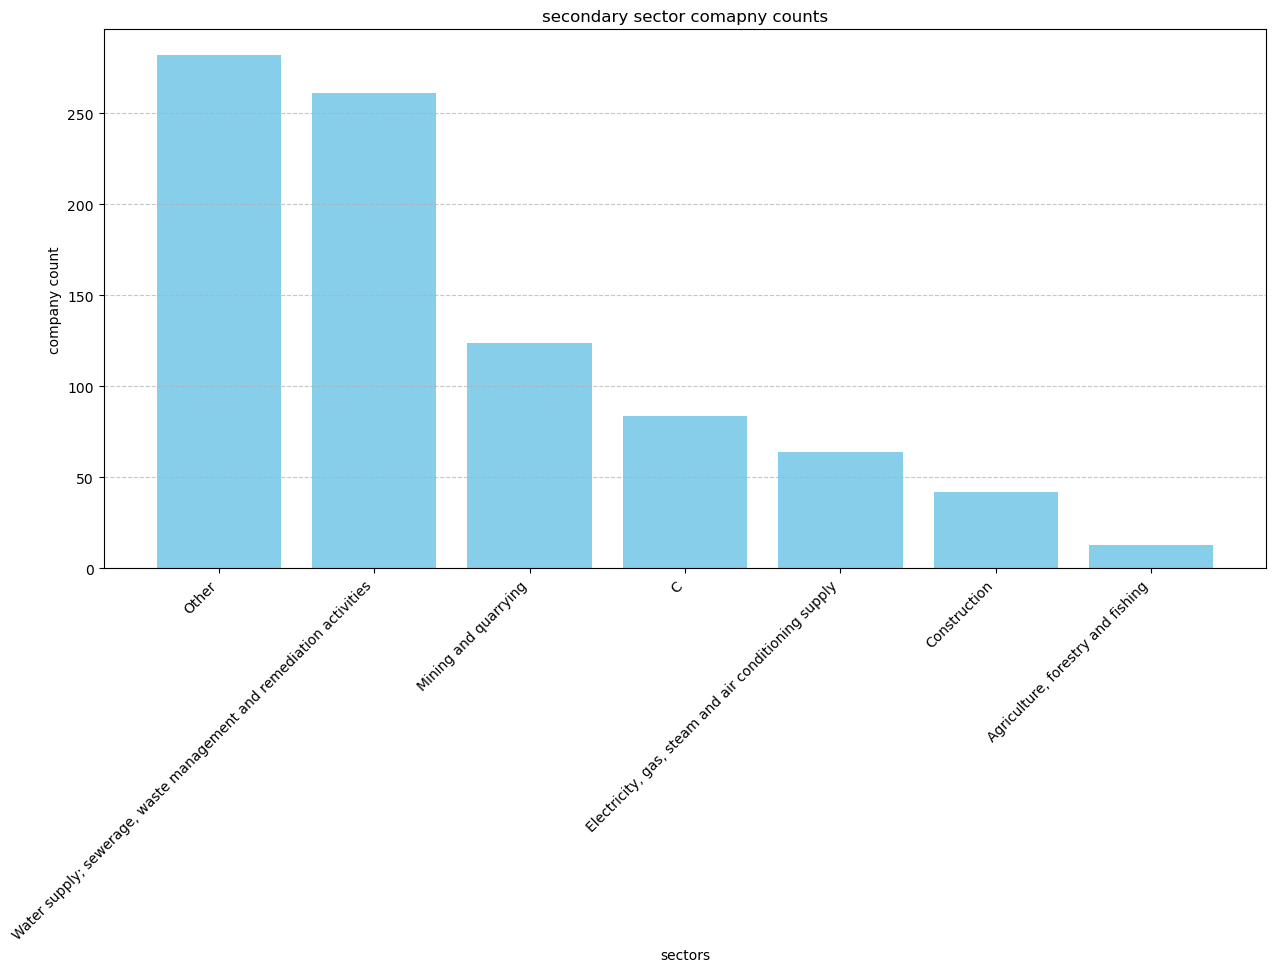

In [22]:
plot_value_counts(company_economic_sector_summary_df['secondary_level_2_sector_company'].value_counts(),'secondary sector comapny counts','sectors','company count',mapping_dict=industry_mapping)

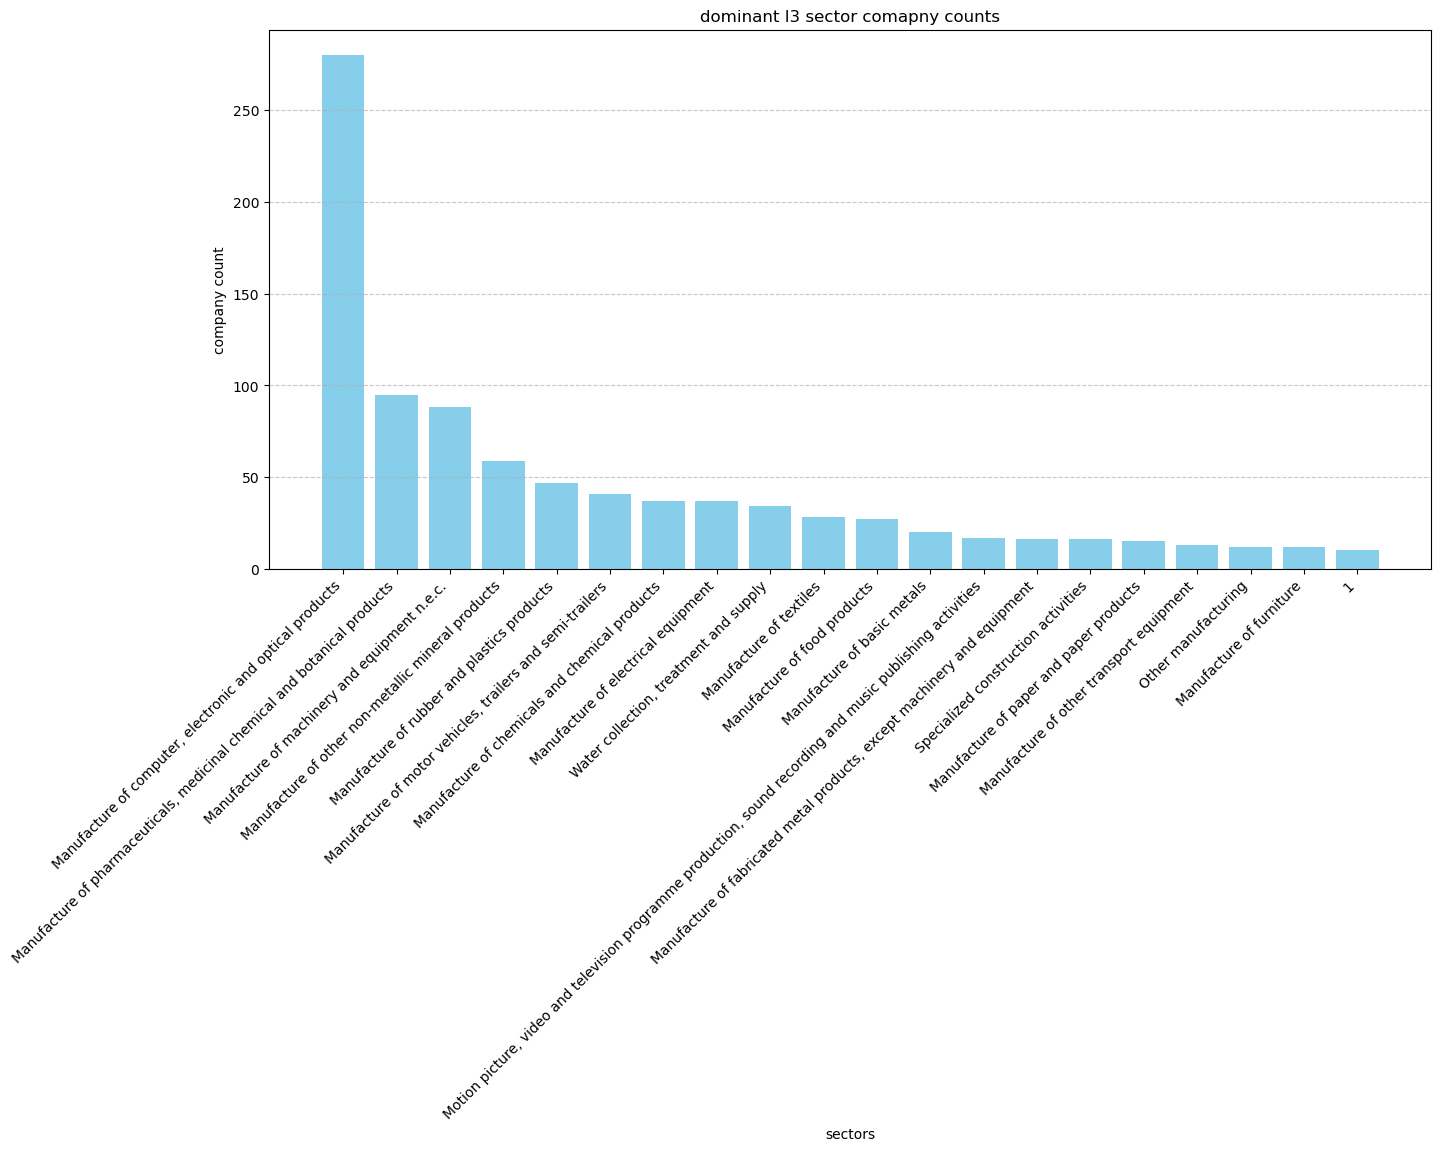

In [23]:
plot_value_counts(company_economic_sector_summary_df['dominant_level_3_sector_company'].value_counts(),'dominant l3 sector comapny counts','sectors','company count',top_n=20,mapping_dict=industry_mapping)

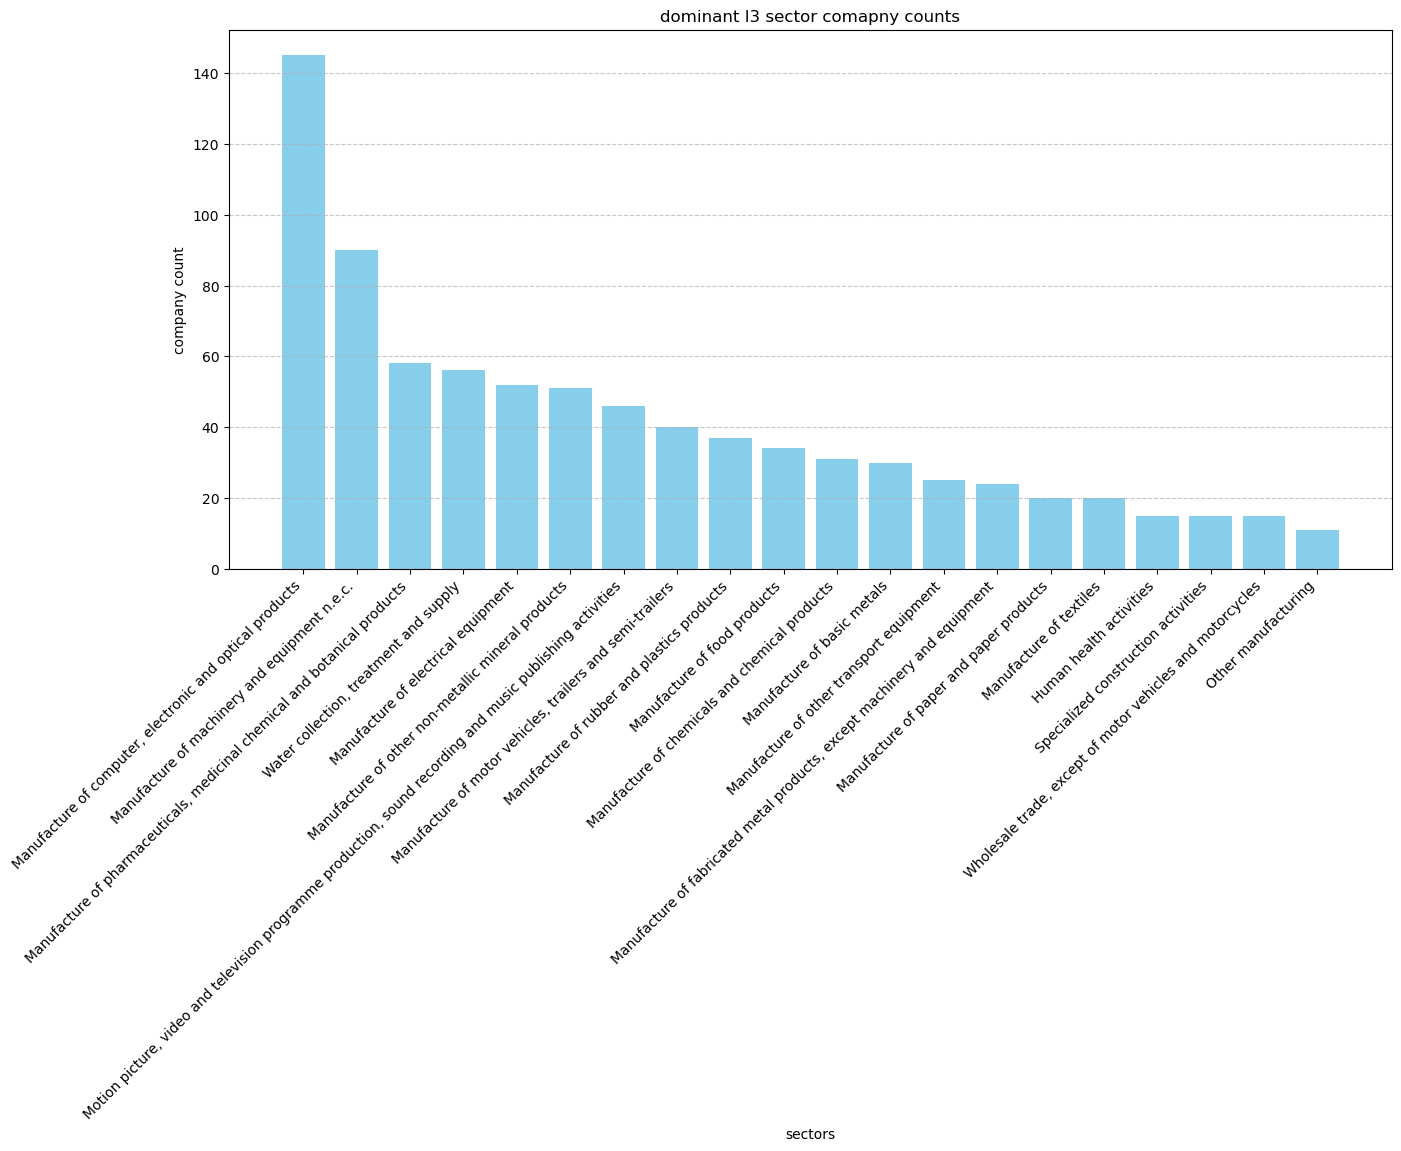

In [24]:
plot_value_counts(company_economic_sector_summary_df['secondary_level_3_sector_company'].value_counts(),'dominant l3 sector comapny counts','sectors','company count',top_n=20,mapping_dict=industry_mapping)

## Feature Selection

In [1]:
# DATA LOADING CELL
import pandas as pd
attorney_economic_sector_summary_df = pd.read_csv('./Data/attorney_economic_sector_summary.csv',sep = '\t')
attorney_economic_sector_summary_df['Secondary level three sector']  = attorney_economic_sector_summary_df['Secondary level three sector'].map(lambda x: str(int(x)) if isinstance(x, float) and x.is_integer() else x)

company_economic_sector_summary_df = pd.read_csv('./Data/company_summary_economic_sectors.csv',sep = '\t')
company_economic_sector_summary_df['secondary_level_3_sector_company'] = company_economic_sector_summary_df['secondary_level_3_sector_company'].map(lambda x: str(int(x)) if isinstance(x, float) and x.is_integer() else x)
company_economic_sector_summary_df['mode_attorney_company_sector_l3_secondary'] =  company_economic_sector_summary_df['mode_attorney_company_sector_l3_secondary'].map(lambda x: str(int(x)) if isinstance(x, float) and x.is_integer() else x)

train_data_industry = pd.read_csv('./Data/train_data_industry.csv',sep='\t')
test_data_industry = pd.read_csv('./Data/test_data_industry.csv',sep='\t')

train_data_industry['top_l3_industry']=train_data_industry['top_l3_industry'].map(lambda x: str(int(x)) if isinstance(x, float) and x.is_integer() else x)
test_data_industry['top_l3_industry']=test_data_industry['top_l3_industry'].map(lambda x: str(int(x)) if isinstance(x, float) and x.is_integer() else x)

train_data_industry['top_l3_industry']=train_data_industry['top_l3_industry'].map(lambda x: str(int(x)) if isinstance(x, int) and x.is_integer() else x)
test_data_industry['top_l3_industry']=test_data_industry['top_l3_industry'].map(lambda x: str(int(x)) if isinstance(x, int) and x.is_integer() else x)

train_data_industry.drop(columns=['Unnamed: 0'],inplace=True)
test_data_industry.drop(columns=['Unnamed: 0'],inplace=True)

import json

with open('url_names_dictionary', 'r') as file:
    url_name_dict = json.load(file)



# Open the JSON file and load its content into a Python dictionary
with open('granted_applications_economic_section_dict.json', 'r') as file:
    granted_applications_economic_section_dict = json.load(file)

reps_data_scraped = pd.read_csv('representatives_scraped_and_cleaned',sep='\t')
reps_data_scraped.drop(columns = ['Unnamed: 0','company_identifier','region'],inplace=True)
# Now data is a dictionary (provided the JSON's top-level structure is an object)

#we want to remove ficpi.org and epo.org since they serve as repositories for patent attorneys

ignore_list = ['https://ficpi.org',
 'https://www.epo.org']


company_attorneys_dict = {'attorney_name':[],'company_url':[]}

for key in url_name_dict.keys():
    if key not in ignore_list:
        company_list = url_name_dict[key]

        for company in company_list:
            company_attorneys_dict['attorney_name'].append(company)
            company_attorneys_dict['company_url'].append(key)

company_attorneys_df = pd.DataFrame(company_attorneys_dict)
reps_data_scraped = pd.concat([reps_data_scraped, company_attorneys_df], ignore_index=True)

In [3]:
to_keep = ['total_citations', 'patent_citations', 'novelty_flag','Y_flag','search_report_is_no_unity','search_report_is_incomplete_search','dominant_section',
           'secondary_section','num_in_dominant', 'num_in_secondary', 'num_in_secondary', 'num_sections','top_l3_industry','top_l2_industry','rep_name','num_fields','patent_granted']

to_remove = [c for c in list(train_data_industry.columns) if c not in to_keep]

In [4]:
train_data_industry.drop(columns=to_remove,inplace=True)
test_data_industry.drop(columns=to_remove,inplace=True)

In [6]:
train_data_industry = pd.merge(train_data_industry, attorney_economic_sector_summary_df, left_on='rep_name', right_on='attorney_name', how='inner')
test_data_industry = pd.merge(test_data_industry, attorney_economic_sector_summary_df, left_on='rep_name', right_on='attorney_name', how='inner')

train_data_industry = pd.merge(train_data_industry, reps_data_scraped,on='attorney_name', how='inner')
test_data_industry = pd.merge(test_data_industry, reps_data_scraped,on='attorney_name', how='inner')


In [7]:
train_data_industry.drop(columns =['Number of dominant level three sector applications',
       'Number of dominant level two sector patents',
       'Number of dominant level three sector patents',
       'Number of dominant level two sector applications',
       'Number of secondary level three sector applications',
       'Number of secondary level two sector patents',
       'Number of secondary level three sector patents',
       'Number of secondary level two sector applications',
       'Number of different level two sectors'], inplace=True)

test_data_industry.drop(columns =['Number of dominant level three sector applications',
       'Number of dominant level two sector patents',
       'Number of dominant level three sector patents',
       'Number of dominant level two sector applications',
       'Number of secondary level three sector applications',
       'Number of secondary level two sector patents',
       'Number of secondary level three sector patents',
       'Number of secondary level two sector applications',
       'Number of different level two sectors'], inplace=True)

In [8]:
train_data_industry = pd.merge(train_data_industry, company_economic_sector_summary_df, left_on='company_url', right_on='company_url', how='inner')
test_data_industry = pd.merge(test_data_industry, company_economic_sector_summary_df, left_on='company_url', right_on='company_url', how='inner')


In [9]:
to_drop = ['count_dominant_l2_applications_company','count_dominant_l2_patents_company', 'count_secondary_l2_applications_company','count_secondary_l2_patents_company',
       'count_different_level_2_sectors_company','count_dominant_l3_applications_company','count_dominant_l3_patents_company','count_secondary_l3_applications_company','count_secondary_l3_patents_company','rep_name','dominant_section','secondary_section']

train_data_industry.drop(columns=to_drop,inplace=True)
test_data_industry.drop(columns=to_drop,inplace=True)

In [8]:
train_data_industry.columns

Index(['total_citations', 'patent_citations', 'novelty_flag', 'Y_flag',
       'search_report_is_no_unity', 'search_report_is_incomplete_search',
       'num_fields', 'dominant_section', 'secondary_section',
       'num_in_dominant', 'num_in_secondary', 'num_sections',
       'top_l3_industry', 'top_l2_industry', 'attorney_name',
       'Dominant level two sector', 'Dominant level three sector',
       'Secondary level two sector', 'Secondary level three sector',
       'Number of level three sectors', 'company_url',
       'dominant_level_2_sector_company', 'secondary_level_2_sector_company',
       'dominant_level_3_sector_company', 'secondary_level_3_sector_company',
       'count_different_level_3_sectors_company',
       'mode_attorney_company_sector_l2',
       'mode_attorney_company_sector_l2_secondary',
       'mode_attorney_company_sector_l3',
       'mode_attorney_company_sector_l3_secondary'],
      dtype='object')

In [10]:
import numpy as np
import pandas as pd
import math

# === 1. Create flag columns based on comparisons ===
train_data_industry['attorney_dominant_same_l3'] = (
    train_data_industry['top_l3_industry'] == train_data_industry['Dominant level three sector']
).astype(int)

train_data_industry['company_dominant_same_l3'] = (
    train_data_industry['top_l3_industry'] == train_data_industry['dominant_level_3_sector_company']
).astype(int)

train_data_industry['attorney_dominant_same_l2'] = (
    train_data_industry['top_l2_industry'] == train_data_industry['Dominant level two sector']
).astype(int)

train_data_industry['company_dominant_same_l2'] = (
    train_data_industry['top_l2_industry'] == train_data_industry['dominant_level_2_sector_company']
).astype(int)

train_data_industry['attorney_secondary_same_l3'] = (
    train_data_industry['top_l3_industry'] == train_data_industry['Secondary level three sector']
).astype(int)

train_data_industry['company_secondary_same_l3'] = (
    train_data_industry['top_l3_industry'] == train_data_industry['secondary_level_3_sector_company']
).astype(int)

# Note: These two flags use the same condition as the dominant counterparts per your instructions.
train_data_industry['attorney_secondary_same_l2'] = (
    train_data_industry['top_l2_industry'] == train_data_industry['Dominant level two sector']
).astype(int)

train_data_industry['company_secondary_same_l2'] = (
    train_data_industry['top_l2_industry'] == train_data_industry['secondary_level_2_sector_company']
).astype(int)

# === 2. Define a function to compute the ratios and log-transformed values ===
def compute_ratios(row):
    """
    For a given row, look up values in granted_applications_economic_section_dict using
    the keys 'company_url' and 'attorney_name', then compute:
      - l3_patent_ratio_company: application_count / patent_count for top_l3_industry (company)
      - l3_patent_ratio_attorney: application_count / patent_count for top_l3_industry (attorney)
      - l2_patent_ratio_company and l2_patent_ratio_attorney: both computed from top_l2_industry under 'attorney_name'
      - log_applications_l3_attorney/company: log of patent_count for top_l3_industry
      - log_applications_l2_attorney/company: log of patent_count for top_l2_industry
    If a division by zero or missing key occurs, np.nan is returned.
    """
    result = {}
    d = granted_applications_economic_section_dict  # our dictionary
    
    # --- l3 values for company (using company_url) ---
    try:
        comp_l3 = d[row['company_url']][row['top_l3_industry']]
        patent_count_comp_l3 = comp_l3[0]
        application_count_comp_l3 = comp_l3[1]
        result['l3_patent_ratio_company'] = (application_count_comp_l3 / patent_count_comp_l3
                                             if patent_count_comp_l3 != 0 else np.nan)
        result['log_applications_l3_company'] = (np.log(patent_count_comp_l3)
                                                 if patent_count_comp_l3 > 0 else np.nan)
    except Exception as e:
        result['l3_patent_ratio_company'] = np.nan
        result['log_applications_l3_company'] = np.nan

    # --- l3 values for attorney (using attorney_name) ---
    try:
        att_l3 = d[row['attorney_name']][row['top_l3_industry']]
        patent_count_att_l3 = att_l3[0]
        application_count_att_l3 = att_l3[1]
        result['l3_patent_ratio_attorney'] = (application_count_att_l3 / patent_count_att_l3
                                              if patent_count_att_l3 != 0 else np.nan)
        result['log_applications_l3_attorney'] = (np.log(patent_count_att_l3)
                                                  if patent_count_att_l3 > 0 else np.nan)
    except Exception as e:
        result['l3_patent_ratio_attorney'] = np.nan
        result['log_applications_l3_attorney'] = np.nan

    # --- l2 values for ratios (both company and attorney are computed from 'attorney_name') ---
    try:
        att_l2 = d[row['attorney_name']][row['top_l2_industry']]
        patent_count_att_l2 = att_l2[0]
        application_count_att_l2 = att_l2[1]
        ratio_l2 = (application_count_att_l2 / patent_count_att_l2
                    if patent_count_att_l2 != 0 else np.nan)
        result['l2_patent_ratio_company'] = ratio_l2
        result['l2_patent_ratio_attorney'] = ratio_l2
        result['log_applications_l2_attorney'] = (np.log(patent_count_att_l2)
                                                  if patent_count_att_l2 > 0 else np.nan)
    except Exception as e:
        result['l2_patent_ratio_company'] = np.nan
        result['l2_patent_ratio_attorney'] = np.nan
        result['log_applications_l2_attorney'] = np.nan

    # --- l2 log value for company (using company_url key) ---
    try:
        comp_l2 = d[row['company_url']][row['top_l2_industry']]
        patent_count_comp_l2 = comp_l2[0]
        result['log_applications_l2_company'] = (np.log(patent_count_comp_l2)
                                                 if patent_count_comp_l2 > 0 else np.nan)
    except Exception as e:
        result['log_applications_l2_company'] = np.nan

    return pd.Series(result)

# === 3. Apply the function row-wise and add the computed columns to the DataFrame ===
computed_df = train_data_industry.apply(compute_ratios, axis=1)
# Replace any NaNs in the computed columns with zeros.
computed_df.fillna(0, inplace=True)

# Concatenate the new computed columns with the original DataFrame.
train_data_industry = pd.concat([train_data_industry, computed_df], axis=1)



In [11]:
import numpy as np
import pandas as pd
import math

# === 1. Create flag columns based on comparisons ===
test_data_industry['attorney_dominant_same_l3'] = (
    test_data_industry['top_l3_industry'] == test_data_industry['Dominant level three sector']
).astype(int)

test_data_industry['company_dominant_same_l3'] = (
    test_data_industry['top_l3_industry'] == test_data_industry['dominant_level_3_sector_company']
).astype(int)

test_data_industry['attorney_dominant_same_l2'] = (
    test_data_industry['top_l2_industry'] == test_data_industry['Dominant level two sector']
).astype(int)

test_data_industry['company_dominant_same_l2'] = (
    test_data_industry['top_l2_industry'] == test_data_industry['dominant_level_2_sector_company']
).astype(int)

test_data_industry['attorney_secondary_same_l3'] = (
    test_data_industry['top_l3_industry'] == test_data_industry['Secondary level three sector']
).astype(int)

test_data_industry['company_secondary_same_l3'] = (
    test_data_industry['top_l3_industry'] == test_data_industry['secondary_level_3_sector_company']
).astype(int)

# Note: These two flags use the same condition as the dominant counterparts per your instructions.
test_data_industry['attorney_secondary_same_l2'] = (
    test_data_industry['top_l2_industry'] == test_data_industry['Dominant level two sector']
).astype(int)

test_data_industry['company_secondary_same_l2'] = (
    test_data_industry['top_l2_industry'] == test_data_industry['secondary_level_2_sector_company']
).astype(int)

# === 2. Define a function to compute the ratios and log-transformed values ===
def compute_ratios(row):
    """
    For a given row, look up values in granted_applications_economic_section_dict using
    the keys 'company_url' and 'attorney_name', then compute:
      - l3_patent_ratio_company: application_count / patent_count for top_l3_industry (company)
      - l3_patent_ratio_attorney: application_count / patent_count for top_l3_industry (attorney)
      - l2_patent_ratio_company and l2_patent_ratio_attorney: both computed from top_l2_industry under 'attorney_name'
      - log_applications_l3_attorney/company: log of patent_count for top_l3_industry
      - log_applications_l2_attorney/company: log of patent_count for top_l2_industry
    If a division by zero or missing key occurs, np.nan is returned.
    """
    result = {}
    d = granted_applications_economic_section_dict  # our dictionary
    
    # --- l3 values for company (using company_url) ---
    try:
        comp_l3 = d[row['company_url']][row['top_l3_industry']]
        patent_count_comp_l3 = comp_l3[0]
        application_count_comp_l3 = comp_l3[1]
        result['l3_patent_ratio_company'] = (application_count_comp_l3 / patent_count_comp_l3
                                             if patent_count_comp_l3 != 0 else np.nan)
        result['log_applications_l3_company'] = (np.log(patent_count_comp_l3)
                                                 if patent_count_comp_l3 > 0 else np.nan)
    except Exception as e:
        result['l3_patent_ratio_company'] = np.nan
        result['log_applications_l3_company'] = np.nan

    # --- l3 values for attorney (using attorney_name) ---
    try:
        att_l3 = d[row['attorney_name']][row['top_l3_industry']]
        patent_count_att_l3 = att_l3[0]
        application_count_att_l3 = att_l3[1]
        result['l3_patent_ratio_attorney'] = (application_count_att_l3 / patent_count_att_l3
                                              if patent_count_att_l3 != 0 else np.nan)
        result['log_applications_l3_attorney'] = (np.log(patent_count_att_l3)
                                                  if patent_count_att_l3 > 0 else np.nan)
    except Exception as e:
        result['l3_patent_ratio_attorney'] = np.nan
        result['log_applications_l3_attorney'] = np.nan

    # --- l2 values for ratios (both company and attorney are computed from 'attorney_name') ---
    try:
        att_l2 = d[row['attorney_name']][row['top_l2_industry']]
        patent_count_att_l2 = att_l2[0]
        application_count_att_l2 = att_l2[1]
        ratio_l2 = (application_count_att_l2 / patent_count_att_l2
                    if patent_count_att_l2 != 0 else np.nan)
        result['l2_patent_ratio_company'] = ratio_l2
        result['l2_patent_ratio_attorney'] = ratio_l2
        result['log_applications_l2_attorney'] = (np.log(patent_count_att_l2)
                                                  if patent_count_att_l2 > 0 else np.nan)
    except Exception as e:
        result['l2_patent_ratio_company'] = np.nan
        result['l2_patent_ratio_attorney'] = np.nan
        result['log_applications_l2_attorney'] = np.nan

    # --- l2 log value for company (using company_url key) ---
    try:
        comp_l2 = d[row['company_url']][row['top_l2_industry']]
        patent_count_comp_l2 = comp_l2[0]
        result['log_applications_l2_company'] = (np.log(patent_count_comp_l2)
                                                 if patent_count_comp_l2 > 0 else np.nan)
    except Exception as e:
        result['log_applications_l2_company'] = np.nan

    return pd.Series(result)

# === 3. Apply the function row-wise and add the computed columns to the DataFrame ===
computed_df = test_data_industry.apply(compute_ratios, axis=1)
# Replace any NaNs in the computed columns with zeros.
computed_df.fillna(0, inplace=True)

# Concatenate the new computed columns with the original DataFrame.
test_data_industry = pd.concat([test_data_industry, computed_df], axis=1)



In [12]:
train_data_industry.describe()

total_citations  patent_citations     num_fields  num_in_dominant  \
count    190670.000000     190670.000000  190670.000000    190670.000000   
mean          4.397173          3.841428       1.804143         1.458426   
std           2.231241          2.089999       1.088623         0.751036   
min           1.000000          0.000000       1.000000         1.000000   
25%           3.000000          3.000000       1.000000         1.000000   
50%           4.000000          4.000000       1.000000         1.000000   
75%           5.000000          5.000000       2.000000         2.000000   
max          50.000000         40.000000      15.000000        13.000000   

       num_in_secondary   num_sections  Dominant level three sector  \
count     190670.000000  190670.000000                190670.000000   
mean           1.296418       1.320848                    28.724094   
std            0.619153       0.557983                    12.862464   
min            1.000000       1.000000                     1.000000   
25%            1.000000       1.000000                    26.000000   
50%            1.000000       1.000000                    26.000000   
75%            1.000000       2.000000                    28.000000   
max            8.000000       6.000000                    96.000000   

       Number of level three sectors  dominant_level_3_sector_company  \
count                  190670.000000                    190670.000000   
mean                       33.644401                        28.225673   
std                        16.362851                        11.805493   
min                         1.000000                         1.000000   
25%                        21.000000                        26.000000   
50%                        32.000000                        26.000000   
75%                        49.000000                        27.000000   
max                        66.000000                        96.000000   

       count_different_level_3_sectors_company  ...  \
count                            190670.000000  ...   
mean                                 44.064389  ...   
std                                  14.221751  ...   
min                                   1.000000  ...   
25%                                  34.000000  ...   
50%                                  47.000000  ...   
75%                                  56.000000  ...   
max                                  66.000000  ...   

       attorney_secondary_same_l2  company_secondary_same_l2  \
count               190670.000000              190670.000000   
mean                     0.574354                   0.214659   
std                      0.494442                   0.410587   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      1.000000                   0.000000   
max                      1.000000                   1.000000   

       l3_patent_ratio_company  log_applications_l3_company  \
count            190670.000000                190670.000000   
mean                  0.686685                     3.820976   
std                   0.330055                     1.796876   
min                   0.000000                     0.000000   
25%                   0.560000                     2.564949   
50%                   0.682540                     3.912023   
75%                   0.826667                     5.081404   
max                   9.000000                     7.646354   

       l3_patent_ratio_attorney  log_applications_l3_attorney  \
count             190670.000000                 190670.000000   
mean                   0.705725                      3.098557   
std                    0.472152                      1.811218   
min                    0.000000                      0.000000   
25%                    0.521739                      1.791

In [13]:
test_data_industry.describe()

total_citations  patent_citations    num_fields  num_in_dominant  \
count     54005.000000      54005.000000  54005.000000     54005.000000   
mean          4.172299          3.581631      1.867309         1.505305   
std           2.087424          1.993218      1.171353         0.816146   
min           1.000000          0.000000      1.000000         1.000000   
25%           3.000000          2.000000      1.000000         1.000000   
50%           4.000000          3.000000      1.000000         1.000000   
75%           5.000000          5.000000      2.000000         2.000000   
max          34.000000         27.000000     19.000000        18.000000   

       num_in_secondary  num_sections  Dominant level three sector  \
count      54005.000000  54005.000000                 54005.000000   
mean           1.318230      1.329136                    28.624701   
std            0.651511      0.560908                    12.464229   
min            1.000000      1.000000                     1.000000   
25%            1.000000      1.000000                    26.000000   
50%            1.000000      1.000000                    26.000000   
75%            1.000000      2.000000                    28.000000   
max            8.000000      6.000000                    96.000000   

       Number of level three sectors  dominant_level_3_sector_company  \
count                   54005.000000                     54005.000000   
mean                       36.525007                        28.044663   
std                        16.483800                        11.285467   
min                         1.000000                         1.000000   
25%                        24.000000                        26.000000   
50%                        39.000000                        26.000000   
75%                        50.000000                        27.000000   
max                        66.000000                        96.000000   

       count_different_level_3_sectors_company  ...  \
count                             54005.000000  ...   
mean                                 44.869438  ...   
std                                  14.215053  ...   
min                                   1.000000  ...   
25%                                  35.000000  ...   
50%                                  49.000000  ...   
75%                                  56.000000  ...   
max                                  66.000000  ...   

       attorney_secondary_same_l2  company_secondary_same_l2  \
count                54005.000000               54005.000000   
mean                     0.535506                   0.207425   
std                      0.498742                   0.405466   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      1.000000                   0.000000   
max                      1.000000                   1.000000   

       l3_patent_ratio_company  log_applications_l3_company  \
count             54005.000000                 54005.000000   
mean                  0.632404                     3.725852   
std                   0.277592                     1.952295   
min                   0.000000                     0.000000   
25%                   0.526066                     2.397895   
50%                   0.666667                     3.871201   
75%                   0.800000                     5.099866   
max                   4.250000                     7.646354   

       l3_patent_ratio_attorney  log_applications_l3_attorney  \
count              54005.000000                  54005.000000   
mean                   0.595677                      3.053610   
std                    0.330578                      2.005510   
min                    0.000000                      0.000000   
25%                    0.470588                      1.386294   
50%        

In [19]:
test_data_industry.columns

Index(['total_citations', 'patent_citations', 'novelty_flag', 'Y_flag',
       'search_report_is_no_unity', 'search_report_is_incomplete_search',
       'num_fields', 'num_in_dominant', 'num_in_secondary', 'num_sections',
       'top_l3_industry', 'top_l2_industry', 'attorney_name',
       'Dominant level two sector', 'Dominant level three sector',
       'Secondary level two sector', 'Secondary level three sector',
       'Number of level three sectors', 'company_url',
       'dominant_level_2_sector_company', 'secondary_level_2_sector_company',
       'dominant_level_3_sector_company', 'secondary_level_3_sector_company',
       'count_different_level_3_sectors_company',
       'mode_attorney_company_sector_l2',
       'mode_attorney_company_sector_l2_secondary',
       'mode_attorney_company_sector_l3',
       'mode_attorney_company_sector_l3_secondary',
       'attorney_dominant_same_l3', 'company_dominant_same_l3',
       'attorney_dominant_same_l2', 'company_dominant_same_l2',
   

In [14]:
import numpy as np
import pandas as pd

def map_citations_row(row):
    """
    Given a row with 'total_citations' and 'patent_citations',
    compute the patent ratio and the log of total citations.
    """
    total = row['total_citations']
    patent = row['patent_citations']
    if total > 0:
        ratio = patent / total
        log_total = np.log(total)
    else:
        ratio = 0.0
        log_total = 0.0
    return pd.Series({'patent_ratio': ratio, 'log_total_citations': log_total})

# Apply the function row-wise for test_data_industry
test_data_industry[['patent_ratio', 'log_total_citations']] = test_data_industry.apply(
    map_citations_row, axis=1
)

# And for train_data_industry
train_data_industry[['patent_ratio', 'log_total_citations']] = train_data_industry.apply(
    map_citations_row, axis=1
)

In [16]:
X = ['novelty_flag', 'Y_flag',
       'search_report_is_no_unity', 'search_report_is_incomplete_search',
       'num_fields','num_sections','attorney_dominant_same_l3', 'company_dominant_same_l3',
       'attorney_dominant_same_l2', 'company_dominant_same_l2',
       'attorney_secondary_same_l3', 'company_secondary_same_l3',
       'attorney_secondary_same_l2', 'company_secondary_same_l2',
       'l3_patent_ratio_company', 'log_applications_l3_company',
       'l3_patent_ratio_attorney', 'log_applications_l3_attorney',
       'l2_patent_ratio_company', 'l2_patent_ratio_attorney',
       'log_applications_l2_attorney', 'log_applications_l2_company',
       'patent_ratio', 'log_total_citations']
y = ['patent_granted']

In [18]:
X_train = train_data_industry[X]
X_test = test_data_industry[X]

y_train = train_data_industry[y]
y_test = test_data_industry[y]

/tmp/ipykernel_4058/1915950901.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=dt_feature_importance_df, palette='viridis')


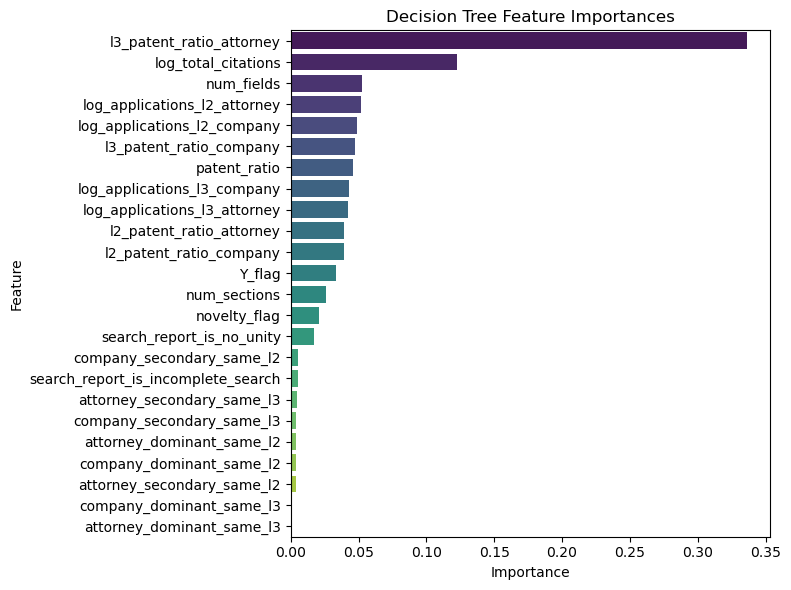

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression# --- Decision Tree Classifier ---
# Train the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Extract feature importances from the decision tree
dt_importances = dt_model.feature_importances_
dt_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_importances
}).sort_values(by='Importance', ascending=False)

# Visualize Decision Tree feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance_df, palette='viridis')
plt.title("Decision Tree Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import classification_report
predictions = dt_model.predict(X_test)

# --- Print the Classification Report ---
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, predictions))

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

       False       0.67      0.50      0.57     32475
        True       0.45      0.62      0.52     21530

    accuracy                           0.55     54005
   macro avg       0.56      0.56      0.55     54005
weighted avg       0.58      0.55      0.55     54005



/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_4058/1045532389.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=lr_feature_importance_df, palette='magma')


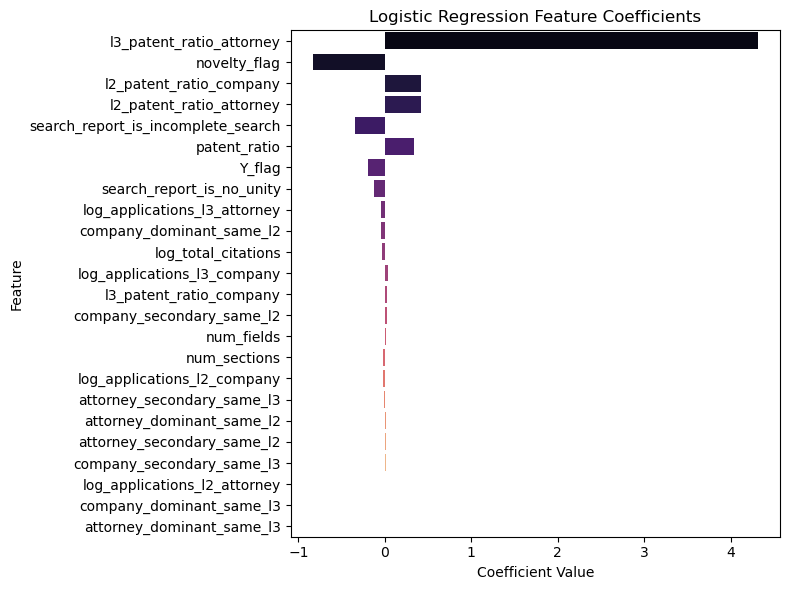

In [24]:
# --- Logistic Regression ---
# Train logistic regression. (Increase max_iter if needed.)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# For binary classification, logreg.coef_ is of shape (1, n_features)
# We use the absolute value of coefficients to determine the "importance"
lr_coefs = logreg.coef_[0]
lr_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_coefs,
    'AbsCoefficient': np.abs(lr_coefs)
}).sort_values(by='AbsCoefficient', ascending=False)

# Visualize Logistic Regression coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_feature_importance_df, palette='magma')
plt.title("Logistic Regression Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [25]:


# --- Predict on the Test Set ---
predictions = logreg.predict(X_test)

# --- Print the Classification Report ---
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, predictions))

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

       False       0.70      0.40      0.51     32475
        True       0.45      0.74      0.56     21530

    accuracy                           0.53     54005
   macro avg       0.57      0.57      0.53     54005
weighted avg       0.60      0.53      0.53     54005

